# TRABAJO FIN DE MASTER

## MASTER BIG DATA & BUSINESS ANALYTICS

## UNIVERSIDAD COMPLUTENSE DE MADRID


### Objetivo:
Realizar un estudio de machine learning para un banco alemán con un problema de casificación binaria de clientes. Incluye 
crear, entrenar, evaluar y productivizar un modelo.

_____________________________________________
### Autor:  
113250371
Mayron Rodriguez Sibaja
### Fecha Creación:
Setiembre, 2023
_____________________________________________

# Comprensión caso de estudio

Se utiliza un conjunto de datos proveniente de Kaggle que contiene información sobre personas que solicitaron un préstamo o una línea de crédito en un banco al sur de alemania en los años 70th.

EL banco quiere una solución que le permita clasificar a los solicitantes como "buenos" o "malos" riesgos crediticios, lo que significa que se busca predecir si el solicitante es probable que pague el crédito a tiempo (buen riesgo crediticio) o si podría tener dificultades para hacerlo (mal riesgo crediticio).

El único supuesto es que para el banco es mas caro aceptar un cliente que podría tener dificultades para pagar el crédito, por lo que se busca predecir principalmente los malos(bad) clientes.

### Diccionario de datos

| Nombre Variable         | Contenido                                            | Detalle                                                                                                      |
|:----------------------|:----------------------------------------------------|:-------------------------------------------------------------------------------------------------------------|
| estado                | Estado de la cuenta corriente del deudor con el banco (categórica)   | "1 : no checking account<br>2 : … < 0 DM<br>3 : 0<= … < 200 DM<br>4 : … >= 200 DM / salary for at least 1 year" |
| duracion              | Duración del crédito en meses (cuantitativa)        |                                                                                                              |
| historial_credito     | Historial de cumplimiento de contratos de crédito anteriores o concurrentes (categórica)  | "0 : delay in paying off in the past<br>1 : critical account/other credits elsewhere<br>2 : no credits taken/all credits paid back duly<br>3 : existing credits paid back duly till now<br>4 : all credits at this bank paid back duly" |
| proposito             | Propósito para el cual se necesita el crédito (categórica)  | "0 : others<br>1 : car (new)<br>2 : car (used)<br>3 : furniture/equipment<br>4 : radio/television<br>5 : domestic appliances<br>6 : repairs<br>7 : education<br>8 : vacation<br>9 : retraining<br>10 : business" |
| monto                 | Monto del crédito en DM (Marco Alemán)              |                                                                                                              |
| ahorros               | Ahorros del deudor (categórica)                    | "1 : unknown/no savings account<br>2 : … < 100 DM<br>3 : 100 <= … < 500 DM<br>4 : 500 <= … < 1000 DM<br>5 : … >= 1000 DM" |
| duracion_empleo       | Duración del empleo del deudor con el empleador actual (ordinal; cuantitativa discretizada) | "1 : unemployed<br>2 : < 1 yr<br>3 : 1 <= … < 4 yrs<br>4 : 4 <= … < 7 yrs<br>5 : >= 7 yrs" |
| tasa_pago_cuotas      | Cuotas de crédito como porcentaje del ingreso disponible del deudor (ordinal; cuantitativa discretizada) | "1 : >= 35<br>2 : 25 <= … < 35<br>3 : 20 <= … < 25<br>4 : < 20" |
| estado_personal_sex   | Información combinada sobre sexo y estado civil del deudor (categórica)  | "1 : male : divorced/separated<br>2 : female : non-single or male : single<br>3 : male : married/widowed<br>4 : female : single" |
| otros_deudores        | ¿Hay otro deudor o garante para el crédito? (categórica) | "1 : none<br>2 : co-applicant<br>3 : guarantor" |
| residencia_actual     | Tiempo (en años) que el deudor ha vivido en la residencia actual (ordinal; cuantitativa discretizada) | "1 : < 1 yr<br>2 : 1 <= … < 4 yrs<br>3 : 4 <= … < 7 yrs<br>4 : >= 7 yrs" |
| propiedad             | La propiedad más valiosa del deudor               | "1 : unknown / no property<br>2 : car or other<br>3 : building soc. savings agr./life insurance<br>4 : real estate" |
| edad                  | Edad en años (cuantitativa)                       |                                                                                                              |
| otros_planes_cuotas   | Planes de cuotas de proveedores distintos al banco que otorga el crédito (categórica) | "1 : bank<br>2 : stores<br>3 : none" |
| vivienda              | Tipo de vivienda en la que vive el deudor (categórica) | "1 : for free<br>2 : rent<br>3 : own" |
| numero_creditos       | Número de créditos, incluido el actual, que el deudor tiene (o ha tenido) en este banco (ordinal; cuantitativa discretizada) | "1 : 1<br>2 : 2-3<br>3 : 4-5<br>4 : >= 6" |
| trabajo               | Calidad del trabajo del deudor (ordinal)           | "1 : unemployed/unskilled - non-resident<br>2 : unskilled - resident<br>3 : skilled employee/official<br>4 : manager/self-empl./highly qualif. Employee" |
| personas_dependientes | Número de personas que dependen financieramente del deudor | "1 : 3 or more<br>2 : 0 to 2" |
| telefono              | ¿Hay una línea telefónica registrada a nombre del deudor? | "1 : no<br>2 : yes (under customer name)" |
| trabajador_extranjero | ¿Es el deudor un trabajador extranjero? (binario) | "1 : yes<br>2 : no" |
| riesgo_credito        | ¿Se ha cumplido el contrato de crédito (bueno) o no (malo)? (binario) | "0 : bad<br>1 : good" |


# Comprensión de los datos

En esta etapa es donde se realiza el analisis exploratio de los datos conocido como EDA.

## Importar librerias

In [355]:
""" Librerías """
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import os
import missingno as msno 
import seaborn as sns
import numpy as np
import warnings
from sklearn.model_selection import train_test_split
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

In [2]:
os.chdir(r"C:\Users\PC\Documents\Mis Documentos\Maestria\TFM\RiesgoCreditoAleman\Data")
Datos = pd.read_csv("german_credit_data.csv", sep=",", header=0)

#### Si bien es cierto que el enfoque tomado de de validacion es  validacion cruzada estratificada a continuacion se extrae y se separa una muestra estratificada del conjunto.
#### Esto para que pueda ser utilizada en la fase final de validacion como si fueran nuevos datos que nunca ha visto.


In [3]:
Datos, DatosValidacion = train_test_split(Datos, test_size=0.10, random_state=42, stratify=Datos[["kredit"]])

In [4]:
Datos = Datos.reset_index(drop=True)

In [5]:
Datos.head()

laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0         1        48      2     3   6999         1        4     1       4   
1         2        30      4     0   4249         1        1     4       4   
2         2        12      2     2   1922         1        3     4       3   
3         4        15      4     3   1471         1        3     4       3   
4         4         6      2     0    672         1        1     1       2   

   buerge  ...  verm  alter  weitkred  wohn  bishkred  beruf  pers  telef  \
0       3  ...     1     34         3     2         2      3     2      2   
1       1  ...     3     28         3     2         2      4     2      1   
2       1  ...     2     37         3     2         1      2     2      1   
3       1  ...     4     35         3     3         2      3     2      2   
4       1  ...     1     54         3     2         1      1     2      2   

   gastarb  kredit  
0        2       0  
1        2       0  
2        2       0  
3        2       1  
4        2       1  

[5 rows x 21 columns]

In [6]:
Datos.shape

(900, 21)

In [7]:
DatosValidacion = DatosValidacion.reset_index(drop=True)
DatosValidacion.head()

laufkont  laufzeit  moral  verw  hoehe  sparkont  beszeit  rate  famges  \
0         4        18      4     3   6070         1        5     3       3   
1         4        48      2     9   3914         5        3     4       1   
2         4        30      4     3   5771         1        4     4       2   
3         4         6      4     3   1740         1        5     2       4   
4         1         6      4     0    609         1        4     4       2   

   buerge  ...  verm  alter  weitkred  wohn  bishkred  beruf  pers  telef  \
0       1  ...     3     33         3     2         2      3     2      2   
1       1  ...     1     38         1     2         1      3     2      1   
2       1  ...     3     25         3     2         2      3     2      1   
3       1  ...     1     30         3     1         2      3     2      1   
4       1  ...     2     37         3     2         2      3     2      1   

   gastarb  kredit  
0        2       1  
1        2       0  
2        2       1  
3        2       1  
4        2       1  

[5 rows x 21 columns]

In [8]:
DatosValidacion.shape

(100, 21)

### Traduccion de alemán a español

In [9]:
#traduccion de aleman a español
Datos.columns = ["estado", "duracion", "historial_crediticio", "proposito", "monto", "ahorros", "duracion_empleo",
                 "tasa_cuota", "estado_personal_sexual", "otros_deudores", "residencia_actual", "propiedad", "edad",
                 "otros_planes_de_cuotas", "vivienda", "numero_creditos", "trabajo", "personas_responsables",
                 "telefono", "trabajador_extranjero", "riesgo_crediticio"]


## Recodificación de datos

Hay 17 variables que son categoricas pero están codigificadas, por lo que en esta parte se recodifican al valor que corresponde.

In [10]:
lvriesgoCredito = {0:"bad",1:"good"}
Datos["riesgo_crediticio"] = Datos["riesgo_crediticio"].map(lvriesgoCredito)

In [11]:
lvestado = {1:"no checking account", 2:"less than 0 DM", 3:"0 to 200 DM", 4:"200 DM or more"}

lvhistorial_crediticio = {0 : "delay in paying off in the past",       
 1 : "critical account/other credits elsewhere",   
 2 : "no credits taken/all credits paid back duly",
 3 : "existing credits paid back duly till now",
 4 : "all credits at this bank paid back duly"}

lvproposito = {0 : "others", 1 : "car (new)", 2 : "car (used)",3 : "furniture/equipment", 4 : "radio/television", 
           5 : "domestic appliances", 6 : "repairs", 7 : "education", 8 : "vacation", 9 : "retraining", 10 : "business"}

lvahorros = {1:"unknown/no savings account", 2 :"less than 100 DM", 3:"100 to 500 DM", 4 :"500 to 1000 DM", 5:"1000 DM or more"}
lvduracion_empleo = {1 : "unemployed",2 : "less than 1 year", 3 : "1 to 4 yrs", 4 : "4 to 7 yrs", 5 : "7 yrs or more"}
lvtasa_cuota = {1 : "35 or more", 2 : "25 to 35", 3 : "20 to 25", 4 : "less than 20"}
lvestado_personal_sexual = {1 : "male : divorced/separated", 2 : "female : non-single or male : single", 3 : "male : married/widowed", 4 : "female : single"}

lvotros_deudores = {1 : "none", 2 : "co-applicant", 3 : "guarantor"}
lvresidencia_actual = {1 : "less than 1 year", 2 : "1 to 4 yrs", 3 : "4 to 7 yrs", 4 : "7 yrs or more"}
lvpropiedad = {1 : "unknown/no property", 2 : "car or other",3 : "building soc. savings agr./life insurance", 4 : "real estate"}
lvotros_planes_de_cuotas = {1 : "bank",2 : "stores",3 : "none"}
lvvivienda = {1:"for free", 2:"rent", 3:"own"} 
lvnumero_creditos = {1 : "1",2 : "2-3", 3 : "4-5",4 : "6 or more"}
lvtrabajo = {1 : "unemployed/unskilled - non-resident",2 : "unskilled-resident",3 : "skilled employee/official",4 : "manager/self-employed/highly qualified employee"}

lvpersonas_responsables = {1 : "3 or more", 2 : "0 to 2"}
lvtelefono = {1 : "no",2 : "yes (under customer name)"}
lvtrabajador_extranjero = {1 : "yes", 2 : "no"}

In [12]:
Datos["estado"] = Datos["estado"].map(lvestado)
Datos["historial_crediticio"] = Datos["historial_crediticio"].map(lvhistorial_crediticio)
Datos["proposito"] = Datos["proposito"].map(lvproposito)
Datos["ahorros"] = Datos["ahorros"].map(lvahorros)
Datos["duracion_empleo"] = Datos["duracion_empleo"].map(lvduracion_empleo)
Datos["tasa_cuota"] = Datos["tasa_cuota"].map(lvtasa_cuota)
Datos["estado_personal_sexual"] = Datos["estado_personal_sexual"].map(lvestado_personal_sexual)
Datos["otros_deudores"] = Datos["otros_deudores"].map(lvotros_deudores)
Datos["residencia_actual"] = Datos["residencia_actual"].map(lvresidencia_actual)
Datos["propiedad"] = Datos["propiedad"].map(lvpropiedad)
Datos["otros_planes_de_cuotas"] = Datos["otros_planes_de_cuotas"].map(lvotros_planes_de_cuotas)
Datos["vivienda"] = Datos["vivienda"].map(lvvivienda)
Datos["numero_creditos"] = Datos["numero_creditos"].map(lvnumero_creditos)
Datos["trabajo"] = Datos["trabajo"].map(lvtrabajo)
Datos["personas_responsables"] = Datos["personas_responsables"].map(lvpersonas_responsables)
Datos["telefono"] = Datos["telefono"].map(lvtelefono)
Datos["trabajador_extranjero"] = Datos["trabajador_extranjero"].map(lvtrabajador_extranjero)

Guardamos en una variable los nombres de las variables numéricas, que son solo 3.

In [13]:
col_num = Datos.select_dtypes(include="number").columns
col_num

Index(['duracion', 'monto', 'edad'], dtype='object')

Guardamos en otra variables los nombres de las 17 variables categoricas.

In [14]:
col_cat = Datos.select_dtypes(include="object").columns
col_cat = col_cat.drop("riesgo_crediticio")
col_cat

Index(['estado', 'historial_crediticio', 'proposito', 'ahorros',
       'duracion_empleo', 'tasa_cuota', 'estado_personal_sexual',
       'otros_deudores', 'residencia_actual', 'propiedad',
       'otros_planes_de_cuotas', 'vivienda', 'numero_creditos', 'trabajo',
       'personas_responsables', 'telefono', 'trabajador_extranjero'],
      dtype='object')

In [15]:
Datos.head()

estado  duracion                         historial_crediticio  \
0  no checking account        48  no credits taken/all credits paid back duly   
1       less than 0 DM        30      all credits at this bank paid back duly   
2       less than 0 DM        12  no credits taken/all credits paid back duly   
3       200 DM or more        15      all credits at this bank paid back duly   
4       200 DM or more         6  no credits taken/all credits paid back duly   

             proposito  monto                     ahorros duracion_empleo  \
0  furniture/equipment   6999  unknown/no savings account      4 to 7 yrs   
1               others   4249  unknown/no savings account      unemployed   
2           car (used)   1922  unknown/no savings account      1 to 4 yrs   
3  furniture/equipment   1471  unknown/no savings account      1 to 4 yrs   
4               others    672  unknown/no savings account      unemployed   

     tasa_cuota                estado_personal_sexual otros_deudores  ...  \
0    35 or more                       female : single      guarantor  ...   
1  less than 20                       female : single           none  ...   
2  less than 20                male : married/widowed           none  ...   
3  less than 20                male : married/widowed           none  ...   
4    35 or more  female : non-single or male : single           none  ...   

                                   propiedad edad  otros_planes_de_cuotas  \
0                        unknown/no property   34                    none   
1  building soc. savings agr./life insurance   28                    none   
2                               car or other   37                    none   
3                                real estate   35                    none   
4                        unknown/no property   54                    none   

  vivienda numero_creditos                                          trabajo  \
0     rent             2-3                        skilled employee/official   
1     rent             2-3  manager/self-employed/highly qualified employee   
2     rent               1                               unskilled-resident   
3      own             2-3                        skilled employee/official   
4     rent               1              unemployed/unskilled - non-resident   

  personas_responsables                   telefono trabajador_extranjero  \
0                0 to 2  yes (under customer name)                    no   
1                0 to 2                         no                    no   
2                0 to 2                         no                    no   
3                0 to 2  yes (under customer name)                    no   
4                0 to 2  yes (under customer name)                    no   

  riesgo_crediticio  
0               bad  
1               bad  
2               bad  
3              good  
4              good  

[5 rows x 21 columns]

In [16]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   estado                  900 non-null    object
 1   duracion                900 non-null    int64 
 2   historial_crediticio    900 non-null    object
 3   proposito               900 non-null    object
 4   monto                   900 non-null    int64 
 5   ahorros                 900 non-null    object
 6   duracion_empleo         900 non-null    object
 7   tasa_cuota              900 non-null    object
 8   estado_personal_sexual  900 non-null    object
 9   otros_deudores          900 non-null    object
 10  residencia_actual       900 non-null    object
 11  propiedad               900 non-null    object
 12  edad                    900 non-null    int64 
 13  otros_planes_de_cuotas  900 non-null    object
 14  vivienda                900 non-null    object
 15  numero

Se revisa la cantidad de valores unicos en las variables categoricas

In [17]:
Datos[col_cat].apply(lambda x: x.nunique())

estado                     4
historial_crediticio       5
proposito                 10
ahorros                    5
duracion_empleo            5
tasa_cuota                 4
estado_personal_sexual     4
otros_deudores             3
residencia_actual          4
propiedad                  4
otros_planes_de_cuotas     3
vivienda                   3
numero_creditos            4
trabajo                    4
personas_responsables      2
telefono                   2
trabajador_extranjero      2
dtype: int64

### Nivel de completitud

<Axes: >

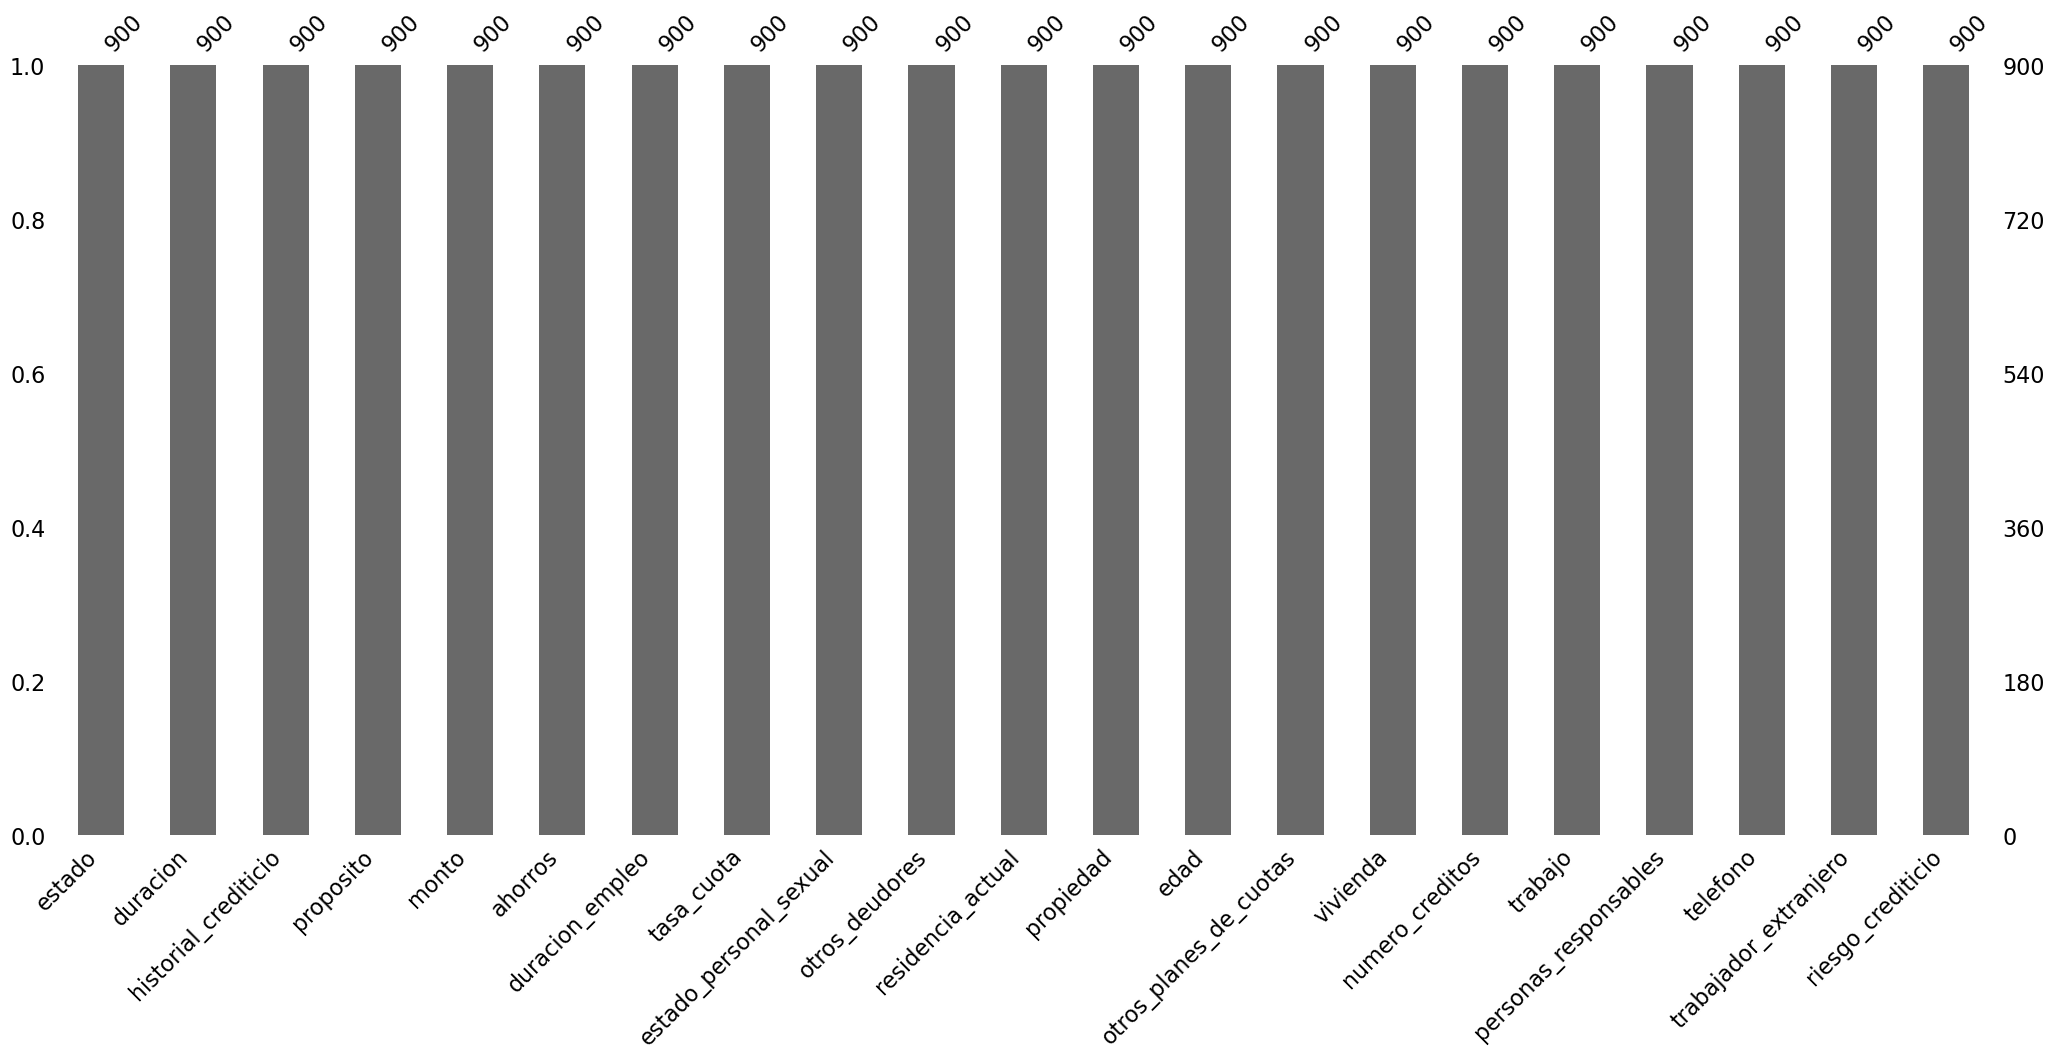

In [18]:
#Muestra el nivel de completitud, no hay missing values
msno.bar(Datos)

Se observa que no hay valores nulos o ausentes

### Distribucion variable objetivo

In [19]:
Datos["riesgo_crediticio"].value_counts()

good    630
bad     270
Name: riesgo_crediticio, dtype: int64

<Axes: xlabel='riesgo_crediticio', ylabel='count'>

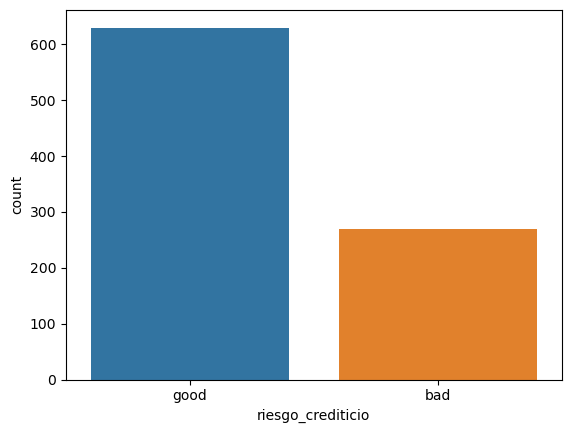

In [20]:
sns.countplot(x="riesgo_crediticio",data=Datos, order=Datos["riesgo_crediticio"].value_counts().index)

Se observa un desbalanceo en los datos por clase. Se sabe que algunos algoritmos pueden manejar el desbalanceo si se parametrizan correctamente, pero tambien las clases desbalanceadas podría dar un sesgo.

### Analisis univariante 
Analisis de variables individuales

Text(0.5, 1.0, 'Histograma de Frecuencias de Edades')

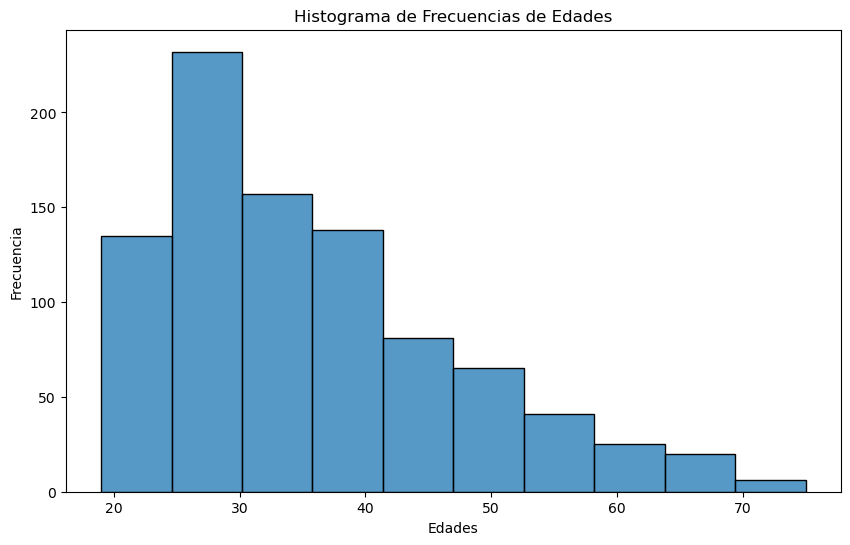

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data=Datos, x='edad', bins=10)

plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencias de Edades')

El gráfico es un histograma que muestra la distribución leptocúrtica de la variable numérica edad, con una asimetría positiva.
Se observa que la edad de la mayoría de los solicitantes del conjunto en estudio está entre 20 y 40 años de edad.


In [22]:
Datos[['edad']].describe()

edad
count  900.000000
mean    35.712222
std     11.486921
min     19.000000
25%     27.000000
50%     33.000000
75%     42.000000
max     75.000000

La edad minima es de 19 años y la máxima es de 75 años. Esto es importante para la parte de productivizacion para crear el formulario que recolecta los datos con los minimos y maximos correctos.

Text(0.5, 1.0, 'Histograma de Frecuencias de la duración')

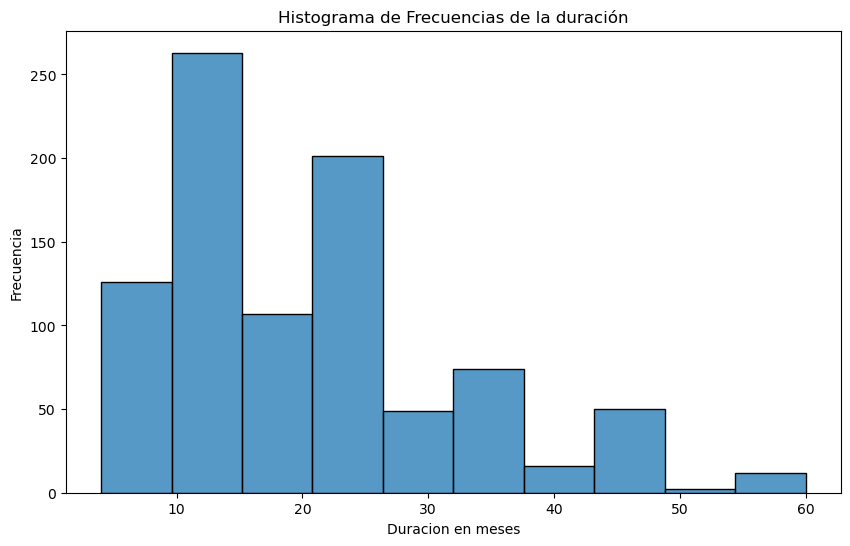

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(data=Datos, x='duracion', bins=10)

plt.xlabel('Duracion en meses')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencias de la duración')

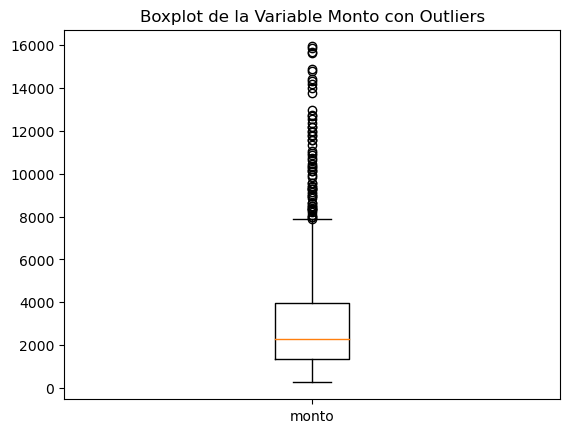

In [24]:
plt.boxplot(Datos["monto"],labels=["monto"])

# Etiquetas y título del gráfico
plt.title('Boxplot de la Variable Monto con Outliers')

# Mostrar el gráfico
plt.show()

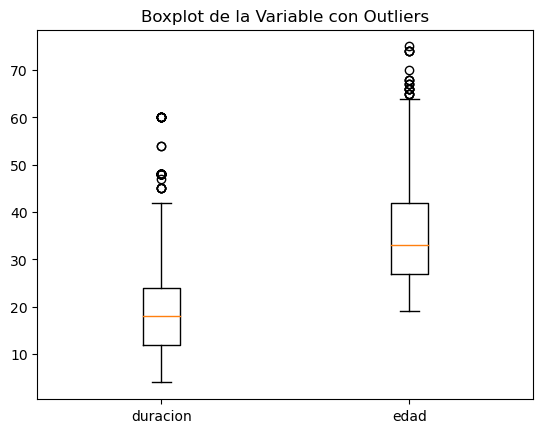

In [327]:
cols = ["duracion","edad"]
plt.boxplot(Datos[cols],  showfliers=True,labels=cols)

# Etiquetas y título del gráfico
plt.title('Boxplot de la Variable con Outliers')

# Mostrar el gráfico
plt.show()

Se pueden observar muchos datos atípicos que se deben atender antes de la etapa de selección de variables y modelado.

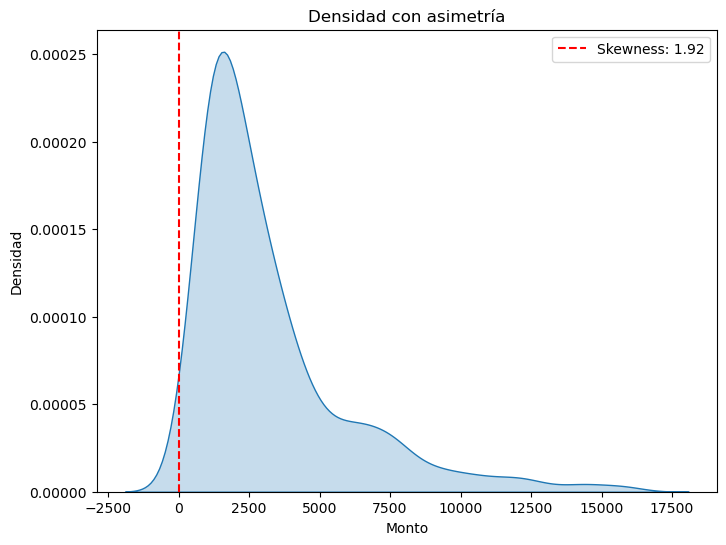

In [339]:
plt.figure(figsize=(8, 6))
sns.kdeplot(Datos['monto'], shade=True)

# Calcular y mostrar la skewness
skewness =Datos['monto'].skew()
plt.axvline(x=skewness, color='red', linestyle='--', label=f'Skewness: {skewness:.2f}')
plt.legend()

# Agregar etiquetas y título
plt.xlabel('Monto')
plt.ylabel('Densidad')
plt.title('Densidad con asimetría')

# Mostrar el gráfico
plt.show()

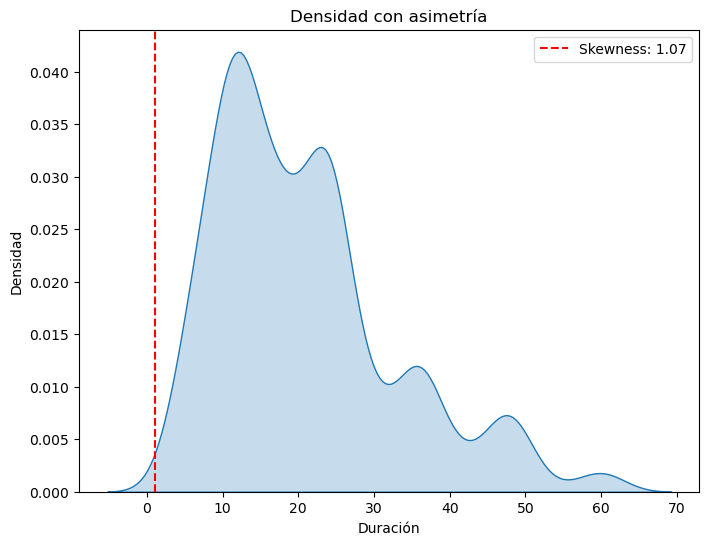

In [340]:
plt.figure(figsize=(8, 6))
sns.kdeplot(Datos['duracion'], shade=True)

# Calcular y mostrar la skewness
skewness =Datos['duracion'].skew()
plt.axvline(x=skewness, color='red', linestyle='--', label=f'Skewness: {skewness:.2f}')
plt.legend()

# Agregar etiquetas y título
plt.xlabel('Duración')
plt.ylabel('Densidad')
plt.title('Densidad con asimetría')

# Mostrar el gráfico
plt.show()

El gráfico danterior es un gráfico de densidad realizado para ver la asimetría y distribución de la variable duración. Como se puede observar tiene una asimetría positiva (con la cola de lado derecho) y una distribución leptocúrtica lo que significa que la elevación pronunciada. La duración de la mayoría de los créditos de los solicitantes del conjunto en estudio está entre 10 y 25 meses.

### Analisis Multivariante
Analisis de variables combinadas

### Variables Numéricas

In [328]:
Datos[["edad","monto","duracion","riesgo_crediticio"]]

edad  monto  duracion riesgo_crediticio
0      34   6999        48               bad
1      28   4249        30               bad
2      37   1922        12               bad
3      35   1471        15              good
4      54    672         6              good
..    ...    ...       ...               ...
895    23   3812        15              good
896    31   3108        30               bad
897    49    428         6              good
898    25   1138         9              good
899    30   5866        18              good

[900 rows x 4 columns]

In [29]:
sns.boxplot(x='riesgo_crediticio',y='monto',data=Datos);

El gráfico de cajas y bigotes anterior muestra una mayor amplitud de rango en el monto de los créditos que tuvieron problemas de pago después. Lo que significa que claramente mientras más alto el crédito más problemas de pago puede haber.

Text(0.5, 1.0, 'Grafico de dispersión')

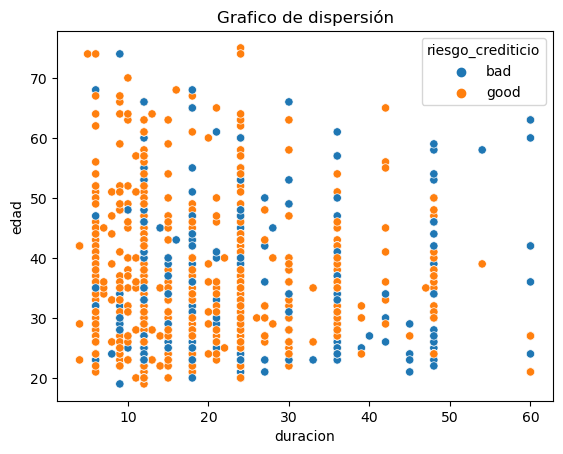

In [376]:
sns.scatterplot(x='duracion',y='edad',data=Datos.loc[:, ["edad", "duracion", "riesgo_crediticio"]],hue='riesgo_crediticio')
plt.title('Grafico de dispersión')

El gráfico anterior es un gráfico de dispersión, donde se observa la dispersión de las observaciones entre la edad y la duración en meses. No se observa un patrón en específico por la amplia gama de valores por lo que los casos con problemas de crédito pueden variables entre una gama alta de valores.

Text(0.5, 1.0, 'Grafico de dispersión')

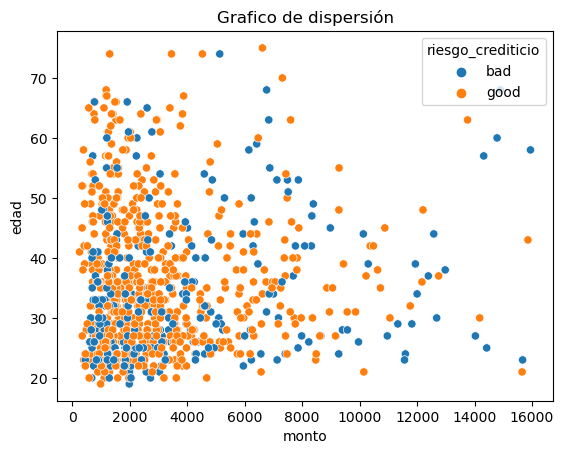

In [378]:
sns.scatterplot(x='monto',y='edad',data=Datos.loc[:, ["monto", "edad", "riesgo_crediticio"]],hue='riesgo_crediticio')
plt.title('Grafico de dispersión')

El gráfico anterior es un gráfico de dispersión, donde se observa la dispersión de las observaciones entre el monto y la edad.
No se observa un patrón en específico por la amplia gama de valores por lo que los casos con problemas de crédito pueden variar entre 0 y 12000 DM en su mayoría con menos de 50años.


### Variables Categóricas Ordinales

Son variables que aunque no tienen un numero realmente, si tienen un orden, es decir una es mayor que otra.
en el conjunto de datos hay 7.

Text(0.5, 1.0, 'Grafico de Frecuencias por Estado')

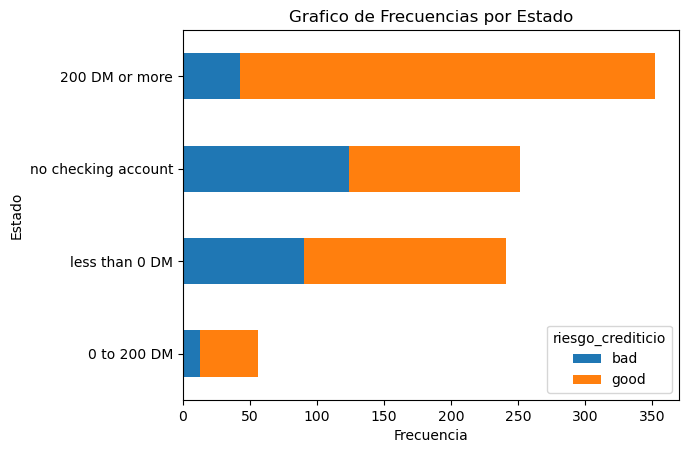

In [30]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["estado"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Estado')
plt.title('Grafico de Frecuencias por Estado')

In [31]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["ahorros"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Ahorros')
plt.title('Grafico de Frecuencias por Ahorros')

Text(0.5, 1.0, 'Grafico de Frecuencias por Ahorros')

Text(0.5, 1.0, 'Grafico de Frecuencias por Duración Empleo')

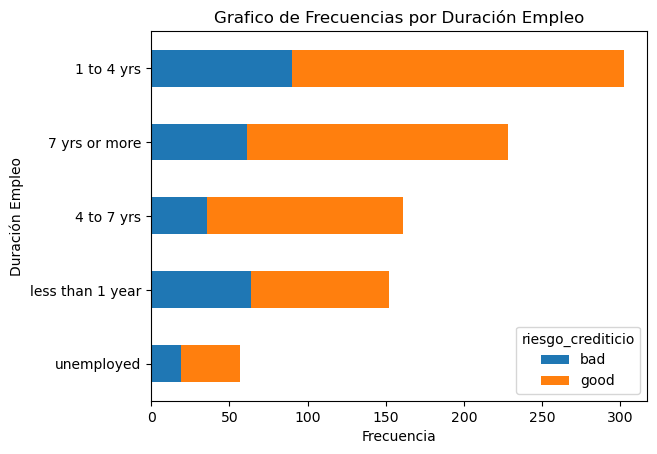

In [32]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["duracion_empleo"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Duración Empleo')
plt.title('Grafico de Frecuencias por Duración Empleo')

In [33]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["tasa_cuota"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Cuota')
plt.title('Grafico de Frecuencias por Cuota')

Text(0.5, 1.0, 'Grafico de Frecuencias por Cuota')

Text(0.5, 1.0, 'Grafico de Frecuencias por Residencia actual')

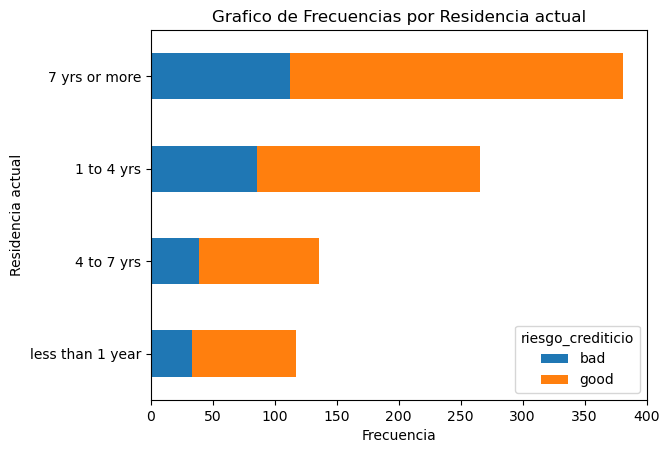

In [34]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["residencia_actual"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Residencia actual')
plt.title('Grafico de Frecuencias por Residencia actual')

In [35]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["numero_creditos"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Numero de créditos')
plt.title('Grafico de Frecuencias por Numero de créditos')

Text(0.5, 1.0, 'Grafico de Frecuencias por Numero de créditos')

Text(0.5, 1.0, 'Grafico de Frecuencias por Personas responsables')

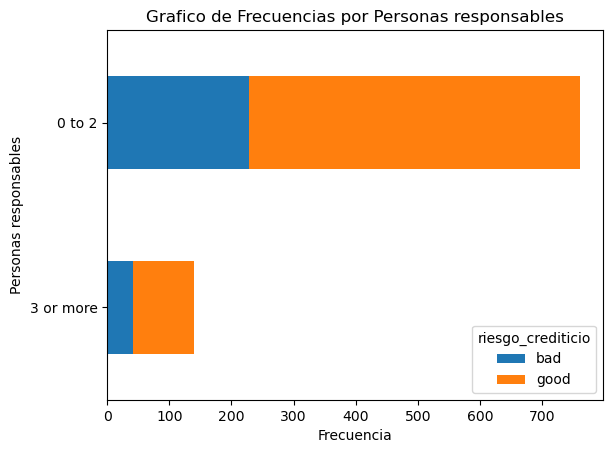

In [36]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["personas_responsables"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Personas responsables')
plt.title('Grafico de Frecuencias por Personas responsables')

### Variables Categóricas Nominales

En el conjunto hay 13, y son variables que no representan un numero y tampoco tienen un orden.

Text(0.5, 1.0, 'Grafico de Frecuencias por Trabajador extranjero')

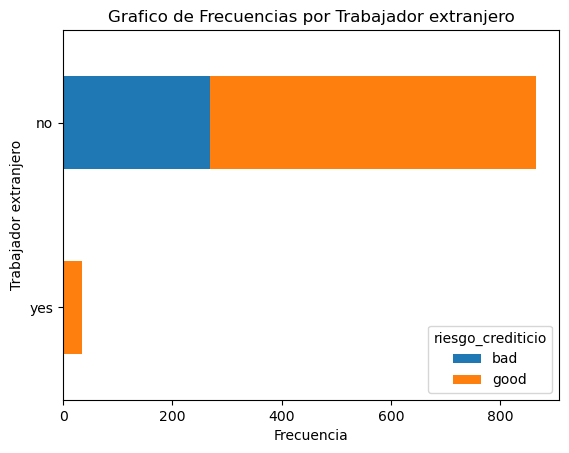

In [37]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["trabajador_extranjero"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Trabajador extranjero')
plt.title('Grafico de Frecuencias por Trabajador extranjero')

El grafico anterior es un gráfico de barras horizontales que muestra la frecuencia de la variable categórica nominal binaria teléfono por cada clase de riesgo de crédito.
Lo que nos dice el grafico es que es poca la diferencia entre una categoría y otra y la diferencia también es proporcional por clase de riesgo.


Text(0.5, 1.0, 'Grafico de Frecuencias por Telefono')

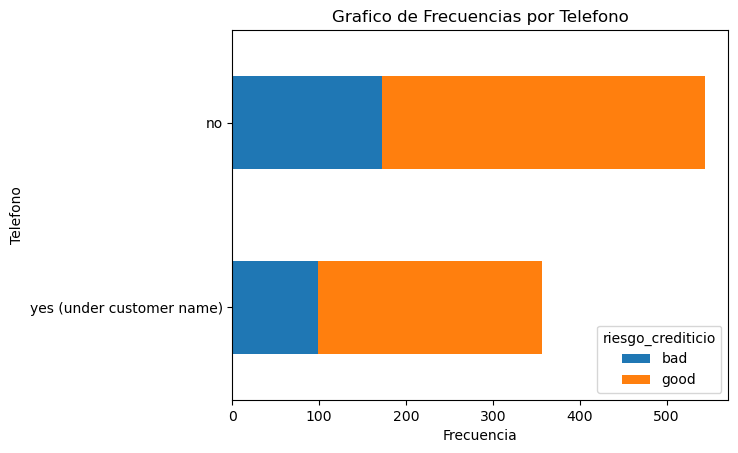

In [38]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["telefono"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Telefono')
plt.title('Grafico de Frecuencias por Telefono')

Text(0.5, 1.0, 'Grafico de Frecuencias por Trabajo')

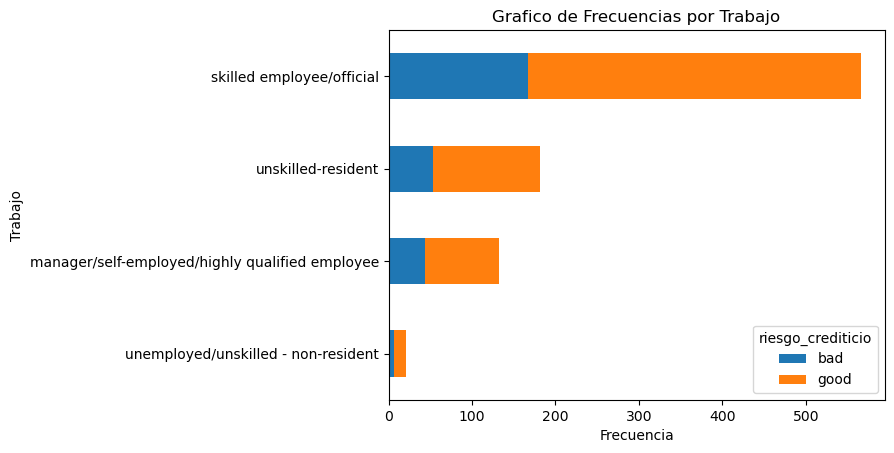

In [39]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["trabajo"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Trabajo')
plt.title('Grafico de Frecuencias por Trabajo')

En el gráfico anterior se puede observar valores mal representados, lo que podria generar problemas al momento de modelar.

Text(0.5, 1.0, 'Grafico de Frecuencias por Vivienda')

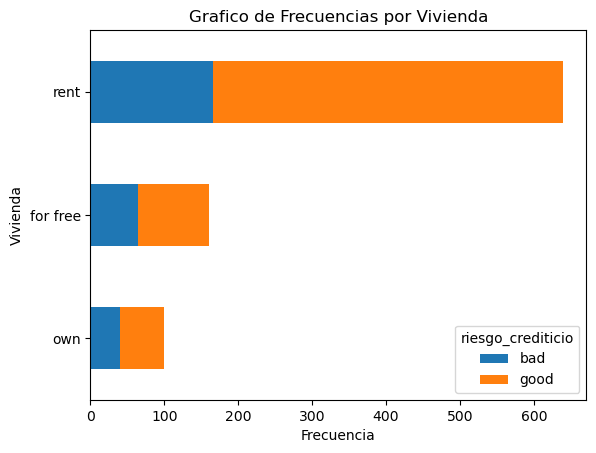

In [40]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["vivienda"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Vivienda')
plt.title('Grafico de Frecuencias por Vivienda')

Text(0.5, 1.0, 'Grafico de Frecuencias por otros planes de cuotas')

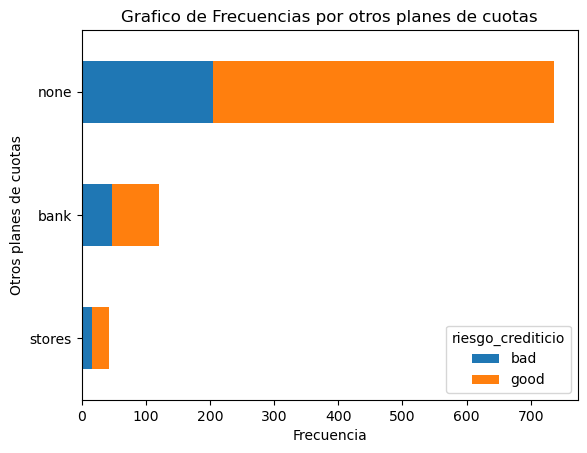

In [41]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["otros_planes_de_cuotas"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Otros planes de cuotas')
plt.title('Grafico de Frecuencias por otros planes de cuotas')

In [42]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["propiedad"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Propiedad')
plt.title('Grafico de Frecuencias por Propiedad')

Text(0.5, 1.0, 'Grafico de Frecuencias por Propiedad')

In [43]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["otros_deudores"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Otros deudores')
plt.title('Grafico de Frecuencias por Otros deudores')

Text(0.5, 1.0, 'Grafico de Frecuencias por Otros deudores')

Text(0.5, 1.0, 'Grafico de Frecuencias por Estado Sexo')

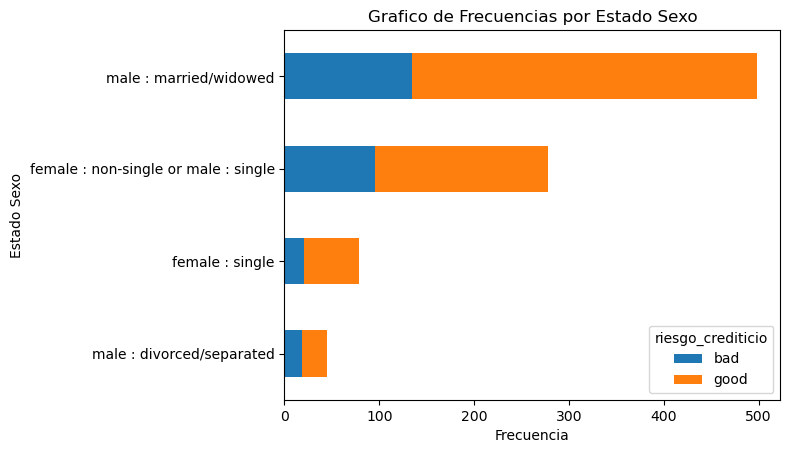

In [44]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["estado_personal_sexual"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Estado Sexo')
plt.title('Grafico de Frecuencias por Estado Sexo')

In [45]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["proposito"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Proposito credito')
plt.title('Grafico de Frecuencias por Proposito')

Text(0.5, 1.0, 'Grafico de Frecuencias por Proposito')

En el gráfico anterior se observa una oportunidad de imputacion de valores, algunos por mala representatividad y otros porque son categorías similares.

Text(0.5, 1.0, 'Grafico de Frecuencias por Historial Crediticio')

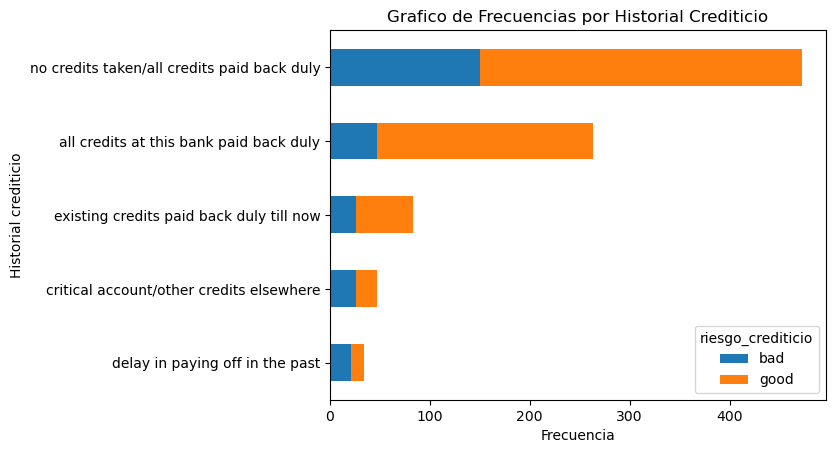

In [46]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos["historial_crediticio"], Datos["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Historial crediticio')
plt.title('Grafico de Frecuencias por Historial Crediticio')

# Preparación de los datos

## Importar librerias

In [47]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PowerTransformer, OrdinalEncoder
from sklearn.compose import ColumnTransformer

Hacemos una copia de los datos originales para comenzar el depurado y transformación de los datos a partir de una copia.

In [48]:
Datos_depurado = Datos.copy()

## Correccion de errores

De acuerdo a lo visto en el EDA no hay correcciones que realizar sobre los datos.

## Imputaciones

Como se pudo observar en la etapa anterior EDA, hay 4 variables con valores mal representados que pueden afectar el modelado. El siguiente código realiza las imputacion de las 4 variables segun análisis.

In [49]:
#ORDINALES
Datos_depurado["numero_creditos"] = Datos_depurado["numero_creditos"].replace(["4-5", "6 or more"], "4 or more")
#considerar unir mas dejando solo 1 y 2 o more
Datos_depurado["ahorros"] = Datos_depurado["ahorros"].replace(["100 to 500 DM", "500 to 1000 DM"], "100 to 1000 DM")
#considerar incluir estado

#NOMINALES
Datos_depurado["trabajo"] = Datos_depurado["trabajo"].replace(["unskilled-resident", "unemployed/unskilled - non-resident"], "unskilled-resident or unemployed/unskilled non-resident")

Datos_depurado["proposito"] = Datos_depurado["proposito"].replace(["domestic appliances", "radio/television","repairs"], "domestic appliances or radio/television or repairs")
Datos_depurado["proposito"] = Datos_depurado["proposito"].replace(["retraining","business", "vacation"], "business or vacation or retraining")
Datos_depurado["proposito"] = Datos_depurado["proposito"].replace(["car (new)", "car (used)"], "car (new) or car (used)")


### Post Imputaciones

A continuación se muestra el resultado después de realizar las imputaciones de las 4 variables.

Text(0.5, 1.0, 'Grafico de Frecuencias por Numero creditos')

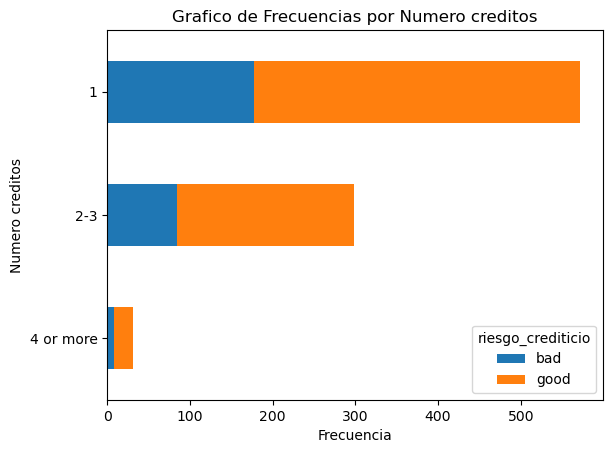

In [50]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos_depurado["numero_creditos"], Datos_depurado["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Numero creditos')
plt.title('Grafico de Frecuencias por Numero creditos')

Text(0.5, 1.0, 'Grafico de Frecuencias por Ahorros')

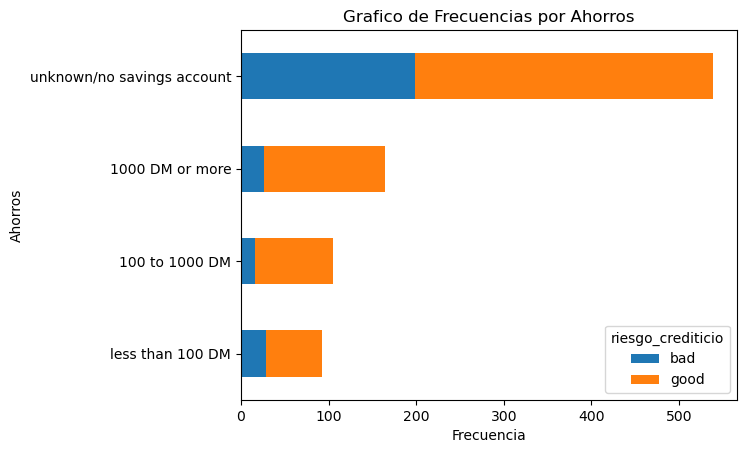

In [51]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos_depurado["ahorros"], Datos_depurado["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Ahorros')
plt.title('Grafico de Frecuencias por Ahorros')

In [52]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos_depurado["trabajo"], Datos_depurado["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Trabajo')
plt.title('Grafico de Frecuencias por Trabajo')

Text(0.5, 1.0, 'Grafico de Frecuencias por Trabajo')

Text(0.5, 1.0, 'Grafico de Frecuencias por Proposito')

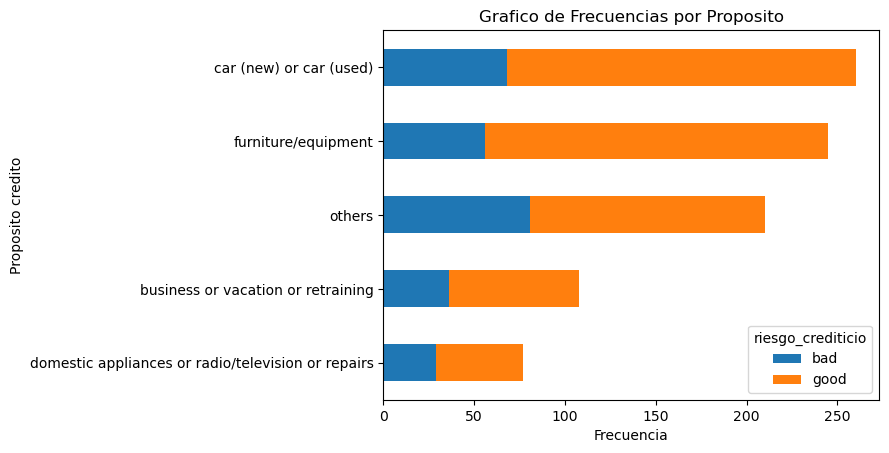

In [53]:
#frecuencias de ambas variables 
frec = pd.crosstab(Datos_depurado["proposito"], Datos_depurado["riesgo_crediticio"])

frec_sorted = frec.sum(axis=1).sort_values(ascending=True)
frec_ordenada = frec.loc[frec_sorted.index]

# Crea el gráfico de barras apilado
frec_ordenada.plot(kind="barh", stacked=True)

plt.xlabel('Frecuencia')
plt.ylabel('Proposito credito')
plt.title('Grafico de Frecuencias por Proposito')

In [54]:
Datos_depurado.head()

estado  duracion                         historial_crediticio  \
0  no checking account        48  no credits taken/all credits paid back duly   
1       less than 0 DM        30      all credits at this bank paid back duly   
2       less than 0 DM        12  no credits taken/all credits paid back duly   
3       200 DM or more        15      all credits at this bank paid back duly   
4       200 DM or more         6  no credits taken/all credits paid back duly   

                 proposito  monto                     ahorros duracion_empleo  \
0      furniture/equipment   6999  unknown/no savings account      4 to 7 yrs   
1                   others   4249  unknown/no savings account      unemployed   
2  car (new) or car (used)   1922  unknown/no savings account      1 to 4 yrs   
3      furniture/equipment   1471  unknown/no savings account      1 to 4 yrs   
4                   others    672  unknown/no savings account      unemployed   

     tasa_cuota                estado_personal_sexual otros_deudores  ...  \
0    35 or more                       female : single      guarantor  ...   
1  less than 20                       female : single           none  ...   
2  less than 20                male : married/widowed           none  ...   
3  less than 20                male : married/widowed           none  ...   
4    35 or more  female : non-single or male : single           none  ...   

                                   propiedad edad  otros_planes_de_cuotas  \
0                        unknown/no property   34                    none   
1  building soc. savings agr./life insurance   28                    none   
2                               car or other   37                    none   
3                                real estate   35                    none   
4                        unknown/no property   54                    none   

  vivienda numero_creditos                                            trabajo  \
0     rent             2-3                          skilled employee/official   
1     rent             2-3    manager/self-employed/highly qualified employee   
2     rent               1  unskilled-resident or unemployed/unskilled non...   
3      own             2-3                          skilled employee/official   
4     rent               1  unskilled-resident or unemployed/unskilled non...   

  personas_responsables                   telefono trabajador_extranjero  \
0                0 to 2  yes (under customer name)                    no   
1                0 to 2                         no                    no   
2                0 to 2                         no                    no   
3                0 to 2  yes (under customer name)                    no   
4                0 to 2  yes (under customer name)                    no   

  riesgo_crediticio  
0               bad  
1               bad  
2               bad  
3              good  
4              good  

[5 rows x 21 columns]

## Tratamiento de variables Categóricas Ordinales

Se utiliza la funcion OrdinalEncoder para convertir a numeros las 7 variables categoricas ordinales. De esta forma se puede aprovechar mas valor de las mismas que si se trataran como nominales.

In [55]:
estado_OrEncoder = OrdinalEncoder(categories=[("no checking account", "less than 0 DM", "0 to 200 DM", "200 DM or more")])
ahorros_OrEncoder = OrdinalEncoder(categories=[("unknown/no savings account", "less than 100 DM", "100 to 1000 DM", "1000 DM or more")])
dur_empleo_OrEncoder = OrdinalEncoder(categories=[("unemployed", "less than 1 year", "1 to 4 yrs", "4 to 7 yrs", "7 yrs or more")])
tasa_OrEncoder = OrdinalEncoder(categories=[("35 or more", "25 to 35", "20 to 25", "less than 20")])
residencia_OrEncoder = OrdinalEncoder(categories=[("less than 1 year", "1 to 4 yrs", "4 to 7 yrs", "7 yrs or more")])
#Se cambia el orden cosiderando que al tener mas creditos es mayor el riesgo de que no pueda pagar.
num_creditos_OrEncoder = OrdinalEncoder(categories=[("4 or more","2-3","1")])
#Se cambia el orden cosiderando que mientras menos personas dependan de el es mejor
per_responsables_OrEncoder = OrdinalEncoder(categories=[("3 or more", "0 to 2")])

In [56]:
col_transformer = ColumnTransformer(
    transformers=[
        ('estado_OrEncoder', estado_OrEncoder, ['estado']),
        ('ahorros_OrEncoder', ahorros_OrEncoder, ['ahorros']),
        ('dur_empleo_OrEncoder', dur_empleo_OrEncoder, ['duracion_empleo']),
        ('tasa_OrEncoder', tasa_OrEncoder, ['tasa_cuota']),
        ('residencia_OrEncoder', residencia_OrEncoder, ['residencia_actual']),
        ('num_creditos_OrEncoder', num_creditos_OrEncoder, ['numero_creditos']),
        ('per_responsables_OrEncoder', per_responsables_OrEncoder, ['personas_responsables']),
      
        ],remainder='passthrough')

In [57]:
Datatransformed = col_transformer.fit_transform(Datos_depurado)
Datatransformed

array([[0.0, 0.0, 3.0, ..., 'yes (under customer name)', 'no', 'bad'],
       [1.0, 0.0, 0.0, ..., 'no', 'no', 'bad'],
       [1.0, 0.0, 2.0, ..., 'no', 'no', 'bad'],
       ...,
       [0.0, 0.0, 4.0, ..., 'yes (under customer name)', 'no', 'good'],
       [0.0, 0.0, 2.0, ..., 'no', 'no', 'good'],
       [1.0, 1.0, 2.0, ..., 'yes (under customer name)', 'no', 'good']],
      dtype=object)

In [58]:
NombreColumnas = ['estado','ahorros','duracion_empleo', 'tasa_cuota','residencia_actual','numero_creditos','personas_responsables',
                  'duracion', 'historial_crediticio', 'proposito', 'monto',
                  'estado_personal_sexual', 'otros_deudores',  'propiedad', 'edad',
                  'otros_planes_de_cuotas', 'vivienda',  'trabajo',
                  'telefono', 'trabajador_extranjero',
                  'riesgo_crediticio']

In [59]:
Datos_depurado =pd.DataFrame(Datatransformed,columns = NombreColumnas)
Datos_depurado['estado'] = Datos_depurado['estado'].astype(int)
Datos_depurado['ahorros'] = Datos_depurado['ahorros'].astype(int)
Datos_depurado['duracion_empleo'] = Datos_depurado['duracion_empleo'].astype(int)
Datos_depurado['tasa_cuota'] = Datos_depurado['tasa_cuota'].astype(int)
Datos_depurado['residencia_actual'] = Datos_depurado['residencia_actual'].astype(int)
Datos_depurado['numero_creditos'] = Datos_depurado['numero_creditos'].astype(int)
Datos_depurado['personas_responsables'] = Datos_depurado['personas_responsables'].astype(int)
#Numericas
Datos_depurado['duracion'] = Datos_depurado['duracion'].astype(float)
Datos_depurado['monto'] = Datos_depurado['monto'].astype(float)
Datos_depurado['edad'] = Datos_depurado['edad'].astype(float)

In [60]:
Datos_depurado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   estado                  900 non-null    int32  
 1   ahorros                 900 non-null    int32  
 2   duracion_empleo         900 non-null    int32  
 3   tasa_cuota              900 non-null    int32  
 4   residencia_actual       900 non-null    int32  
 5   numero_creditos         900 non-null    int32  
 6   personas_responsables   900 non-null    int32  
 7   duracion                900 non-null    float64
 8   historial_crediticio    900 non-null    object 
 9   proposito               900 non-null    object 
 10  monto                   900 non-null    float64
 11  estado_personal_sexual  900 non-null    object 
 12  otros_deudores          900 non-null    object 
 13  propiedad               900 non-null    object 
 14  edad                    900 non-null    fl

In [61]:
Datos_depurado.head()

estado  ahorros  duracion_empleo  tasa_cuota  residencia_actual  \
0       0        0                3           0                  0   
1       1        0                0           3                  1   
2       1        0                2           3                  1   
3       3        0                2           3                  3   
4       3        0                0           0                  3   

   numero_creditos  personas_responsables  duracion  \
0                1                      1      48.0   
1                1                      1      30.0   
2                2                      1      12.0   
3                1                      1      15.0   
4                2                      1       6.0   

                          historial_crediticio                proposito  ...  \
0  no credits taken/all credits paid back duly      furniture/equipment  ...   
1      all credits at this bank paid back duly                   others  ...   
2  no credits taken/all credits paid back duly  car (new) or car (used)  ...   
3      all credits at this bank paid back duly      furniture/equipment  ...   
4  no credits taken/all credits paid back duly                   others  ...   

                 estado_personal_sexual otros_deudores  \
0                       female : single      guarantor   
1                       female : single           none   
2                male : married/widowed           none   
3                male : married/widowed           none   
4  female : non-single or male : single           none   

                                   propiedad  edad  otros_planes_de_cuotas  \
0                        unknown/no property  34.0                    none   
1  building soc. savings agr./life insurance  28.0                    none   
2                               car or other  37.0                    none   
3                                real estate  35.0                    none   
4                        unknown/no property  54.0                    none   

  vivienda                                            trabajo  \
0     rent                          skilled employee/official   
1     rent    manager/self-employed/highly qualified employee   
2     rent  unskilled-resident or unemployed/unskilled non...   
3      own                          skilled employee/official   
4     rent  unskilled-resident or unemployed/unskilled non...   

                    telefono trabajador_extranjero riesgo_crediticio  
0  yes (under customer name)                    no               bad  
1                         no                    no               bad  
2                         no                    no               bad  
3  yes (under customer name)                    no              good  
4  yes (under customer name)                    no              good  

[5 rows x 21 columns]

In [62]:
#Se actualiza la lista de variables categoricas. Principalmente las ordinales las cuales deben pasarse a dummys mas adelante.
col_cat = Datos_depurado.select_dtypes(include="object").columns
col_cat = col_cat.drop("riesgo_crediticio")
col_cat

Index(['historial_crediticio', 'proposito', 'estado_personal_sexual',
       'otros_deudores', 'propiedad', 'otros_planes_de_cuotas', 'vivienda',
       'trabajo', 'telefono', 'trabajador_extranjero'],
      dtype='object')

col_num: Se deja como estaba desde el inicio. 

## Tratamiento de Outliers y estandarización

Se utiliza un **PowerTranformer** en lugar de **standarscaler** para escalar los datos numericos debido a que esta funcion es mejor cuando los valores tiene datos atipicos como en nuestro caso.
Es importante mencionar que hay que tener consideraciones necesarias en para cuando se trata con una sola observacion, como en el caso de sitio web en la parte de productivización. Ya que aplicar esta transformacion sobre un solo dato da errores por lo que debe manejarse como un escenario excepcional.

In [63]:
numericas_pt = PowerTransformer(method='box-cox')

In [64]:
col_transformer2 = ColumnTransformer(
    transformers=[
        ('Outliers', numericas_pt, col_num)
        ],remainder='passthrough')

In [65]:
Datatransformed = col_transformer2.fit_transform(Datos_depurado)
Datatransformed

array([[1.7724899217363754, 1.368013510356537, 0.09107600681060861, ...,
        'yes (under customer name)', 'no', 'bad'],
       [0.9009312805440985, 0.760424100913062, -0.6093223489144501, ...,
        'no', 'no', 'bad'],
       [-0.6915435693505497, -0.25195270454410706, 0.3695978869029138,
        ..., 'no', 'no', 'bad'],
       ...,
       [-1.8084190872326147, -2.3363958860806258, 1.192480470515864, ...,
        'yes (under customer name)', 'no', 'good'],
       [-1.1639248645580138, -0.9535494036900599, -1.0608154636352578,
        ..., 'no', 'no', 'good'],
       [-0.0037252107028705192, 1.155543870310346, -0.3502770051077241,
        ..., 'yes (under customer name)', 'no', 'good']], dtype=object)

In [66]:
NombreColumnas = ['duracion', 'monto', 'edad',
                  'estado','ahorros','duracion_empleo', 'tasa_cuota','residencia_actual','numero_creditos','personas_responsables',
                  'historial_crediticio', 'proposito', 
                  'estado_personal_sexual', 'otros_deudores',  'propiedad', 
                  'otros_planes_de_cuotas', 'vivienda',  'trabajo',
                  'telefono', 'trabajador_extranjero',
                  'riesgo_crediticio']

In [67]:
Datos_depurado = pd.DataFrame(data = Datatransformed,columns = NombreColumnas)
Datos_depurado['estado'] = Datos_depurado['estado'].astype(int)
Datos_depurado['ahorros'] = Datos_depurado['ahorros'].astype(int)
Datos_depurado['duracion_empleo'] = Datos_depurado['duracion_empleo'].astype(int)
Datos_depurado['tasa_cuota'] = Datos_depurado['tasa_cuota'].astype(int)
Datos_depurado['residencia_actual'] = Datos_depurado['residencia_actual'].astype(int)
Datos_depurado['numero_creditos'] = Datos_depurado['numero_creditos'].astype(int)
Datos_depurado['personas_responsables'] = Datos_depurado['personas_responsables'].astype(int)
#Variables numericas
Datos_depurado['duracion'] = Datos_depurado['duracion'].astype(float)
Datos_depurado['monto'] = Datos_depurado['monto'].astype(float)
Datos_depurado['edad'] = Datos_depurado['edad'].astype(float)

In [68]:
Datos_depurado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   duracion                900 non-null    float64
 1   monto                   900 non-null    float64
 2   edad                    900 non-null    float64
 3   estado                  900 non-null    int32  
 4   ahorros                 900 non-null    int32  
 5   duracion_empleo         900 non-null    int32  
 6   tasa_cuota              900 non-null    int32  
 7   residencia_actual       900 non-null    int32  
 8   numero_creditos         900 non-null    int32  
 9   personas_responsables   900 non-null    int32  
 10  historial_crediticio    900 non-null    object 
 11  proposito               900 non-null    object 
 12  estado_personal_sexual  900 non-null    object 
 13  otros_deudores          900 non-null    object 
 14  propiedad               900 non-null    ob

In [69]:
Datos_depurado.head()

duracion     monto      edad  estado  ahorros  duracion_empleo  tasa_cuota  \
0  1.772490  1.368014  0.091076       0        0                3           0   
1  0.900931  0.760424 -0.609322       1        0                0           3   
2 -0.691544 -0.251953  0.369598       1        0                2           3   
3 -0.316251 -0.606605  0.188283       3        0                2           3   
4 -1.808419 -1.686213  1.443965       3        0                0           0   

   residencia_actual  numero_creditos  personas_responsables  ...  \
0                  0                1                      1  ...   
1                  1                1                      1  ...   
2                  1                2                      1  ...   
3                  3                1                      1  ...   
4                  3                2                      1  ...   

                 proposito                estado_personal_sexual  \
0      furniture/equipment                       female : single   
1                   others                       female : single   
2  car (new) or car (used)                male : married/widowed   
3      furniture/equipment                male : married/widowed   
4                   others  female : non-single or male : single   

  otros_deudores                                  propiedad  \
0      guarantor                        unknown/no property   
1           none  building soc. savings agr./life insurance   
2           none                               car or other   
3           none                                real estate   
4           none                        unknown/no property   

  otros_planes_de_cuotas vivienda  \
0                   none     rent   
1                   none     rent   
2                   none     rent   
3                   none      own   
4                   none     rent   

                                             trabajo  \
0                          skilled employee/official   
1    manager/self-employed/highly qualified employee   
2  unskilled-resident or unemployed/unskilled non...   
3                          skilled employee/official   
4  unskilled-resident or unemployed/unskilled non...   

                    telefono trabajador_extranjero riesgo_crediticio  
0  yes (under customer name)                    no               bad  
1                         no                    no               bad  
2                         no                    no               bad  
3  yes (under customer name)                    no              good  
4  yes (under customer name)                    no              good  

[5 rows x 21 columns]

### Resultado de tratamiento

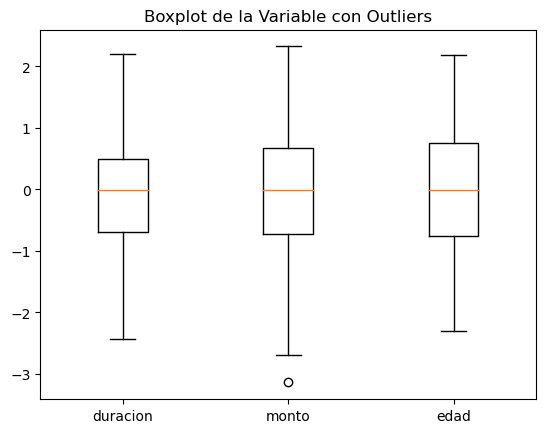

In [70]:
plt.boxplot(Datos_depurado[col_num],  showfliers=True,labels=col_num)

# Etiquetas y título del gráfico
plt.title('Boxplot de la Variable con Outliers')

# Mostrar el gráfico
plt.show()

Como se puede observar en el grafico anterior y si se compara con los graficos de EDA, se observa una estandarizacion y la eliminacion de valores atipicos casi al 100%

<Axes: >

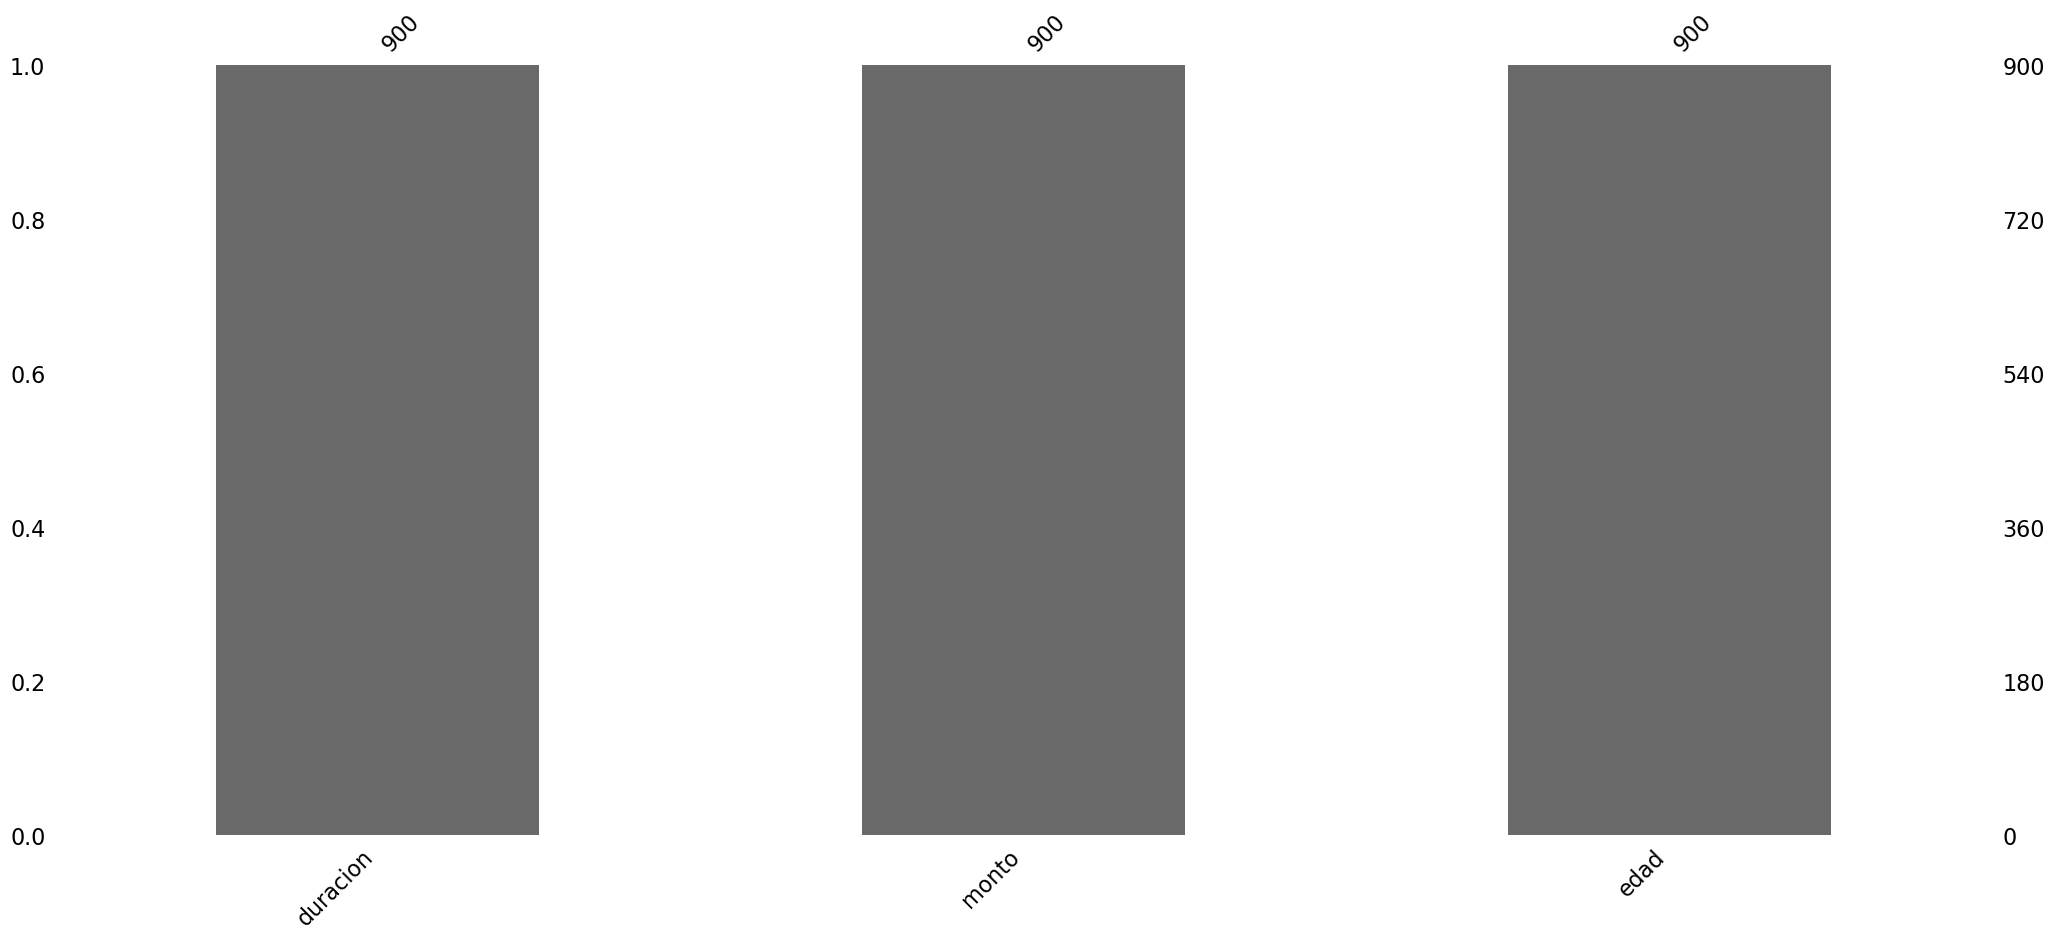

In [71]:

msno.bar(Datos_depurado[col_num])

Se vuelve a revisar la completitud de los datos y se observa que despues del tratamiento no hay valores ausentes

## DUMMYS

if_binary: Las categoricas binarias solo deja una de las dos, las multinivel las deja todas

In [72]:
dummy_oh = OneHotEncoder(drop='if_binary', sparse=False)
dummy_oh = dummy_oh.fit(Datos_depurado[col_cat])
column_dummynames = dummy_oh.get_feature_names_out(col_cat)

In [73]:
col_transformer3 = ColumnTransformer(
    transformers=[
        ('Dummies', dummy_oh, col_cat)
        ],remainder='passthrough')

In [74]:
Datatransformed = col_transformer3.fit_transform(Datos_depurado)
Datatransformed

array([[0.0, 0.0, 0.0, ..., 1, 1, 'bad'],
       [1.0, 0.0, 0.0, ..., 1, 1, 'bad'],
       [0.0, 0.0, 0.0, ..., 2, 1, 'bad'],
       ...,
       [0.0, 0.0, 0.0, ..., 2, 1, 'good'],
       [1.0, 0.0, 0.0, ..., 1, 1, 'good'],
       [0.0, 0.0, 0.0, ..., 1, 1, 'good']], dtype=object)

In [75]:
NombreColumnas = column_dummynames.tolist() + [
                  'duracion', 'monto', 'edad',
                  'estado','ahorros','duracion_empleo', 'tasa_cuota','residencia_actual','numero_creditos','personas_responsables',
                  'riesgo_crediticio']

In [76]:
Datos_depurado = pd.DataFrame(data = Datatransformed,columns = NombreColumnas)
Datos_depurado[column_dummynames.tolist()] = Datos_depurado[column_dummynames.tolist()].astype(int)

Datos_depurado['estado'] = Datos_depurado['estado'].astype(int)
Datos_depurado['ahorros'] = Datos_depurado['ahorros'].astype(int)
Datos_depurado['duracion_empleo'] = Datos_depurado['duracion_empleo'].astype(int)
Datos_depurado['tasa_cuota'] = Datos_depurado['tasa_cuota'].astype(int)
Datos_depurado['residencia_actual'] = Datos_depurado['residencia_actual'].astype(int)
Datos_depurado['numero_creditos'] = Datos_depurado['numero_creditos'].astype(int)
Datos_depurado['personas_responsables'] = Datos_depurado['personas_responsables'].astype(int)

Datos_depurado['duracion'] = Datos_depurado['duracion'].astype(float)
Datos_depurado['monto'] = Datos_depurado['monto'].astype(float)
Datos_depurado['edad'] = Datos_depurado['edad'].astype(float)

In [77]:
Datos_depurado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 43 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   historial_crediticio_all credits at this bank paid back duly      900 non-null    int32  
 1   historial_crediticio_critical account/other credits elsewhere     900 non-null    int32  
 2   historial_crediticio_delay in paying off in the past              900 non-null    int32  
 3   historial_crediticio_existing credits paid back duly till now     900 non-null    int32  
 4   historial_crediticio_no credits taken/all credits paid back duly  900 non-null    int32  
 5   proposito_business or vacation or retraining                      900 non-null    int32  
 6   proposito_car (new) or car (used)                                 900 non-null    int32  
 7   proposito_domestic appliances or ra

Todas las variables categóricas nominales se les aplica la técnica de OneHotEndoder con la opción drop=’if_binary’ de forma que las que son binarias queden solamente uno de los dos valores y las que son multinivel las deja todas. Después de aplicar dummy se aumenta de 21 variables a 43 variables y se realiza un tratamiento para renombrarlas por un nombre más corto y representativo ya que los nombres son muy largos

In [78]:
Datos_depurado.head()

historial_crediticio_all credits at this bank paid back duly  \
0                                                  0              
1                                                  1              
2                                                  0              
3                                                  1              
4                                                  0              

   historial_crediticio_critical account/other credits elsewhere  \
0                                                  0               
1                                                  0               
2                                                  0               
3                                                  0               
4                                                  0               

   historial_crediticio_delay in paying off in the past  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   historial_crediticio_existing credits paid back duly till now  \
0                                                  0               
1                                                  0               
2                                                  0               
3                                                  0               
4                                                  0               

   historial_crediticio_no credits taken/all credits paid back duly  \
0                                                  1                  
1                                                  0                  
2                                                  1                  
3                                                  0                  
4                                                  1                  

   proposito_business or vacation or retraining  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   proposito_car (new) or car (used)  \
0                                  0   
1                                  0   
2                                  1   
3                                  0   
4                                  0   

   proposito_domestic appliances or radio/television or repairs  \
0                                                  0              
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  0              

   proposito_furniture/equipment  proposito_others  ...     monto      edad  \
0                              1                 0  ...  1.368014  0.091076   
1                              0                 1  ...  0.760424 -0.609322   
2                              0                 0  ... -0.251953  0.369598   
3                              1                 0  ... -0.606605  0.188283   
4                              0                 1  ... -1.686213  1.443965   

   estado  ahorros  duracion_empleo  tasa_cuota  residencia_actual  \
0       0        0                3           0                  0   
1       1        0                0           3                  1   
2       1        0                2           3                  1   
3       3        0                2           3                  3   
4       3        0                0           0                  3   

   numero_creditos  personas_responsables  riesgo_crediticio  
0                1                      1                bad  
1                1         

Debido a que los nombres son muy largos y dificulta el desarrollo en las etapas futuras se procede a renombrar

In [79]:
#Cambiar los nombres de la dummys
nuevos_nombres = {
    'historial_crediticio_all credits at this bank paid back duly': 'historial_cred_all',
    'historial_crediticio_critical account/other credits elsewhere': 'historial_cred_critical',
    'historial_crediticio_delay in paying off in the past': 'historial_cred_delay',
    'historial_crediticio_existing credits paid back duly till now': 'historial_cred_existing',
    'historial_crediticio_no credits taken/all credits paid back duly': 'historial_cred_no_credits',
    'proposito_business or vacation or retraining': 'proposito_business_vacation',
    'proposito_car (new) or car (used)': 'proposito_car_new_used',
    'proposito_domestic appliances or radio/television or repairs': 'proposito_domestic_app_repairs',
    'proposito_furniture/equipment': 'proposito_furn_equipment',
    'proposito_others': 'proposito_others',
    'estado_personal_sexual_female : non-single or male : single': 'estado_per_sex_non_single_male',
    'estado_personal_sexual_female : single': 'estado_per_sex_single',
    'estado_personal_sexual_male : divorced/separated': 'estado_per_sex_divorced_separated',
    'estado_personal_sexual_male : married/widowed': 'estado_per_sex_married_widowed',
    'otros_deudores_co-applicant': 'otros_deud_co_applicant',
    'otros_deudores_guarantor': 'otros_deud_guarantor',
    'otros_deudores_none': 'otros_deud_none',
    'propiedad_building soc. savings agr./life insurance': 'propiedad_building',
    'propiedad_car or other': 'propiedad_car_other',
    'propiedad_real estate': 'propiedad_real_estate',
    'propiedad_unknown/no property': 'propiedad_unknown_no_property',
    'otros_planes_de_cuotas_bank': 'otros_planes_bank',
    'otros_planes_de_cuotas_none': 'otros_planes_none',
    'otros_planes_de_cuotas_stores': 'otros_planes_stores',
    'vivienda_for free': 'vivienda_free',
    'vivienda_own': 'vivienda_own',
    'vivienda_rent': 'vivienda_rent',
    'trabajo_manager/self-employed/highly qualified employee': 'trabajo_manager',
    'trabajo_skilled employee/official': 'trabajo_skilled_employee',
    'trabajo_unskilled-resident or unemployed/unskilled non-resident': 'trabajo_unski_resident_unemploy_non_resident',
    'telefono_yes (under customer name)': 'telefono_yes',
    'trabajador_extranjero_yes': 'trabajador_extranjero_yes' 
    
    
}

# Utilizar el método rename para cambiar los nombres de las columnas
Datos_depurado.rename(columns=nuevos_nombres, inplace=True)

In [80]:
Datos_depurado.columns

Index(['historial_cred_all', 'historial_cred_critical', 'historial_cred_delay',
       'historial_cred_existing', 'historial_cred_no_credits',
       'proposito_business_vacation', 'proposito_car_new_used',
       'proposito_domestic_app_repairs', 'proposito_furn_equipment',
       'proposito_others', 'estado_per_sex_non_single_male',
       'estado_per_sex_single', 'estado_per_sex_divorced_separated',
       'estado_per_sex_married_widowed', 'otros_deud_co_applicant',
       'otros_deud_guarantor', 'otros_deud_none', 'propiedad_building',
       'propiedad_car_other', 'propiedad_real_estate',
       'propiedad_unknown_no_property', 'otros_planes_bank',
       'otros_planes_none', 'otros_planes_stores', 'vivienda_free',
       'vivienda_own', 'vivienda_rent', 'trabajo_manager',
       'trabajo_skilled_employee',
       'trabajo_unski_resident_unemploy_non_resident', 'telefono_yes',
       'trabajador_extranjero_yes', 'duracion', 'monto', 'edad', 'estado',
       'ahorros', 'duracion_em

In [81]:
#Grafico de completitud
msno.bar(Datos_depurado)

<Axes: >

Se comprueba finalmente la completitud de los datos y todo se ve sin problemas.

### Consolidado de datos depurado

Se une en un solo conjunto de datos, las variables numericas standarizadas y sin outliers
Todas las categoricas pasadas a dummys y onehot y nuestra variable objetivo

In [82]:
Datos_depurado.head()

historial_cred_all  historial_cred_critical  historial_cred_delay  \
0                   0                        0                     0   
1                   1                        0                     0   
2                   0                        0                     0   
3                   1                        0                     0   
4                   0                        0                     0   

   historial_cred_existing  historial_cred_no_credits  \
0                        0                          1   
1                        0                          0   
2                        0                          1   
3                        0                          0   
4                        0                          1   

   proposito_business_vacation  proposito_car_new_used  \
0                            0                       0   
1                            0                       0   
2                            0                       1   
3                            0                       0   
4                            0                       0   

   proposito_domestic_app_repairs  proposito_furn_equipment  proposito_others  \
0                               0                         1                 0   
1                               0                         0                 1   
2                               0                         0                 0   
3                               0                         1                 0   
4                               0                         0                 1   

   ...     monto      edad  estado  ahorros  duracion_empleo  tasa_cuota  \
0  ...  1.368014  0.091076       0        0                3           0   
1  ...  0.760424 -0.609322       1        0                0           3   
2  ... -0.251953  0.369598       1        0                2           3   
3  ... -0.606605  0.188283       3        0                2           3   
4  ... -1.686213  1.443965       3        0                0           0   

   residencia_actual  numero_creditos  personas_responsables  \
0                  0                1                      1   
1                  1                1                      1   
2                  1                2                      1   
3                  3                1                      1   
4                  3                2                      1   

   riesgo_crediticio  
0                bad  
1                bad  
2                bad  
3               good  
4               good  

[5 rows x 43 columns]

In [83]:
Datos_depurado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   historial_cred_all                            900 non-null    int32  
 1   historial_cred_critical                       900 non-null    int32  
 2   historial_cred_delay                          900 non-null    int32  
 3   historial_cred_existing                       900 non-null    int32  
 4   historial_cred_no_credits                     900 non-null    int32  
 5   proposito_business_vacation                   900 non-null    int32  
 6   proposito_car_new_used                        900 non-null    int32  
 7   proposito_domestic_app_repairs                900 non-null    int32  
 8   proposito_furn_equipment                      900 non-null    int32  
 9   proposito_others                              900 non-null    int

### Correlacion de variables numericas

In [383]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(Datos_depurado[["monto","duracion","edad"]].corr(), cmap=cmap,annot=True)

<Axes: >

En la matriz de correlaciones anterior se puede destacar una correlación positiva y moderada de un 64% entre la duración y el monto de los créditos. Lo que significa que a medida que la duración aumenta el monto también aumenta moderadamente.

### Correlacion de todas las variables

In [84]:
corr = Datos_depurado.drop(columns="riesgo_crediticio").corr()

<Axes: >

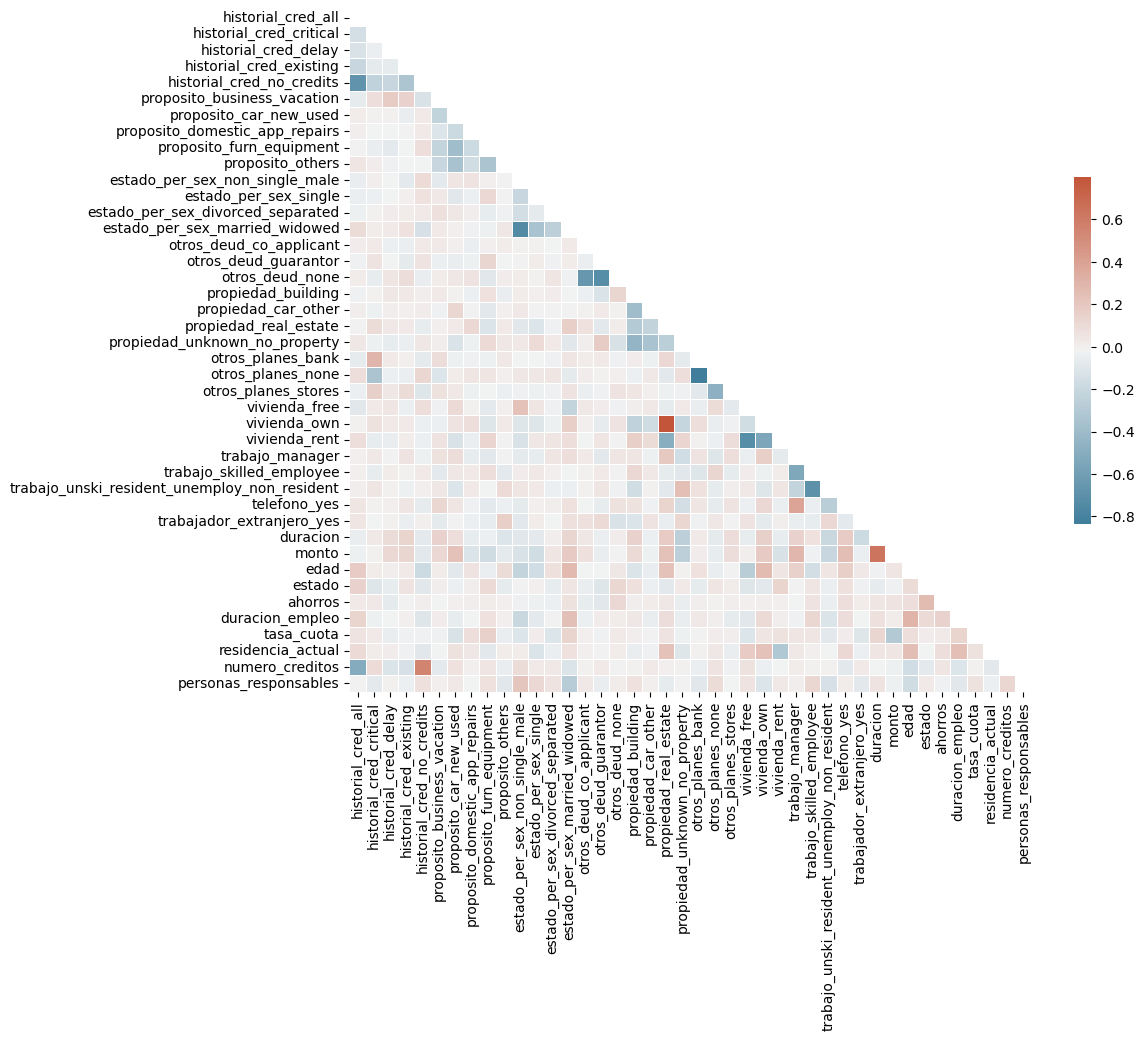

In [85]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Se observa que la mayoría de correlaciones son débiles o prácticamente inexistentes, alguna excepción como vivienda_own y propiedad_real_state, que indica que la pertenencia más valiosa de las personas con casa propia es la misma vivienda, lo cual tiene sentido. Recordar que para lograr este análisis de correlación se esta trabajando con datos transforma dos usando dummys y ordinal enconder.

# Definicion de X y y

In [86]:
X = Datos_depurado.drop(columns="riesgo_crediticio")
y = Datos_depurado[["riesgo_crediticio"]]

# Submuestreo 

Recordemos que se realizaron tres versiones del trabajo. Los gráficos anteriores corresponden a la versión donde se realizó un submuestreo de la clase mayoritaria. En este apartado se va justificar por qué.

En la versión original tenemos un desbalanceo de clases que se detalló en la sección variable objetivo de la fase de comprensión de los datos. En resumen, estamos hablando de 70 % y 30% de la clase mayoritaria y minoritaria respectivamente para un total de 900 observaciones. Pero los resultados con esta versión no son muy alentadores como se verá más adelante.

En la versión con sobre muestreo se utilizó la técnica llamada SMOTE. Esta técnica consiste en aumentar de forma sintética las observaciones de la clase minoritaria. Utiliza la técnica de vecinos más cercanos para generarlos. Las clases quedaron equilibradas ambas con 630 observaciones cada una, quedando un total de 1260 observaciones.
En esta versión se usó el submuestreo por medio de la técnica llamada RandomUnderSampler(sampling_strategy= 0.9)

In [87]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy= 0.9,random_state=6) 

0.9 Corresponde a la proporción deseada del número de muestras de la clase minoritaria sobre el número de muestras en el Clase mayoritaria después del remuestreo. 
De forma que la clase minoritaria no se altera en cantidad pero va a representar el 90 de la clase mayoritaria de forma que se ajusta la cantidad de observacion de la clase mayoritaria para cumplirlo.

In [88]:
X, y = rus.fit_resample(X, y)

In [89]:
sns.countplot(x="riesgo_crediticio",data=y, order=y["riesgo_crediticio"].value_counts().index)

<Axes: xlabel='riesgo_crediticio', ylabel='count'>

En total quedan 570 observaciones después del submuestreo distribuidas de la siguiente forma:

In [90]:
y['riesgo_crediticio'].value_counts()

good    300
bad     270
Name: riesgo_crediticio, dtype: int64

# Seleccion de variables

En esta seccion se prueban 6 diferentes tecnicas de selecion de variables, de forma que se formen varios grupos diferentes de posibles mejores varibales las cuales se comparan por medio un modelo de regresion logistica como base para decidir cual es el mejor conjunto de variables a utilizar.

## Importar librerias

En esta parte, se cargan las librerías que se van a utilizar y se establece una semilla para controlar la reproducibilidad.

In [91]:
from sklearn.feature_selection import SelectKBest, chi2, RFE,RFECV, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectFromModel

## RFE (Recursive feature elimination)

### RFE + LogisticRegression

In [92]:
min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression(random_state=7)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="roc_auc",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 21


In [93]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()

plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.show()

In [94]:
atributos_seleccionados = [X.columns[i] for i in range(len(X.columns)) if rfecv.support_[i]]
Grupo1= atributos_seleccionados[:21]
Grupo1

['historial_cred_all',
 'historial_cred_critical',
 'historial_cred_delay',
 'proposito_business_vacation',
 'proposito_car_new_used',
 'proposito_domestic_app_repairs',
 'proposito_furn_equipment',
 'proposito_others',
 'estado_per_sex_married_widowed',
 'otros_deud_co_applicant',
 'otros_deud_guarantor',
 'propiedad_real_estate',
 'propiedad_unknown_no_property',
 'otros_planes_none',
 'telefono_yes',
 'trabajador_extranjero_yes',
 'duracion',
 'edad',
 'estado',
 'ahorros',
 'personas_responsables']

### RFE + RandomForestClassifier

In [95]:
min_features_to_select = 1  # Minimum number of features to consider
clf = RandomForestClassifier(random_state=7)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="roc_auc",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(X, y)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 23


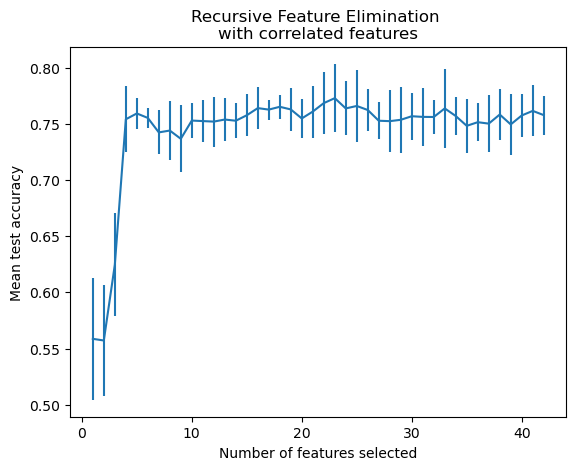

In [96]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

In [97]:
atributos_seleccionados = [X.columns[i] for i in range(len(X.columns)) if rfecv.support_[i]]
Grupo2= atributos_seleccionados[:23]
Grupo2

['historial_cred_all',
 'historial_cred_no_credits',
 'proposito_car_new_used',
 'proposito_furn_equipment',
 'proposito_others',
 'estado_per_sex_non_single_male',
 'estado_per_sex_married_widowed',
 'propiedad_building',
 'propiedad_car_other',
 'propiedad_unknown_no_property',
 'otros_planes_none',
 'vivienda_rent',
 'trabajo_skilled_employee',
 'telefono_yes',
 'duracion',
 'monto',
 'edad',
 'estado',
 'ahorros',
 'duracion_empleo',
 'tasa_cuota',
 'residencia_actual',
 'numero_creditos']

## Feature selection using SelectFromModel

In [98]:
selector = SelectFromModel(estimator=LogisticRegression()).fit(X, y)

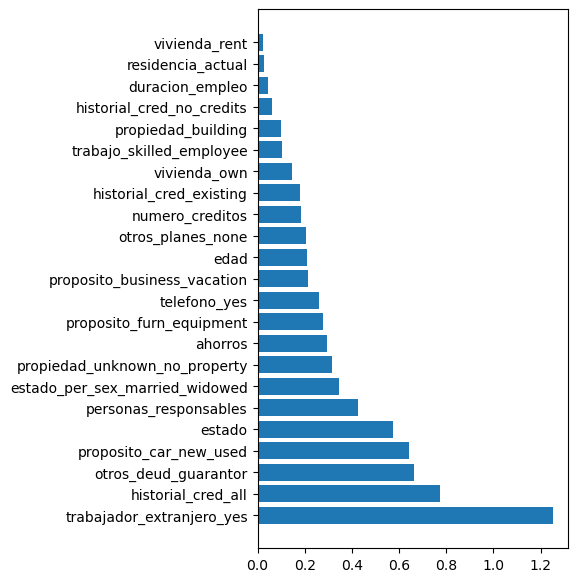

In [99]:
# Obtener los índices que ordenan las importancias en orden descendente
importance = selector.estimator_.coef_[0]
sorted_indices = np.argsort(importance)[::-1]

# Obtener las variables ordenadas por importancia
sorted_features = X.columns[sorted_indices]
sorted_importance = importance[sorted_indices]

mask = sorted_importance > 0
sorted_features_positive = sorted_features[mask]
sorted_importance_positive = sorted_importance[mask]

plt.figure(figsize=(4, 7))
# Graficar las variables ordenadas por importancia horizontalmente
plt.barh(sorted_features_positive, sorted_importance_positive)
#plt.xticks(rotation=90)
plt.show()

In [100]:
Grupo3 = sorted_features_positive[sorted_importance_positive > 0][:23]
Grupo3

Index(['trabajador_extranjero_yes', 'historial_cred_all',
       'otros_deud_guarantor', 'proposito_car_new_used', 'estado',
       'personas_responsables', 'estado_per_sex_married_widowed',
       'propiedad_unknown_no_property', 'ahorros', 'proposito_furn_equipment',
       'telefono_yes', 'proposito_business_vacation', 'edad',
       'otros_planes_none', 'numero_creditos', 'historial_cred_existing',
       'vivienda_own', 'trabajo_skilled_employee', 'propiedad_building',
       'historial_cred_no_credits', 'duracion_empleo', 'residencia_actual',
       'vivienda_rent'],
      dtype='object')

## SFS (Sequential Feature Selection) forward

n_features_to_select: Se utiliza un numero al rededor de los sugeridos por los metodos anteriormente en este caso 22

In [101]:
logistic_model = LogisticRegression()
scv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

sfs_forward = SequentialFeatureSelector(
    logistic_model, n_features_to_select=22, direction="forward", cv=scv,scoring='roc_auc'
).fit(X, y)

In [102]:
atributos_seleccionados = [X.columns[i] for i in range(len(X.columns)) if sfs_forward.get_support()[i]]
Grupo4 = atributos_seleccionados
Grupo4

['historial_cred_all',
 'historial_cred_existing',
 'historial_cred_no_credits',
 'proposito_business_vacation',
 'proposito_car_new_used',
 'proposito_furn_equipment',
 'estado_per_sex_divorced_separated',
 'estado_per_sex_married_widowed',
 'otros_deud_co_applicant',
 'otros_deud_guarantor',
 'otros_deud_none',
 'propiedad_building',
 'propiedad_car_other',
 'otros_planes_stores',
 'telefono_yes',
 'trabajador_extranjero_yes',
 'duracion',
 'monto',
 'estado',
 'ahorros',
 'numero_creditos',
 'personas_responsables']

## SFS (Sequential Feature Selection) backward

In [103]:

sfs_backward = SequentialFeatureSelector(
    logistic_model, n_features_to_select=22, direction="backward", cv=scv,scoring='roc_auc'
).fit(X, y)


In [104]:
atributos_seleccionados = [X.columns[i] for i in range(len(X.columns)) if sfs_backward.get_support()[i]]
Grupo5 = atributos_seleccionados
Grupo5

['historial_cred_all',
 'historial_cred_existing',
 'historial_cred_no_credits',
 'proposito_business_vacation',
 'proposito_car_new_used',
 'proposito_furn_equipment',
 'estado_per_sex_married_widowed',
 'otros_deud_guarantor',
 'propiedad_building',
 'propiedad_unknown_no_property',
 'otros_planes_bank',
 'otros_planes_stores',
 'trabajo_skilled_employee',
 'telefono_yes',
 'trabajador_extranjero_yes',
 'duracion',
 'edad',
 'estado',
 'ahorros',
 'tasa_cuota',
 'numero_creditos',
 'personas_responsables']

## statsmodels

In [105]:
y_num = y["riesgo_crediticio"].map({"good": 1, "bad": 0})

In [106]:
import statsmodels.api as sm
logit_model=sm.Logit(y_num,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.516528
         Iterations: 35
                                                Results: Logit
Model:                              Logit                           Method:                         MLE       
Dependent Variable:                 riesgo_crediticio               Pseudo R-squared:               0.253     
Date:                               2023-09-07 10:08                AIC:                            658.8421  
No. Observations:                   570                             BIC:                            810.9394  
Df Model:                           34                              Log-Likelihood:                 -294.42   
Df Residuals:                       535                             LL-Null:                        -394.30   
Converged:                          0.0000                          LLR p-value:                    2.3306e-25
No. Iterations:                     35.0000                         Scale:                    

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [107]:
coefficients = result.params
abs_coefficients = abs(coefficients)
sorted_coeffs = abs_coefficients.sort_values(ascending=False)
Grupo6 = sorted_coeffs.index[:22]
Grupo6

Index(['trabajador_extranjero_yes', 'otros_deud_co_applicant',
       'proposito_others', 'historial_cred_critical',
       'proposito_domestic_app_repairs', 'historial_cred_delay',
       'historial_cred_all', 'propiedad_real_estate', 'estado',
       'vivienda_free', 'estado_per_sex_divorced_separated',
       'otros_planes_bank', 'proposito_car_new_used', 'duracion',
       'personas_responsables', 'otros_deud_guarantor', 'otros_deud_none',
       'trabajo_manager', 'trabajo_unski_resident_unemploy_non_resident',
       'vivienda_rent', 'otros_planes_stores', 'estado_per_sex_single'],
      dtype='object')

_____________________________________________________

# Modelado

Es importante mencionar nuevamente que el enfoque es aumentar las predicciones del bad. En otras palabras aumentar la especificidad

### Librerias

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, classification_report, f1_score,RocCurveDisplay

from sklearn.model_selection import KFold, ShuffleSplit, LeaveOneOut
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.metrics import precision_score, recall_score, f1_score,roc_auc_score
from sklearn.metrics import roc_curve, auc

import winsound

seed = 7

### Funciones

In [109]:
def boxplots_algorithms(results, names):
    
    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.ylabel('AUC')
    plt.title('Comparacion AUC usando 5 Folds')
    plt.show()

In [110]:
#a diferencia de classification_report, esta funcion permite realizar comparaciones entre modelos
def tabla_metricas(y, y_predict,nombre):
    
          
    # Calcular las métricas 
    precision_good = round(precision_score(y, y_predict, pos_label='good'),2)
    precision_bad = round(precision_score(y, y_predict, pos_label='bad'),2)
    especificidad = round(recall_score(y, y_predict, pos_label='bad'),2)
    sensibilidad =  round(recall_score(y, y_predict, pos_label='good'),2)
    Tasa_aciertos = round(accuracy_score(y, y_predict),2) #accuracy
    Tasa_fallos = round(1 - Tasa_aciertos,2)
    f1_good = round(f1_score(y, y_predict, pos_label='good'),2)
    f1_bad = round(f1_score(y, y_predict, pos_label='bad'),2)
    
    
    # Crear un DataFrame con las métricas
    metricas = {
        'Tasa_aciertos' : [Tasa_aciertos],
        'Tasa_fallos' : [Tasa_fallos],
        'especificidad' : [especificidad],
        'sensibilidad' : [sensibilidad],
        'f1_good' : [f1_good],
        'f1_bad' : [f1_bad],
        'precision_good' : [precision_good],
        'precision_bad' : [precision_bad  ] 
    }

    df_metricas = pd.DataFrame(metricas)
    df_metricas = df_metricas.rename(index={0: nombre})
    df_metricas

    return df_metricas

In [111]:
#Permite graficar la curva ROC del resultado de la validacion cruzada
def curva_ROC_cv(predicts,y_true):
    for algoritmo, y_pred in predicts:        
        y_true_num = y_true["riesgo_crediticio"].map({"good": 1, "bad": 0})
        y_pred_num = np.where(y_pred == 'bad', 0, 1)
        fpr, tpr, _ = roc_curve(y_true_num, y_pred_num)
        auc_val = auc(fpr, tpr)
        plt.plot(fpr, tpr, label= f'{algoritmo} (AUC = {auc_val:.2f})')      
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curvas ROC de la validacion cruzada')
    plt.legend(loc='lower right')

    plt.show()

### Configuraciones generales

In [112]:
skfold =  StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

_____________________________________________

## Regresion logística

In [113]:
modelo_LR = LogisticRegression(random_state=seed)
modelo_LR.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [114]:
param_grid ={"C":[0.01,0.05,0.1,0.2,0.5,1,2,5,10], "penalty":["l1","l2"]}# l1 lasso l2 ridge

### Tuneado todas variables

In [115]:
grid_model_LR_Todas = None 

grid_search = GridSearchCV(estimator=modelo_LR, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_LR_Todas = grid_search.fit(X, y)

print(grid_model_LR_Todas.best_score_)
print(grid_model_LR_Todas.best_estimator_)
print(grid_model_LR_Todas.best_params_)


0.7716666666666667
LogisticRegression(C=0.05, random_state=7)
{'C': 0.05, 'penalty': 'l2'}


In [116]:
#Mejores parametros de logistica con todas las variables
modelo_LR = grid_model_LR_Todas.best_estimator_

### Importancia de variables

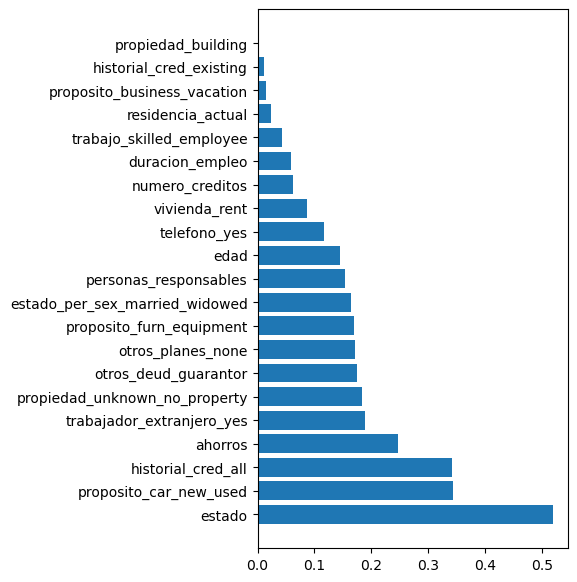

In [117]:
# Obtener los índices que ordenan las importancias en orden descendente
importance = modelo_LR.coef_[0]
sorted_indices = np.argsort(importance)[::-1]

# Obtener las variables ordenadas por importancia
sorted_features = X.columns[sorted_indices]
sorted_importance = importance[sorted_indices]

mask = sorted_importance > 0
sorted_features_positive = sorted_features[mask]
sorted_importance_positive = sorted_importance[mask]

plt.figure(figsize=(4, 7))
# Graficar las variables ordenadas por importancia horizontalmente
plt.barh(sorted_features_positive, sorted_importance_positive)
#plt.xticks(rotation=90)
plt.show()

In [118]:
Grupo_LR = sorted_features_positive[:20]
Grupo_LR

Index(['estado', 'proposito_car_new_used', 'historial_cred_all', 'ahorros',
       'trabajador_extranjero_yes', 'propiedad_unknown_no_property',
       'otros_deud_guarantor', 'otros_planes_none', 'proposito_furn_equipment',
       'estado_per_sex_married_widowed', 'personas_responsables', 'edad',
       'telefono_yes', 'vivienda_rent', 'numero_creditos', 'duracion_empleo',
       'trabajo_skilled_employee', 'residencia_actual',
       'proposito_business_vacation', 'historial_cred_existing'],
      dtype='object')

### Comparacion grupos de variables por medio de regresion logistica

Se usa como metrica **roc_auc** en lugar de accuracy. Principalmente porque las clases no estan completamente balanceadas

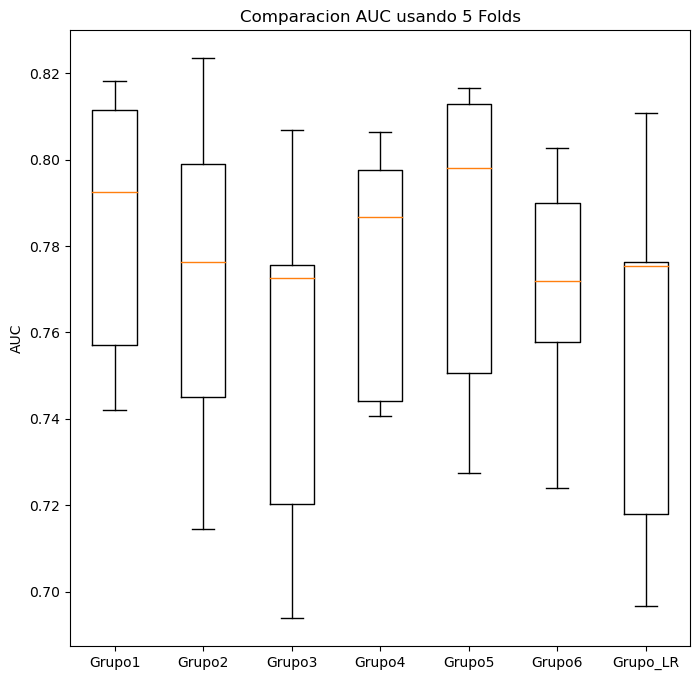

In [119]:
lista_GrupoVariables = {
                        "Grupo1":Grupo1,
                        "Grupo2":Grupo2,
                        "Grupo3":Grupo3,
                        "Grupo4":Grupo4,
                        "Grupo5":Grupo5,
                        "Grupo6":Grupo6,
                        "Grupo_LR":Grupo_LR}


results = []
names = []

df_metricasFinal = pd.DataFrame()

for nombre, grupo in lista_GrupoVariables.items():   
    cv_results = cross_val_score(modelo_LR, X[grupo], y, cv=skfold, scoring='roc_auc')  
    y_pred = cross_val_predict(modelo_LR, X[grupo], y, cv=skfold)  
    df_metricas = tabla_metricas(y,y_pred,nombre)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    results.append(cv_results)
    names.append(nombre)

boxplots_algorithms(results, names)

Se observa que en la mayoría hay una dispersión aproximada de 5 puntos porcentuales. El 50% de los datos de Grupo3 y Grupo_LR están por debajo de 78% en AUC por lo que se descartan. Grupo2, Grupo4 y Grupo6 tienen un 50% de los datos ligeramente por debajo del 80% en AUC. Grupo5 tiene una dispersión ligeramente mayor que Grupo1, pero el bigote inferior indica que hay AUCs por debajo de 74% a diferencia del Grupo1.

### Comparacion de metricas

In [120]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
Grupo1             0.72         0.28           0.70          0.73     0.73   
Grupo2             0.71         0.29           0.69          0.73     0.73   
Grupo3             0.69         0.31           0.70          0.69     0.70   
Grupo4             0.71         0.29           0.70          0.72     0.72   
Grupo5             0.71         0.29           0.69          0.72     0.72   
Grupo6             0.69         0.31           0.68          0.69     0.70   
Grupo_LR           0.70         0.30           0.70          0.69     0.71   

          f1_bad  precision_good  precision_bad  
Grupo1      0.70            0.73           0.70  
Grupo2      0.69            0.72           0.70  
Grupo3      0.68            0.72           0.67  
Grupo4      0.70            0.73           0.69  
Grupo5      0.69            0.72           0.69  
Grupo6      0.67            0.71           0.67  
Grupo_LR    0.69            0.72           0.67

Especificidad =  proporcion de aciertos del bad

Sensibilidad =   proporcion de aciertos del good

Al evaluar las demás métricas se observa que el Grupo1 es el que mejor especificidad, F1 y precisión tiene por lo que será el grupo de variables con el cual trabajar en adelante.

## Visualizacion de metricas

Esta parte es opcional, el la representacion visual del grafico anteior

### Grafico de F1

In [121]:
f1s = df_metricasFinal[["f1_good","f1_bad"]]
f1s = f1s.reset_index() 
f1s = f1s.melt(id_vars='index', var_name='Metrica', value_name='Valor')
f1s = f1s.rename(columns={'index': 'Grupo'})

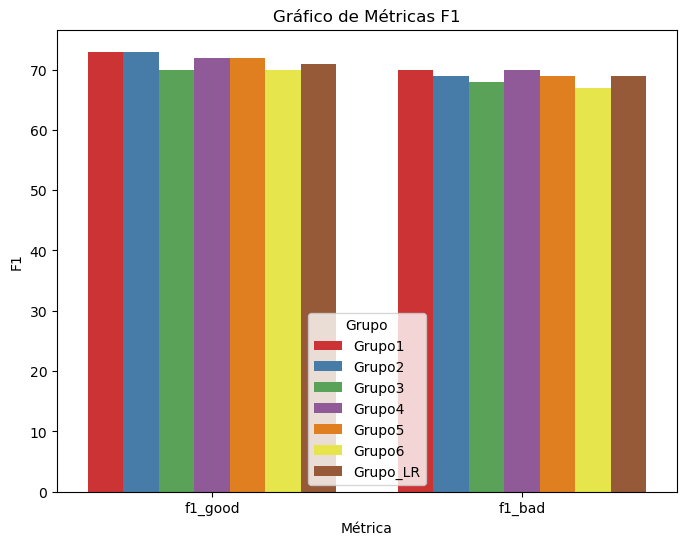

In [122]:
plt.figure(figsize=(8, 6))
sns.barplot(x=f1s['Metrica'], y=f1s['Valor'] * 100, hue=f1s['Grupo'], palette='Set1')

# Agregar etiquetas y título al gráfico
plt.xlabel('Métrica')
plt.ylabel('F1')
plt.title('Gráfico de Métricas F1')

# Mostrar el gráfico
plt.show()

### Grafico de recalls

In [123]:
recalls = df_metricasFinal[["especificidad","sensibilidad"]]
recalls = recalls.reset_index() 
recalls = recalls.melt(id_vars='index', var_name='Metrica', value_name='Valor')
recalls = recalls.rename(columns={'index': 'Grupo'})

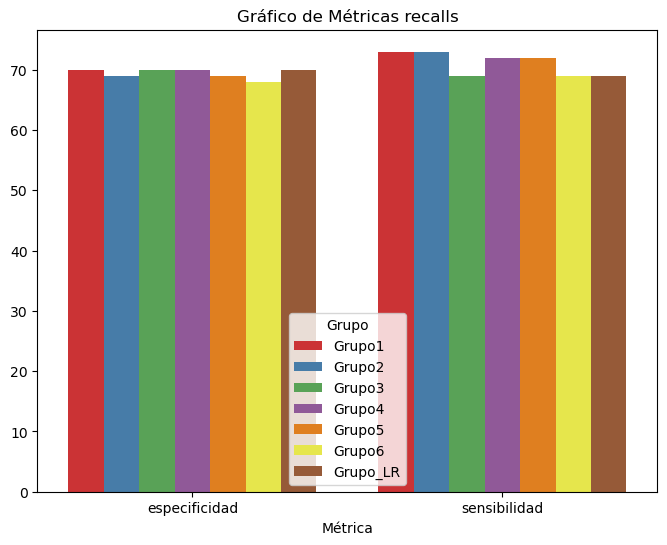

In [124]:
plt.figure(figsize=(8, 6))
sns.barplot(x=recalls['Metrica'], y=recalls['Valor'] * 100, hue=recalls['Grupo'], palette='Set1')

# Agregar etiquetas y título al gráfico
plt.xlabel('Métrica')
plt.ylabel('')
plt.title('Gráfico de Métricas recalls')

# Mostrar el gráfico
plt.show()

### Grafico de Tasas

In [125]:
Tasas = df_metricasFinal[["Tasa_aciertos","Tasa_fallos"]]
Tasas = Tasas.reset_index() 
Tasas = Tasas.melt(id_vars='index', var_name='Metrica', value_name='Valor')
Tasas = Tasas.rename(columns={'index': 'Grupo'})

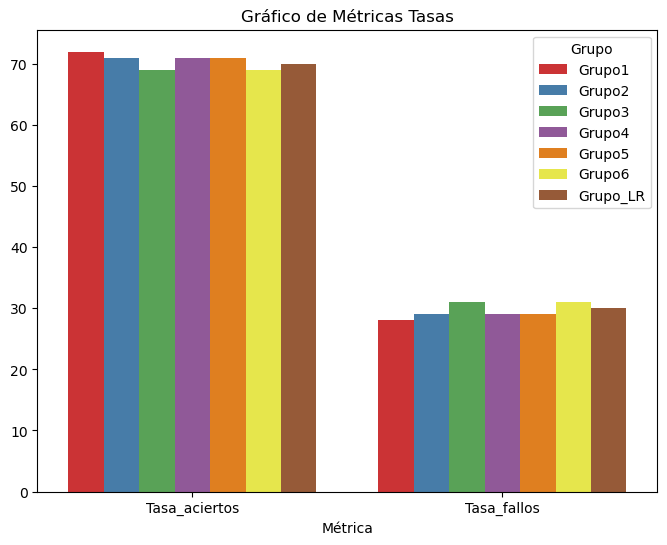

In [126]:
plt.figure(figsize=(8, 6))
sns.barplot(x=Tasas['Metrica'], y=Tasas['Valor'] * 100, hue=Tasas['Grupo'], palette='Set1')

# Agregar etiquetas y título al gráfico
plt.xlabel('Métrica')
plt.ylabel('')
plt.title('Gráfico de Métricas Tasas')

# Mostrar el gráfico
plt.show()

Analizando los resultados anteriores se elije el **Grupo1** como el mejor grupo de variables

### Mejor grupo de variables

In [127]:
var_seleccionadas = Grupo1
NumeroOptimoVariables = len(Grupo1)

### Tunear RegresionLogistica con el mejor grupo de variables

In [128]:
grid_model_LR_Selec = None 

grid_search = GridSearchCV(estimator=modelo_LR, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_LR_Selec = grid_search.fit(X[var_seleccionadas], y)

print(grid_model_LR_Selec.best_score_)
print(grid_model_LR_Selec.best_estimator_)
print(grid_model_LR_Selec.best_params_)

0.7873456790123458
LogisticRegression(C=0.2, random_state=7)
{'C': 0.2, 'penalty': 'l2'}


### Comparacion de logisticas

In [129]:
models = []
results = []
predicts = []
names = []

models.append(('LR_A', grid_model_LR_Todas.best_estimator_))
models.append(('LR_B', grid_model_LR_Selec.best_estimator_))


df_metricasFinal = pd.DataFrame()

for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ])        
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold)  
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    predicts.append((name,y_pred))
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

In [130]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
LR_A           0.72         0.28            0.7          0.73     0.73   
LR_B           0.73         0.27            0.7          0.75     0.74   

      f1_bad  precision_good  precision_bad  
LR_A    0.70            0.73           0.70  
LR_B    0.71            0.74           0.71

### Mejor Regresion Logistica

In [131]:
mejor_modelo_LR = grid_model_LR_Selec.best_estimator_

### Importancia de variables 

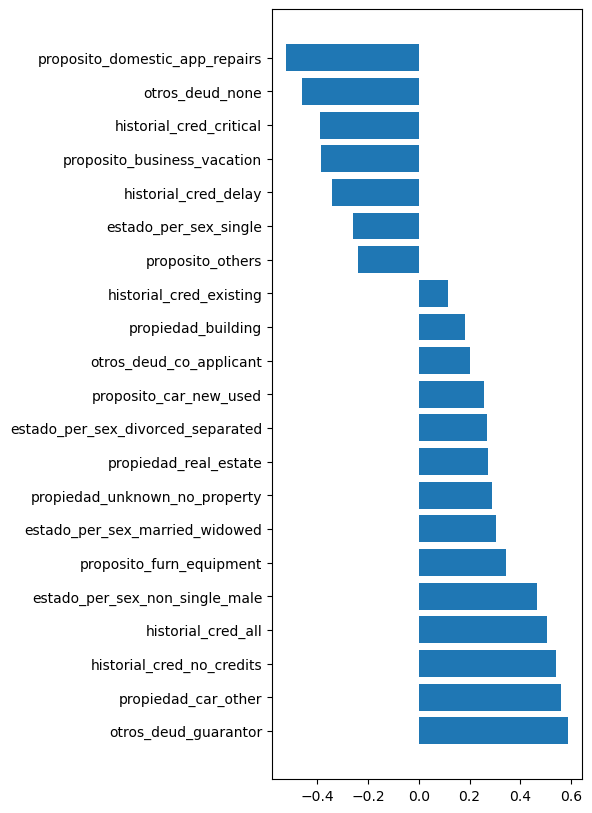

In [132]:
# Obtener los índices que ordenan las importancias en orden descendente
importance = mejor_modelo_LR.coef_[0]
sorted_indices = np.argsort(importance)[::-1]

# Obtener las variables ordenadas por importancia
sorted_features = X.columns[sorted_indices]
sorted_importance = importance[sorted_indices]

plt.figure(figsize=(4, 10))
# Graficar las variables ordenadas por importancia horizontalmente
plt.barh(sorted_features, sorted_importance)
plt.show()

### Curva ROC

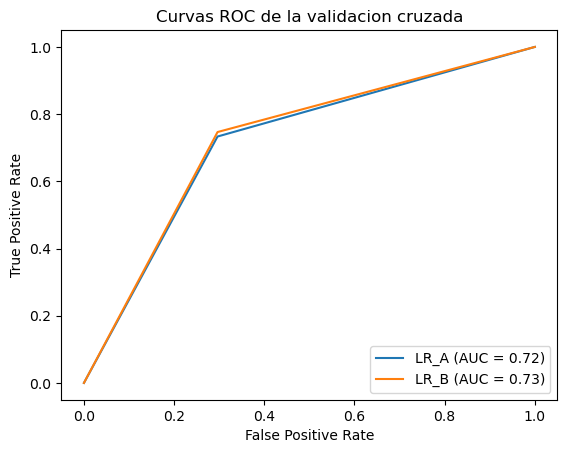

In [133]:
curva_ROC_cv(predicts,y)

Cada algoritmo se entrenó y tuneó con todas las variables y con las variables seleccionadas, de esta forma se pudo comparar cada algoritmo con al menos dos versiones entrenadas de forma diferente del mismo algoritmo. La comparación se realizó basándose en validación cruzada estratificada con cinco folds, siempre, tanto para comparar las versiones del mismo algoritmo como para comparar entre diferentes algoritmos. Para la versión con todas las variables se obtuvieron las variables mas importantes, así como para la mejor versión del algoritmo tuneado para comparar y en un futuro considerar tomar dichas variables en cuenta. 

____________________________________________________________

## Bosques Aleatoreos

In [134]:
modelo_RFC = RandomForestClassifier(random_state=seed,n_jobs=2)
modelo_RFC.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [135]:
param_grid = {
    'n_estimators': [100,300,500,700],
    'max_features': [3,4,5,6,7,8,9,12,14,16,17,19,"log2","sqrt"],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [7,10]
}



### Tuneado con todas las variables

In [136]:
grid_model_RFC_A = None
grid_search = GridSearchCV(estimator=modelo_RFC, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_RFC_A = grid_search.fit(X, y)

# Reproduce un sonido de "beep" al terminar el tuneado.
winsound.Beep(1000, 1000)

print(grid_model_RFC_A.best_score_)
print(grid_model_RFC_A.best_estimator_)
print(grid_model_RFC_A.best_params_)

0.7771604938271606
RandomForestClassifier(criterion='entropy', max_depth=8, max_features=7,
                       min_samples_split=7, n_jobs=2, random_state=7)
{'criterion': 'entropy', 'max_depth': 8, 'max_features': 7, 'min_samples_split': 7, 'n_estimators': 100}


### Importancia de variables

In [137]:
# Obtener los índices que ordenan las importancias en orden descendente
importance = grid_model_RFC_A.best_estimator_.feature_importances_
sorted_indices = np.argsort(importance)[::-1]

# Obtener las variables ordenadas por importancia
sorted_features = X.columns[sorted_indices]
sorted_importance = importance[sorted_indices]

plt.figure(figsize=(4, 10))
# Graficar las variables ordenadas por importancia horizontalmente
plt.barh(sorted_features, sorted_importance)
plt.show()

#### ESTUDIO DE EARLY STOPPING

In [138]:
clf = grid_model_RFC_A.best_estimator_ 
clf.oob_score=True

error_rate = []


min_estimators = 100
max_estimators = 3000

for i in range(min_estimators, max_estimators + 1,10):
    clf.set_params(n_estimators=i)
    clf.fit(X, y)

    oob_error = 1 - clf.oob_score_
    error_rate.append((i, oob_error))

# Desempaqueta los valores de error_rate en xs y ys
xs, ys = zip(*error_rate)

# Plotea el error OOB a medida que avanzan las iteraciones
plt.plot(xs, ys, marker='o')
plt.xlabel('Número de estimadores')
plt.ylabel('Error OOB')
plt.title('Error OOB vs. Número de estimadores')
plt.show()

### Tuneado con variables seleccionadas

In [139]:
grid_model_RFC_B = None
grid_search = GridSearchCV(estimator=modelo_RFC, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_RFC_B = grid_search.fit(X[var_seleccionadas], y)

# Reproduce un sonido de "beep" al terminar el tuneado.
winsound.Beep(1000, 1000)


print(grid_model_RFC_B.best_score_)
print(grid_model_RFC_B.best_estimator_)
print(grid_model_RFC_B.best_params_)

0.7784567901234568
RandomForestClassifier(criterion='entropy', max_depth=7, max_features=3,
                       min_samples_split=10, n_estimators=700, n_jobs=2,
                       random_state=7)
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 3, 'min_samples_split': 10, 'n_estimators': 700}


#### ESTUDIO DE EARLY STOPPING

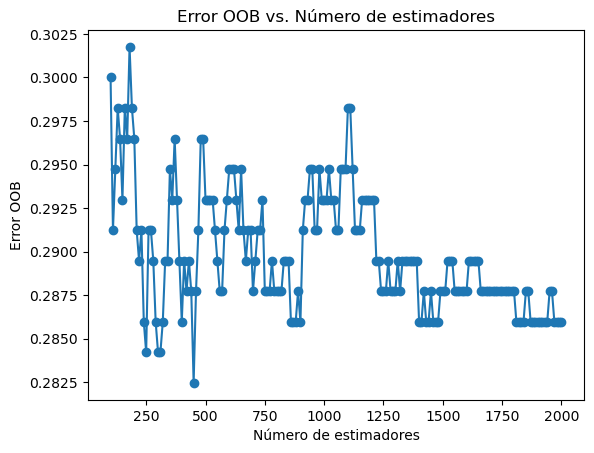

In [140]:
clf = grid_model_RFC_B.best_estimator_
clf.oob_score=True

error_rate = []

min_estimators = 100
max_estimators = 2000

for i in range(min_estimators, max_estimators + 1,10):
    clf.set_params(n_estimators=i)
    clf.fit(X[var_seleccionadas], y)

    oob_error = 1 - clf.oob_score_
    error_rate.append((i, oob_error))

# Desempaqueta los valores de error_rate en xs y ys
xs, ys = zip(*error_rate)

# Plotea el error OOB a medida que avanzan las iteraciones
plt.plot(xs, ys, marker='o')
plt.xlabel('Número de estimadores')
plt.ylabel('Error OOB')
plt.title('Error OOB vs. Número de estimadores')
plt.show()

### Usando un n_estimators segun los graficos
basado en los datos de los dos estudios de EARLY STOPPING anteriores

In [141]:
param_grid = {
    'n_estimators': [100],
    'max_features': [3,4,5,6,7,8,9,12,14,16,17,19,"log2","sqrt"],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [7,10]
}


grid_model_RFC_C = None
grid_search = GridSearchCV(estimator=grid_model_RFC_A.best_estimator_, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_RFC_C = grid_search.fit(X[var_seleccionadas], y)

# Reproduce un sonido de "beep" al terminar el tuneado.
winsound.Beep(1000, 1000)


print(grid_model_RFC_C.best_score_)
print(grid_model_RFC_C.best_estimator_)
print(grid_model_RFC_C.best_params_)

0.7759876543209877
RandomForestClassifier(criterion='entropy', max_depth=7, max_features=5,
                       min_samples_split=10, n_jobs=2, oob_score=True,
                       random_state=7)
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [142]:
param_grid = {
    'n_estimators': [700],
    'max_features': [3,4,5,6,7,8,9,12,14,16,17,19,"log2","sqrt"],
    'max_depth': [4, 5, 6, 7, 8],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [7,10]
}


grid_model_RFC_D = None
grid_search = GridSearchCV(estimator=grid_model_RFC_B.best_estimator_, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_RFC_D = grid_search.fit(X[var_seleccionadas], y)

# Reproduce un sonido de "beep" al terminar el tuneado.
winsound.Beep(1000, 1000)


print(grid_model_RFC_D.best_score_)
print(grid_model_RFC_D.best_estimator_)
print(grid_model_RFC_D.best_params_)

0.7784567901234568
RandomForestClassifier(criterion='entropy', max_depth=7, max_features=3,
                       min_samples_split=10, n_estimators=700, n_jobs=2,
                       oob_score=True, random_state=7)
{'criterion': 'entropy', 'max_depth': 7, 'max_features': 3, 'min_samples_split': 10, 'n_estimators': 700}


### Comparacion Random Forest

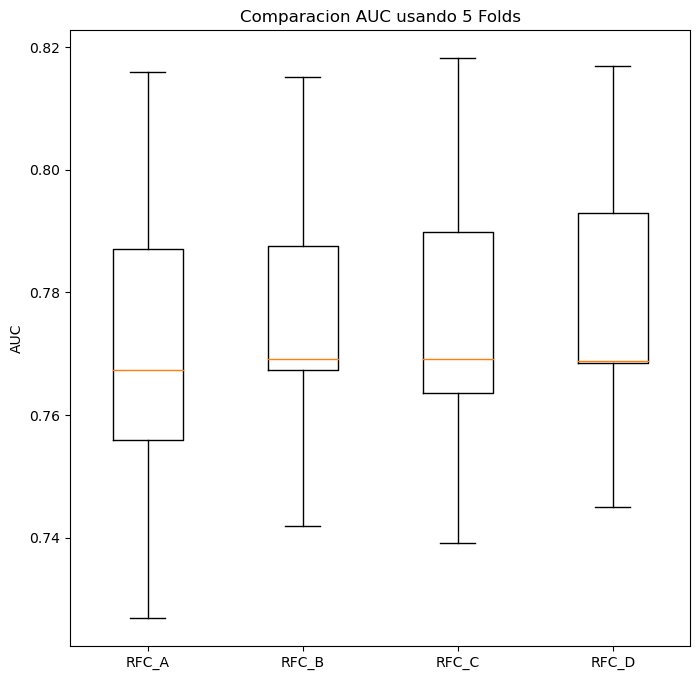

In [143]:
models = []
results = []
names = []

models.append(('RFC_A', grid_model_RFC_A.best_estimator_))
models.append(('RFC_B', grid_model_RFC_B.best_estimator_))
models.append(('RFC_C', grid_model_RFC_C.best_estimator_ ))
models.append(('RFC_D', grid_model_RFC_D.best_estimator_ ))

df_metricasFinal = pd.DataFrame()

for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ])        
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold)  
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

In [144]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
RFC_A           0.71         0.29           0.70          0.71     0.72   
RFC_B           0.72         0.28           0.70          0.74     0.74   
RFC_C           0.71         0.29           0.69          0.73     0.73   
RFC_D           0.72         0.28           0.71          0.73     0.73   

       f1_bad  precision_good  precision_bad  
RFC_A    0.69            0.72           0.69  
RFC_B    0.71            0.73           0.71  
RFC_C    0.70            0.73           0.70  
RFC_D    0.71            0.74           0.70

### Mejor Random Forest

In [145]:
mejor_modelo_RFC = grid_model_RFC_D.best_estimator_

### Importancia de variables

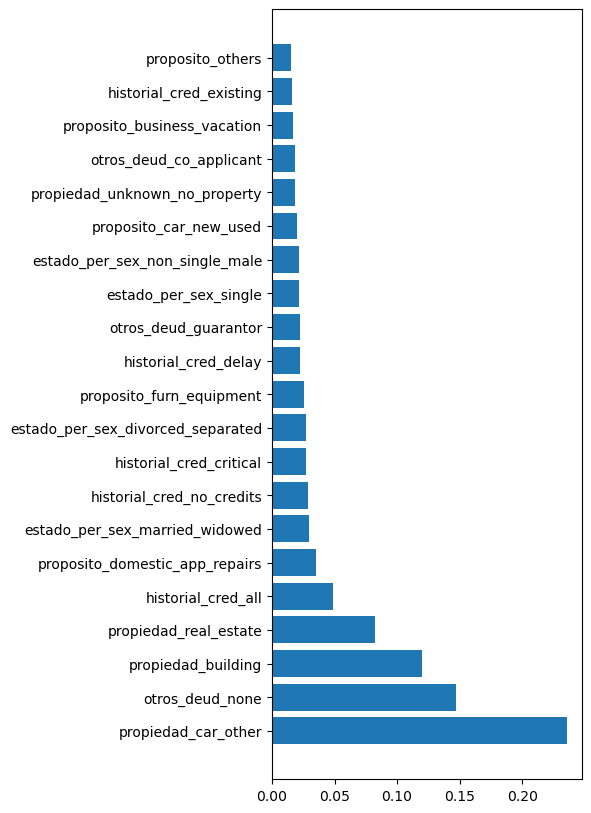

In [146]:
# Obtener los índices que ordenan las importancias en orden descendente
importance = mejor_modelo_RFC.feature_importances_
sorted_indices = np.argsort(importance)[::-1]

# Obtener las variables ordenadas por importancia
sorted_features = X.columns[sorted_indices]
sorted_importance = importance[sorted_indices]

plt.figure(figsize=(4, 10))
# Graficar las variables ordenadas por importancia horizontalmente
plt.barh(sorted_features, sorted_importance)
plt.show()

### Comparacion General de modelos

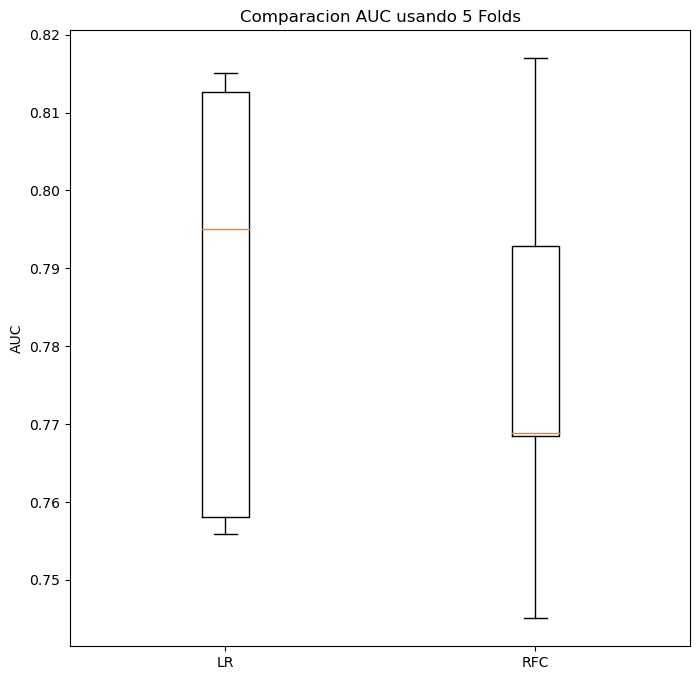

In [147]:
models = []
predicts = []
results = []
names = []

models.append(('LR', mejor_modelo_LR))
models.append(('RFC', mejor_modelo_RFC))


df_metricasFinal = pd.DataFrame()

for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ])        
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold)  
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    predicts.append((name,y_pred))
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

### Comparación de metricas General

In [148]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  f1_bad  \
LR            0.73         0.27           0.70          0.75     0.74    0.71   
RFC           0.72         0.28           0.71          0.73     0.73    0.71   

     precision_good  precision_bad  
LR             0.74           0.71  
RFC            0.74           0.70

### Curva ROC

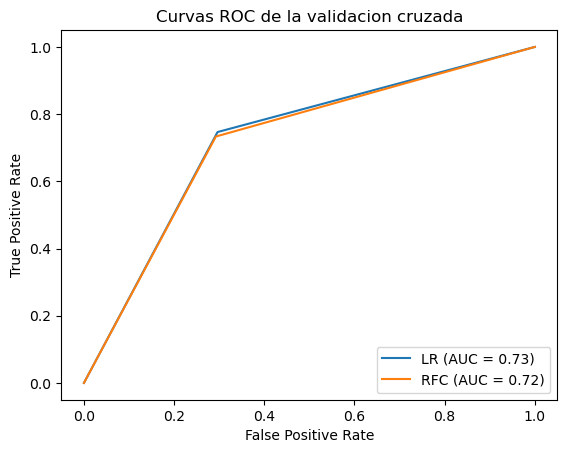

In [149]:
curva_ROC_cv(predicts,y)

_____________________________________________

## KNN

In [150]:
modelo_KNN = KNeighborsClassifier(n_jobs=2)
modelo_KNN.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [151]:
param_grid ={"weights": ["uniform", "distance"],
             "n_neighbors": range(2,100),
             "metric": ['euclidean', 'manhattan', 'chebyshev','minkowski']}


### Tuneo todas la variables

In [152]:
grid_model_KNN_Todas = None 

grid_search = GridSearchCV(estimator=modelo_KNN, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_KNN_Todas = grid_search.fit(X, y)

print(grid_model_KNN_Todas.best_score_)
print(grid_model_KNN_Todas.best_estimator_)
print(grid_model_KNN_Todas.best_params_)

0.7674691358024692
KNeighborsClassifier(metric='euclidean', n_jobs=2, n_neighbors=42,
                     weights='distance')
{'metric': 'euclidean', 'n_neighbors': 42, 'weights': 'distance'}


### Tuneo con variables seleccionadas

In [153]:
grid_model_KNN_Selec = None 

grid_search = GridSearchCV(estimator=modelo_KNN, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_KNN_Selec = grid_search.fit(X[var_seleccionadas], y)

print(grid_model_KNN_Selec.best_score_)
print(grid_model_KNN_Selec.best_estimator_)
print(grid_model_KNN_Selec.best_params_)

0.7806172839506174
KNeighborsClassifier(metric='manhattan', n_jobs=2, n_neighbors=99,
                     weights='distance')
{'metric': 'manhattan', 'n_neighbors': 99, 'weights': 'distance'}


### Comparacion KNN

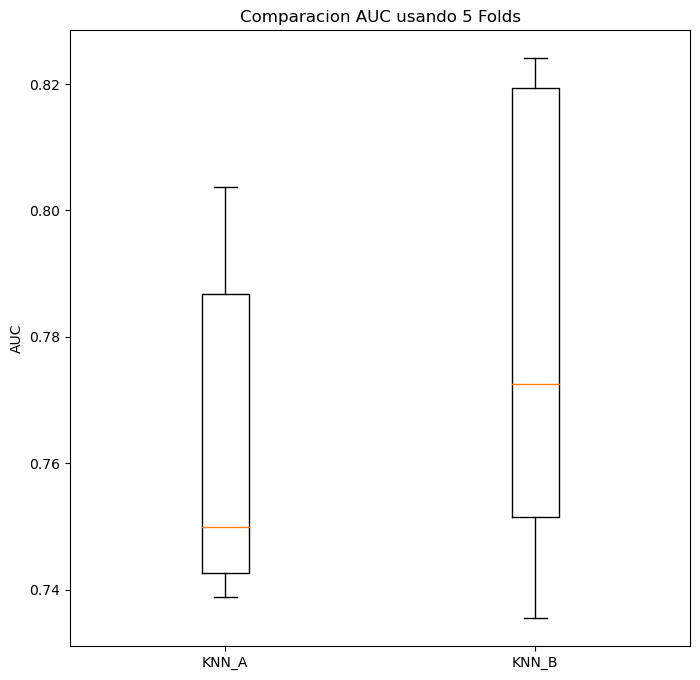

In [154]:
models = []
results = []
names = []

models.append(('KNN_A', grid_model_KNN_Todas.best_estimator_))
models.append(('KNN_B', grid_model_KNN_Selec.best_estimator_))

df_metricasFinal = pd.DataFrame()

for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ])        
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold)  
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

In [155]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
KNN_A           0.69         0.31           0.72          0.67     0.70   
KNN_B           0.72         0.28           0.75          0.69     0.72   

       f1_bad  precision_good  precision_bad  
KNN_A    0.69            0.73           0.66  
KNN_B    0.71            0.75           0.68

### Mejor KNN

In [156]:
mejor_modelo_KNN = grid_model_KNN_Selec.best_estimator_

### Comparacion General de modelos

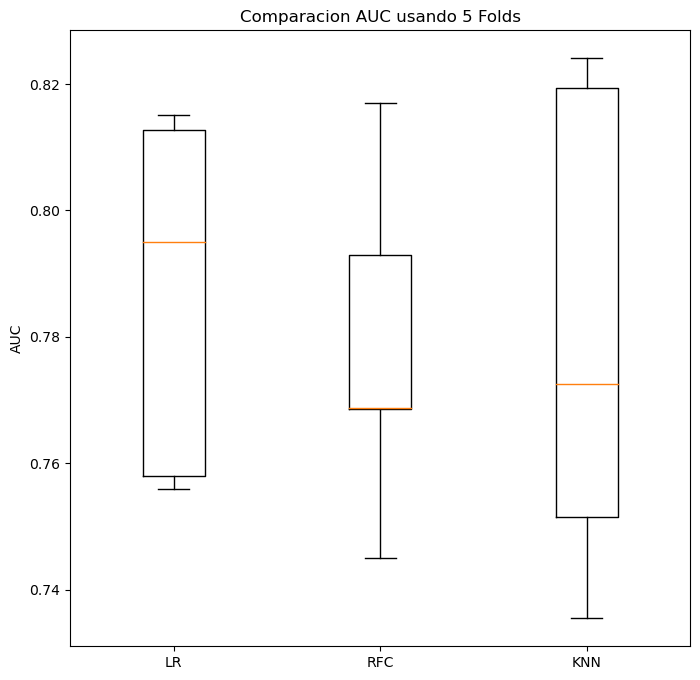

In [157]:
models = []
results = []
predicts = []
names = []

df_metricasFinal = pd.DataFrame()

models.append(('LR', mejor_modelo_LR))
models.append(('RFC', mejor_modelo_RFC))
models.append(('KNN', mejor_modelo_KNN))


for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ])   
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold)  
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    predicts.append((name,y_pred))
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

### Comparacion de metricas

In [158]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  f1_bad  \
LR            0.73         0.27           0.70          0.75     0.74    0.71   
RFC           0.72         0.28           0.71          0.73     0.73    0.71   
KNN           0.72         0.28           0.75          0.69     0.72    0.71   

     precision_good  precision_bad  
LR             0.74           0.71  
RFC            0.74           0.70  
KNN            0.75           0.68

### Curva ROC

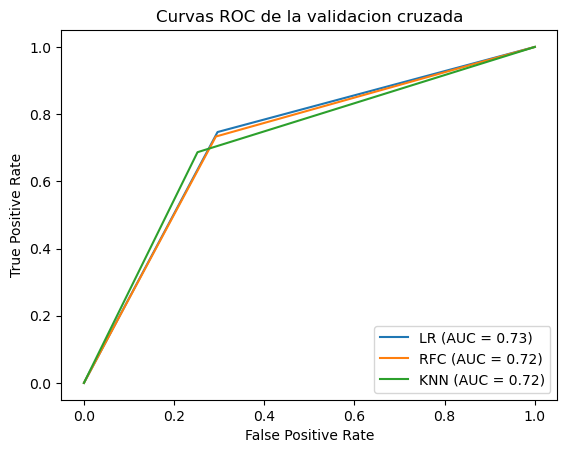

In [159]:
curva_ROC_cv(predicts,y)

_______________________________________________

## DecisionTreeClassifier

In [160]:
modelo_DTC = DecisionTreeClassifier(random_state=seed)
modelo_DTC.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [161]:
param_grid =  { 'max_depth': [4, 5, 6, 7, 8],
                'max_features': [3,4,5,6,7,8,9,12,14,16,17,19,22,25,30],
                'criterion': ['gini', 'entropy'],
                'min_samples_split': [4,7,10,12,15]
             }
                

### Tuneo Todas las variables

In [162]:
grid_model_DTC_Todas = None
grid_search = GridSearchCV(estimator=modelo_DTC, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_DTC_Todas = grid_search.fit(X, y)

print(grid_model_DTC_Todas.best_score_)
print(grid_model_DTC_Todas.best_estimator_)
print(grid_model_DTC_Todas.best_params_)

0.7192592592592593
DecisionTreeClassifier(max_depth=5, max_features=14, min_samples_split=4,
                       random_state=7)
{'criterion': 'gini', 'max_depth': 5, 'max_features': 14, 'min_samples_split': 4}


### Importancia de variables

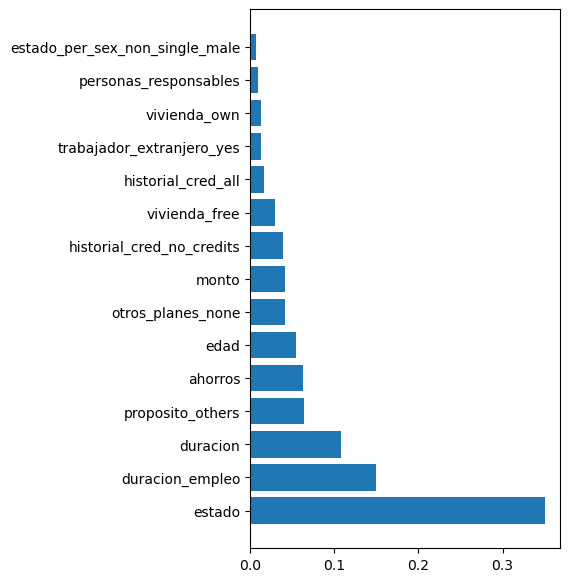

In [163]:
# Obtener los índices que ordenan las importancias en orden descendente
importance = grid_model_DTC_Todas.best_estimator_.feature_importances_
sorted_indices = np.argsort(importance)[::-1]

# Obtener las variables ordenadas por importancia
sorted_features = X.columns[sorted_indices]
sorted_importance = importance[sorted_indices]

mask = sorted_importance > 0
sorted_features_positive = sorted_features[mask]
sorted_importance_positive = sorted_importance[mask]

plt.figure(figsize=(4, 7))
# Graficar las variables ordenadas por importancia horizontalmente
plt.barh(sorted_features_positive, sorted_importance_positive)
plt.show()

### Tuneo variables Seleccionadas

In [164]:
grid_model_DTC_Selec = None
grid_search = GridSearchCV(estimator=modelo_DTC, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_DTC_Selec = grid_search.fit(X[var_seleccionadas], y)

print(grid_model_DTC_Selec.best_score_)
print(grid_model_DTC_Selec.best_estimator_)
print(grid_model_DTC_Selec.best_params_)

0.7230864197530864
DecisionTreeClassifier(max_depth=6, max_features=7, min_samples_split=7,
                       random_state=7)
{'criterion': 'gini', 'max_depth': 6, 'max_features': 7, 'min_samples_split': 7}


### Comparacion DTC

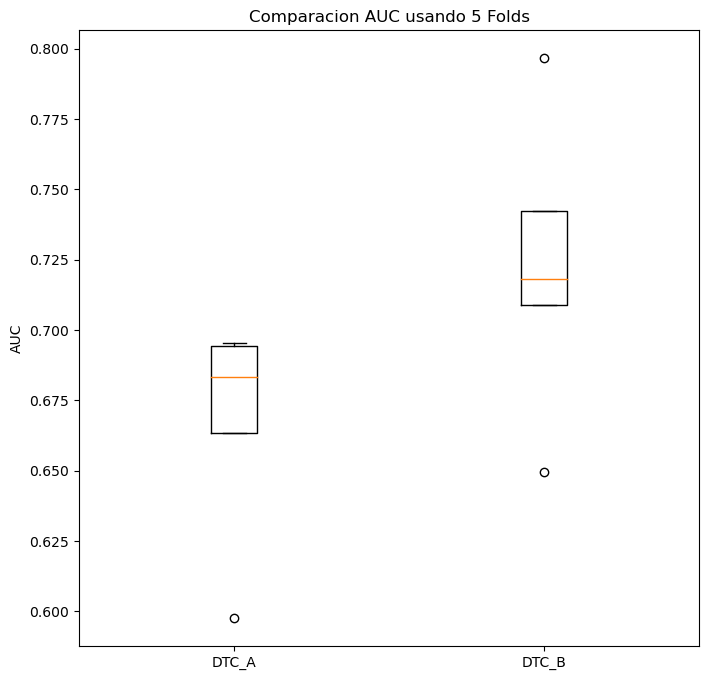

In [165]:
models = []
results = []
names = []

models.append(('DTC_A', grid_model_DTC_Todas.best_estimator_))
models.append(('DTC_B', grid_model_DTC_Selec.best_estimator_))

df_metricasFinal = pd.DataFrame()

for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ])        
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold)  
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

In [166]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
DTC_A           0.66         0.34           0.68          0.64     0.66   
DTC_B           0.66         0.34           0.74          0.58     0.64   

       f1_bad  precision_good  precision_bad  
DTC_A    0.65            0.69           0.63  
DTC_B    0.67            0.71           0.61

### Mejor DTC

In [167]:
mejor_modelo_DTC = grid_model_DTC_Selec.best_estimator_

### Importancia de variables

In [168]:
# Obtener los índices que ordenan las importancias en orden descendente
importance = mejor_modelo_DTC.feature_importances_
sorted_indices = np.argsort(importance)[::-1]

# Obtener las variables ordenadas por importancia
sorted_features = X.columns[sorted_indices]
sorted_importance = importance[sorted_indices]

mask = sorted_importance > 0
sorted_features_positive = sorted_features[mask]
sorted_importance_positive = sorted_importance[mask]

plt.figure(figsize=(4, 7))
# Graficar las variables ordenadas por importancia horizontalmente
plt.barh(sorted_features_positive, sorted_importance_positive)
plt.show()

### Comparacion General de modelos

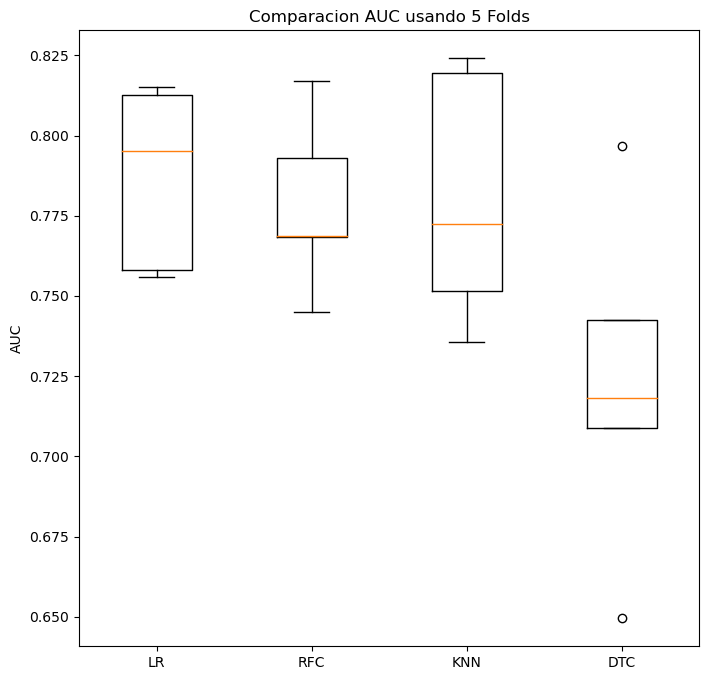

In [169]:
models = []
results = []
predicts = []
names = []

df_metricasFinal = pd.DataFrame()

models.append(('LR', mejor_modelo_LR))
models.append(('RFC', mejor_modelo_RFC))
models.append(('KNN', mejor_modelo_KNN))
models.append(('DTC', mejor_modelo_DTC))


for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ]) 
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold)  
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    predicts.append((name,y_pred))
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

### Comparacion de metricas

In [170]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  f1_bad  \
LR            0.73         0.27           0.70          0.75     0.74    0.71   
RFC           0.72         0.28           0.71          0.73     0.73    0.71   
KNN           0.72         0.28           0.75          0.69     0.72    0.71   
DTC           0.66         0.34           0.74          0.58     0.64    0.67   

     precision_good  precision_bad  
LR             0.74           0.71  
RFC            0.74           0.70  
KNN            0.75           0.68  
DTC            0.71           0.61

### Curva ROC

In [171]:
curva_ROC_cv(predicts,y)

_______________________________________________________________

## GaussianNB

In [172]:
modelo_GaussianNB = GaussianNB()
modelo_GaussianNB.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [173]:
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

### Tuneo con todas las varibales

In [174]:
param_grid_GNB_A = None
grid_search = GridSearchCV(estimator=modelo_GaussianNB, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

param_grid_GNB_A = grid_search.fit(X, y)

print(param_grid_GNB_A.best_score_)
print(param_grid_GNB_A.best_estimator_)
print(param_grid_GNB_A.best_params_)

0.7650617283950617
GaussianNB(var_smoothing=0.3511191734215131)
{'var_smoothing': 0.3511191734215131}


### Tuneo con variables seleccionadas

In [175]:
param_grid_GNB_B = None
grid_search = GridSearchCV(estimator=modelo_GaussianNB, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

param_grid_GNB_B = grid_search.fit(X[var_seleccionadas], y)

print(param_grid_GNB_B.best_score_)
print(param_grid_GNB_B.best_estimator_)
print(param_grid_GNB_B.best_params_)

0.7842592592592593
GaussianNB(var_smoothing=0.1)
{'var_smoothing': 0.1}


### Comparacion de GNB

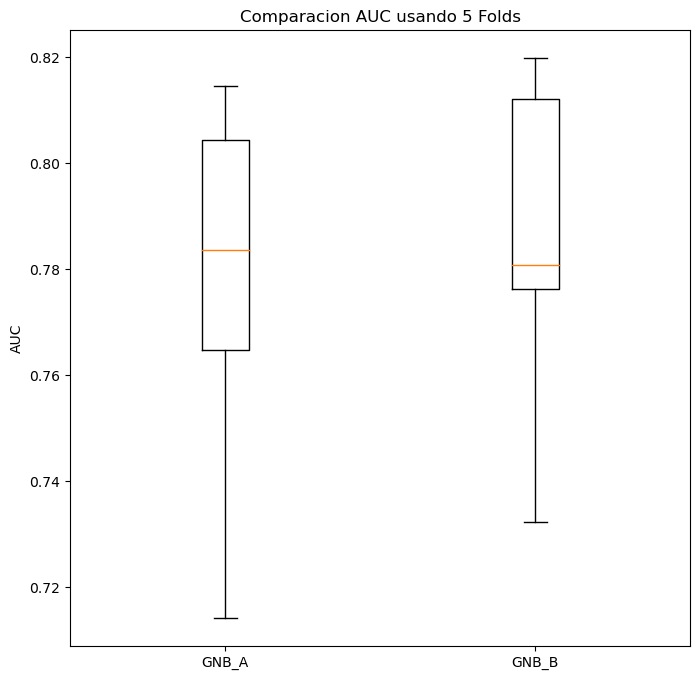

In [176]:
models = []
results = []
names = []

models.append(('GNB_A', param_grid_GNB_A.best_estimator_))
models.append(('GNB_B', param_grid_GNB_B.best_estimator_))

df_metricasFinal = pd.DataFrame()

for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ])        
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold)  
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

In [177]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
GNB_A           0.71         0.29           0.72          0.70     0.72   
GNB_B           0.72         0.28           0.70          0.74     0.74   

       f1_bad  precision_good  precision_bad  
GNB_A     0.7            0.74           0.68  
GNB_B     0.7            0.73           0.71

### Mejor GNB

In [178]:
mejor_modelo_GaussianNB = param_grid_GNB_B.best_estimator_

### Importancia de variables

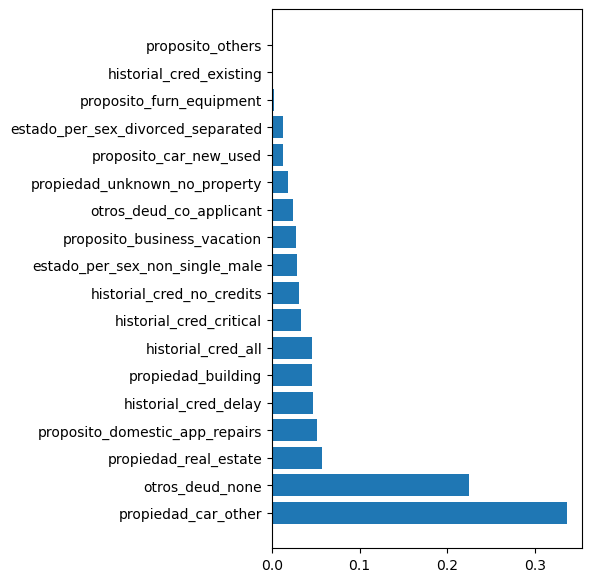

In [179]:
# Obtener los índices que ordenan las importancias en orden descendente
importance = mejor_modelo_DTC.feature_importances_
sorted_indices = np.argsort(importance)[::-1]

# Obtener las variables ordenadas por importancia
sorted_features = X.columns[sorted_indices]
sorted_importance = importance[sorted_indices]

mask = sorted_importance > 0
sorted_features_positive = sorted_features[mask]
sorted_importance_positive = sorted_importance[mask]

plt.figure(figsize=(4, 7))
# Graficar las variables ordenadas por importancia horizontalmente
plt.barh(sorted_features_positive, sorted_importance_positive)
plt.show()

### Comparacion general de mejores modelos

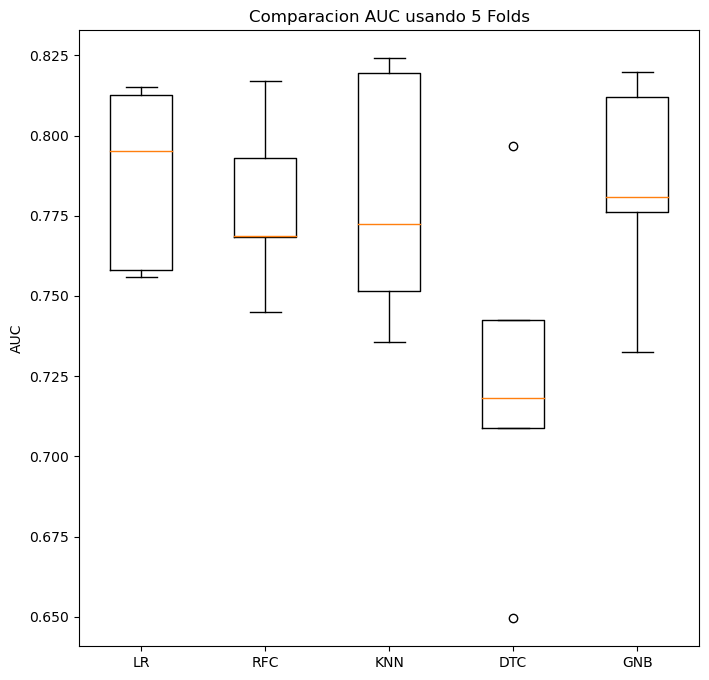

In [180]:
models = []
results = []
predicts = []
names = []

df_metricasFinal = pd.DataFrame()

models.append(('LR', mejor_modelo_LR))
models.append(('RFC', mejor_modelo_RFC))
models.append(('KNN', mejor_modelo_KNN))
models.append(('DTC', mejor_modelo_DTC))
models.append(('GNB', mejor_modelo_GaussianNB))


for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ]) 
    skfold =  StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold)  
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    predicts.append((name,y_pred))
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

In [181]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  f1_bad  \
LR            0.73         0.27           0.70          0.75     0.74    0.71   
RFC           0.72         0.28           0.71          0.73     0.73    0.71   
KNN           0.72         0.28           0.75          0.69     0.72    0.71   
DTC           0.66         0.34           0.74          0.58     0.64    0.67   
GNB           0.72         0.28           0.70          0.74     0.74    0.70   

     precision_good  precision_bad  
LR             0.74           0.71  
RFC            0.74           0.70  
KNN            0.75           0.68  
DTC            0.71           0.61  
GNB            0.73           0.71

### Curva ROC

In [182]:
curva_ROC_cv(predicts,y)

## SVC 

In [183]:
modelo_SVC = SVC(random_state=seed,probability=True)
modelo_SVC.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

## SVC Linear

In [184]:
param_grid =  {'kernel': ["linear"],
                 'C': [0.01,0.02,0.03,0.04,0.05,0.8,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1e-3, 1e-2, 1e-1, 1, 10, 100,300]}

### Tuneo todas las variables

In [185]:
grid_model_SVC_Linear = None
grid_search = GridSearchCV(estimator=modelo_SVC, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_SVC_Linear = grid_search.fit(X, y)

print(grid_model_SVC_Linear.best_score_)
print(grid_model_SVC_Linear.best_estimator_)
print(grid_model_SVC_Linear.best_params_)
                            

0.7763580246913582
SVC(C=0.3, kernel='linear', probability=True, random_state=7)
{'C': 0.3, 'kernel': 'linear'}


### Tuneo Variables Seleccionadas

In [186]:
grid_model_SVC_Linear2 = None
grid_search = GridSearchCV(estimator=modelo_SVC, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_SVC_Linear2 = grid_search.fit(X[var_seleccionadas], y)

print(grid_model_SVC_Linear2.best_score_)
print(grid_model_SVC_Linear2.best_estimator_)
print(grid_model_SVC_Linear2.best_params_)

0.7904320987654321
SVC(C=0.3, kernel='linear', probability=True, random_state=7)
{'C': 0.3, 'kernel': 'linear'}


## SVC RBF

In [187]:
param_grid = {'kernel': ['rbf'],
             'gamma':[0.0001,0.005,0.01,0.05],
             "C": [0.01,0.02,0.03,0.04,0.05,0.8,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1e-3, 1e-2, 1e-1, 1, 10, 100,300]}   

### Tuneo todas las variables

In [188]:
grid_model_SVC_RBF = None
grid_search = GridSearchCV(estimator=modelo_SVC, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_SVC_RBF = grid_search.fit(X, y)

print(grid_model_SVC_RBF.best_score_)
print(grid_model_SVC_RBF.best_estimator_)
print(grid_model_SVC_RBF.best_params_)
                            

0.7784567901234568
SVC(C=10, gamma=0.005, probability=True, random_state=7)
{'C': 10, 'gamma': 0.005, 'kernel': 'rbf'}


### Tuneado variables seleccionadas

In [189]:
grid_model_SVC_RBF2 = None
grid_search = GridSearchCV(estimator=modelo_SVC, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_SVC_RBF2 = grid_search.fit(X[var_seleccionadas], y)

print(grid_model_SVC_RBF2.best_score_)
print(grid_model_SVC_RBF2.best_estimator_)
print(grid_model_SVC_RBF2.best_params_)
                            

0.7938271604938272
SVC(C=10, gamma=0.01, probability=True, random_state=7)
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


## SVC Poly

In [190]:
param_grid =   {"kernel": ["poly"],
                  "degree": [2, 3, 4, 7, 10],
                   "C": [0.01,0.02,0.03,0.04,0.05,0.8,0.1,0.2,0.3,0.4,0.5,0.6,0.8,1e-3, 1e-2, 1e-1, 1, 10, 100,300]}   

### Tuneo todas las variables

In [191]:
grid_model_SVC_Poly = None  
              

grid_search = GridSearchCV(estimator=modelo_SVC, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_SVC_Poly = grid_search.fit(X, y)

print(grid_model_SVC_Poly.best_score_)
print(grid_model_SVC_Poly.best_estimator_)
print(grid_model_SVC_Poly.best_params_)
                            

0.7823456790123456
SVC(C=0.6, degree=2, kernel='poly', probability=True, random_state=7)
{'C': 0.6, 'degree': 2, 'kernel': 'poly'}


### Tuneo con variables seleccionadas

In [192]:
grid_model_SVC_Poly2 = None  
              

grid_search = GridSearchCV(estimator=modelo_SVC, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_SVC_Poly2 = grid_search.fit(X[var_seleccionadas], y)

print(grid_model_SVC_Poly2.best_score_)
print(grid_model_SVC_Poly2.best_estimator_)
print(grid_model_SVC_Poly2.best_params_)

0.7828395061728395
SVC(C=0.3, degree=2, kernel='poly', probability=True, random_state=7)
{'C': 0.3, 'degree': 2, 'kernel': 'poly'}


### Comparacion Modelos SVC

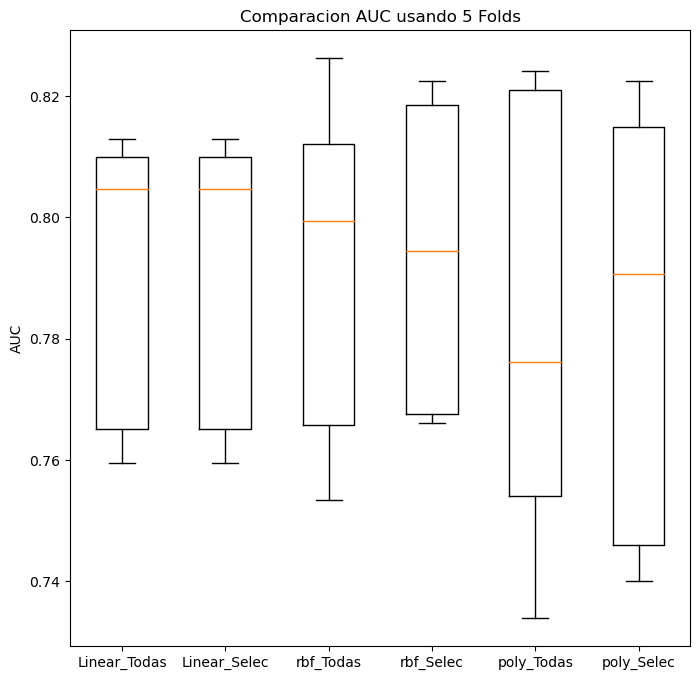

In [193]:
models = []
results = []
names = []

df_metricasFinal = pd.DataFrame()

models.append(('Linear_Todas', grid_model_SVC_Linear.best_estimator_))
models.append(('Linear_Selec', grid_model_SVC_Linear2.best_estimator_))
models.append(('rbf_Todas', grid_model_SVC_RBF.best_estimator_))
models.append(('rbf_Selec', grid_model_SVC_RBF2.best_estimator_))
models.append(('poly_Todas', grid_model_SVC_Poly.best_estimator_))
models.append(('poly_Selec', grid_model_SVC_Poly2.best_estimator_))

for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ])
   
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold)  
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)


In [194]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  \
Linear_Todas           0.73         0.27           0.73          0.73   
Linear_Selec           0.73         0.27           0.73          0.73   
rbf_Todas              0.72         0.28           0.72          0.73   
rbf_Selec              0.74         0.26           0.71          0.76   
poly_Todas             0.73         0.27           0.77          0.69   
poly_Selec             0.70         0.30           0.79          0.63   

              f1_good  f1_bad  precision_good  precision_bad  
Linear_Todas     0.74    0.72            0.75           0.71  
Linear_Selec     0.74    0.72            0.75           0.71  
rbf_Todas        0.74    0.71            0.74           0.71  
rbf_Selec        0.76    0.72            0.75           0.73  
poly_Todas       0.73    0.73            0.77           0.69  
poly_Selec       0.69    0.71            0.76           0.65

### Mejor SVC

In [195]:
mejor_modelo_SVC = grid_model_SVC_Linear2.best_estimator_

### Importancia de variables

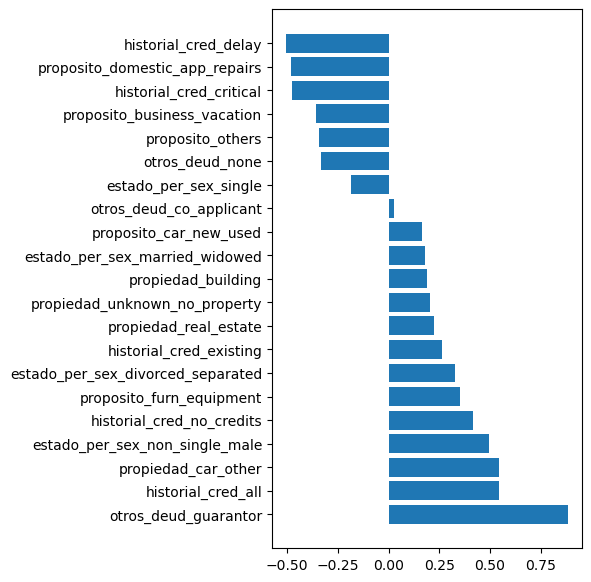

In [196]:
# Obtener los índices que ordenan las importancias en orden descendente
importance = mejor_modelo_SVC.coef_[0]
sorted_indices = np.argsort(importance)[::-1]

# Obtener las variables ordenadas por importancia
sorted_features = X.columns[sorted_indices]
sorted_importance = importance[sorted_indices]


sorted_features_positive = sorted_features
sorted_importance_positive = sorted_importance

plt.figure(figsize=(4, 7))
# Graficar las variables ordenadas por importancia horizontalmente
plt.barh(sorted_features_positive, sorted_importance_positive)
#plt.xticks(rotation=90)
plt.show()

### Comparacion General de modelos

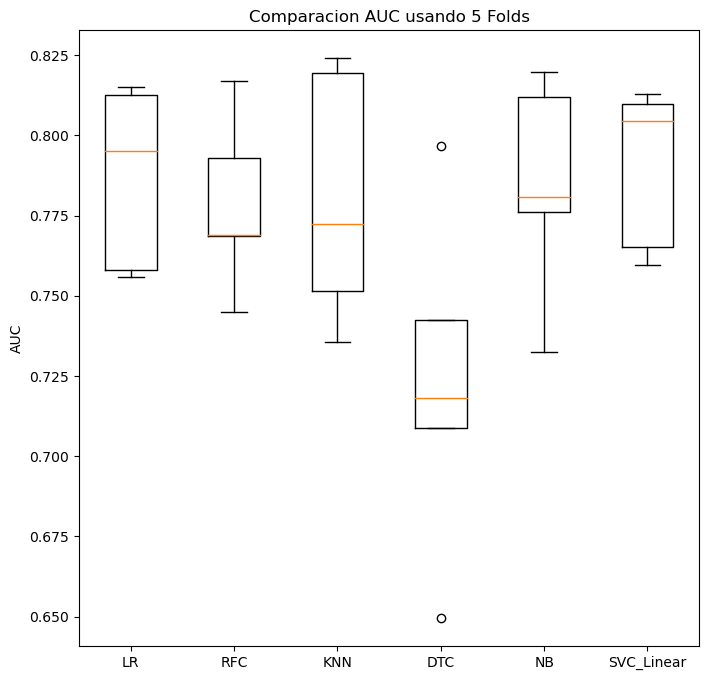

In [197]:
models = []
results = []
predicts = []
names = []

df_metricasFinal = pd.DataFrame()

models.append(('LR', mejor_modelo_LR))
models.append(('RFC', mejor_modelo_RFC))
models.append(('KNN', mejor_modelo_KNN))
models.append(('DTC', mejor_modelo_DTC))
models.append(('NB', mejor_modelo_GaussianNB))
models.append(('SVC_Linear', mejor_modelo_SVC))


for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ]) 
    skfold =  StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold)  
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    predicts.append((name,y_pred))
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

In [198]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
LR                   0.73         0.27           0.70          0.75     0.74   
RFC                  0.72         0.28           0.71          0.73     0.73   
KNN                  0.72         0.28           0.75          0.69     0.72   
DTC                  0.66         0.34           0.74          0.58     0.64   
NB                   0.72         0.28           0.70          0.74     0.74   
SVC_Linear           0.73         0.27           0.73          0.73     0.74   

            f1_bad  precision_good  precision_bad  
LR            0.71            0.74           0.71  
RFC           0.71            0.74           0.70  
KNN           0.71            0.75           0.68  
DTC           0.67            0.71           0.61  
NB            0.70            0.73           0.71  
SVC_Linear    0.72            0.75           0.71

### Curva ROC

In [199]:
curva_ROC_cv(predicts,y)

_________________________________________________________

## LinearDiscriminantAnalysis

In [200]:
modelo_LDA = LinearDiscriminantAnalysis()
modelo_LDA.get_params().keys()

dict_keys(['covariance_estimator', 'n_components', 'priors', 'shrinkage', 'solver', 'store_covariance', 'tol'])

In [201]:
#->covariance_estimator=shrinkage - Default
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto',0.25, 0.5, 0.75, 1, 2]
}


### Tuneo todas las variables

In [202]:
grid_model_LDA_A= None
grid_search = GridSearchCV(estimator=modelo_LDA, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_LDA_A = grid_search.fit(X, y)

print(grid_model_LDA_A.best_score_)
print(grid_model_LDA_A.best_estimator_)
print(grid_model_LDA_A.best_params_)

0.7724691358024691
LinearDiscriminantAnalysis(shrinkage=0.25, solver='lsqr')
{'shrinkage': 0.25, 'solver': 'lsqr'}


### Importancia de variables

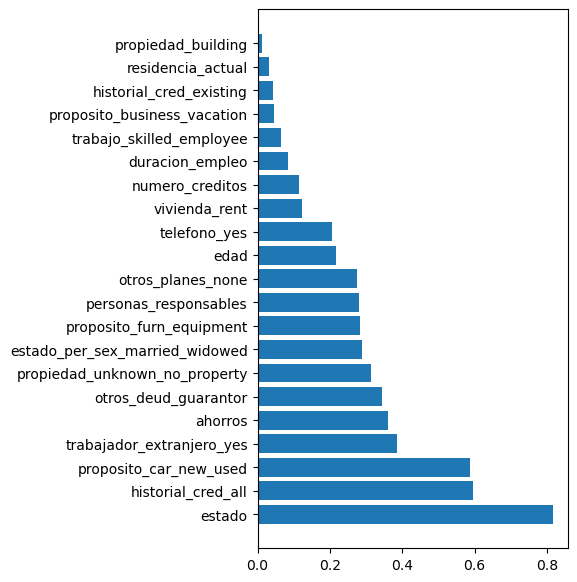

In [203]:
# Obtener los índices que ordenan las importancias en orden descendente
importance = grid_model_LDA_A.best_estimator_.coef_[0]
sorted_indices = np.argsort(importance)[::-1]

# Obtener las variables ordenadas por importancia
sorted_features = X.columns[sorted_indices]
sorted_importance = importance[sorted_indices]

mask = sorted_importance > 0
sorted_features_positive = sorted_features[mask]
sorted_importance_positive = sorted_importance[mask]

plt.figure(figsize=(4, 7))
# Graficar las variables ordenadas por importancia horizontalmente
plt.barh(sorted_features_positive, sorted_importance_positive)
plt.show()

### Tuneo variables seleccionadas

In [204]:
grid_model_LDA_B= None
grid_search = GridSearchCV(estimator=modelo_LDA, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_LDA_B = grid_search.fit(X[var_seleccionadas], y)

print(grid_model_LDA_B.best_score_)
print(grid_model_LDA_B.best_estimator_)
print(grid_model_LDA_B.best_params_)

0.7896913580246914
LinearDiscriminantAnalysis()
{'shrinkage': None, 'solver': 'svd'}


### Comparacion de LDA

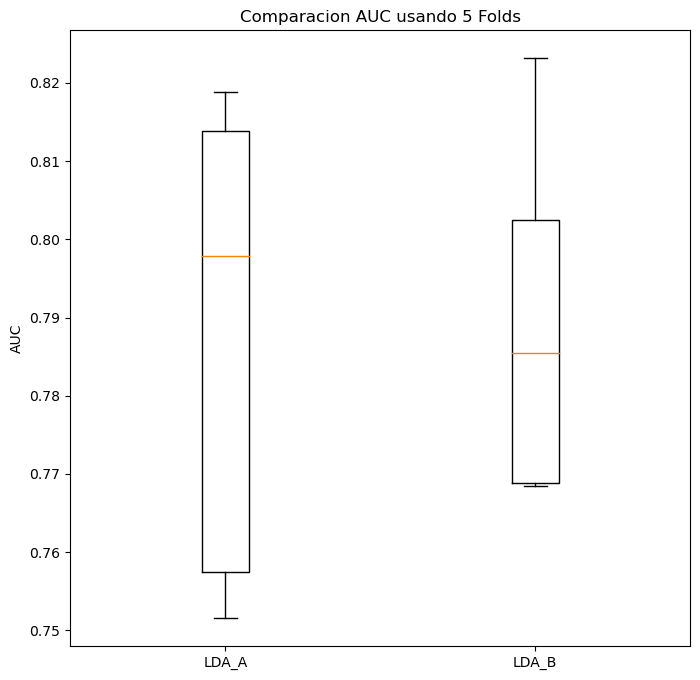

In [205]:
models = []
results = []
names = []

df_metricasFinal = pd.DataFrame()

models.append(('LDA_A', grid_model_LDA_A.best_estimator_))
models.append(('LDA_B', grid_model_LDA_B.best_estimator_))

for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ])
   
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold)  
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)


In [206]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
LDA_A           0.73         0.27           0.73          0.73     0.74   
LDA_B           0.73         0.27           0.71          0.74     0.74   

       f1_bad  precision_good  precision_bad  
LDA_A    0.72            0.75           0.71  
LDA_B    0.71            0.74           0.71

### Mejor LinearDiscriminantAnalysis

In [207]:
mejor_modelo_LDA = grid_model_LDA_A.best_estimator_
mejor_modelo_LDA = mejor_modelo_LDA.fit(X[var_seleccionadas],y)

### Importancia de variables

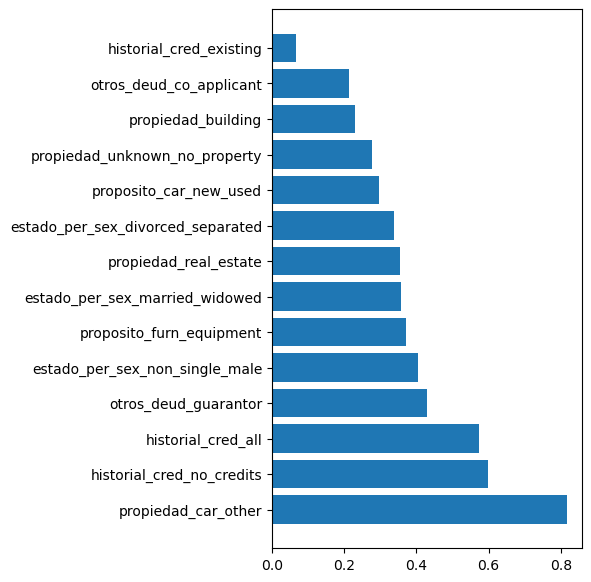

In [208]:
# Obtener los índices que ordenan las importancias en orden descendente
importance = mejor_modelo_LDA.coef_[0]
sorted_indices = np.argsort(importance)[::-1]

# Obtener las variables ordenadas por importancia
sorted_features = X.columns[sorted_indices]
sorted_importance = importance[sorted_indices]

mask = sorted_importance > 0
sorted_features_positive = sorted_features[mask]
sorted_importance_positive = sorted_importance[mask]

plt.figure(figsize=(4, 7))
# Graficar las variables ordenadas por importancia horizontalmente
plt.barh(sorted_features_positive, sorted_importance_positive)
plt.show()

### Comparacion General de modelos

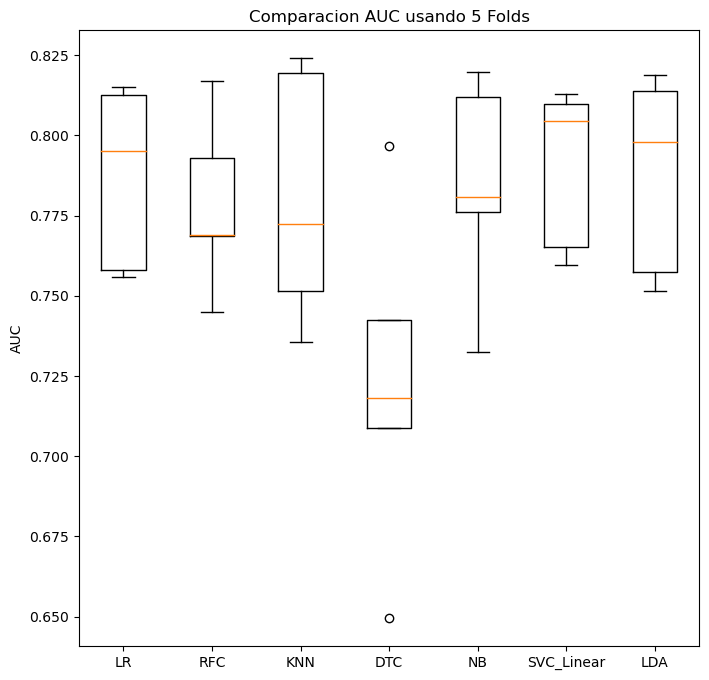

In [209]:
models = []
results = []
predicts = []
names = []

df_metricasFinal = pd.DataFrame()

models.append(('LR', mejor_modelo_LR))
models.append(('RFC', mejor_modelo_RFC))
models.append(('KNN', mejor_modelo_KNN))
models.append(('DTC', mejor_modelo_DTC))
models.append(('NB', mejor_modelo_GaussianNB))
models.append(('SVC_Linear', mejor_modelo_SVC))
models.append(('LDA', mejor_modelo_LDA))


for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ]) 
    skfold =  StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold)  
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    predicts.append((name,y_pred))
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

In [210]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
LR                   0.73         0.27           0.70          0.75     0.74   
RFC                  0.72         0.28           0.71          0.73     0.73   
KNN                  0.72         0.28           0.75          0.69     0.72   
DTC                  0.66         0.34           0.74          0.58     0.64   
NB                   0.72         0.28           0.70          0.74     0.74   
SVC_Linear           0.73         0.27           0.73          0.73     0.74   
LDA                  0.73         0.27           0.73          0.73     0.74   

            f1_bad  precision_good  precision_bad  
LR            0.71            0.74           0.71  
RFC           0.71            0.74           0.70  
KNN           0.71            0.75           0.68  
DTC           0.67            0.71           0.61  
NB            0.70            0.73           0.71  
SVC_Linear    0.72            0.75           0.71  
LDA           0.72            0.75           0.71

### Curva ROC

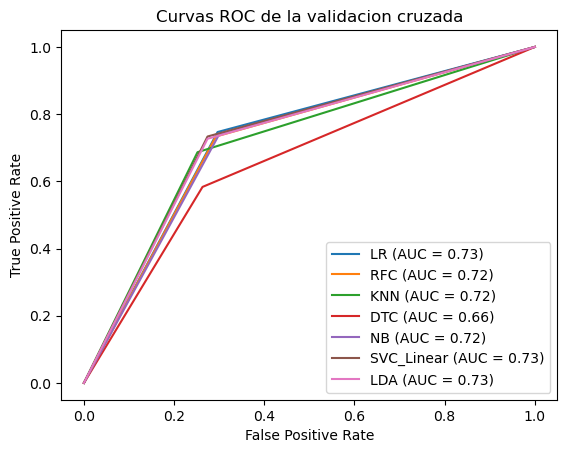

In [211]:
curva_ROC_cv(predicts,y)

_________________________________________________________________

## GradientBoostingClassifier

In [212]:
modelo_GBC = GradientBoostingClassifier(random_state = seed)
modelo_GBC.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [213]:
param_grid = {
    'n_estimators': [100,300,500,700],
    'max_features': [3,4,5,6,7,8,9,12,14,16,17,19],
    'max_depth': [4, 5, 6, 7, 8],
    'min_samples_split': [4,7,10],
    'tol':[5,10]
}


### Tuneo todas las variables

In [214]:
grid_model_Todas= None
grid_search = GridSearchCV(estimator=modelo_GBC, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_Todas = grid_search.fit(X, y)

# Reproduce un sonido de "beep" al terminar el tuneado.
winsound.Beep(1000, 1000)


print(grid_model_Todas.best_score_)
print(grid_model_Todas.best_estimator_)
print(grid_model_Todas.best_params_)

0.7776543209876544
GradientBoostingClassifier(max_depth=8, max_features=17, min_samples_split=7,
                           random_state=7, tol=5)
{'max_depth': 8, 'max_features': 17, 'min_samples_split': 7, 'n_estimators': 100, 'tol': 5}


### Importancia de variables

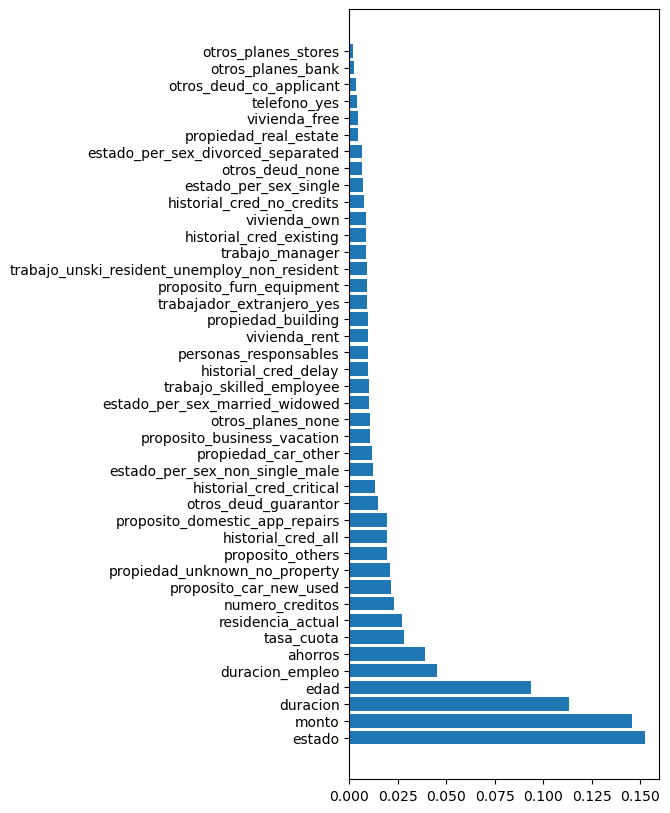

In [215]:
# Obtener los índices que ordenan las importancias en orden descendente
importance = grid_model_Todas.best_estimator_.feature_importances_
sorted_indices = np.argsort(importance)[::-1]

# Obtener las variables ordenadas por importancia
sorted_features = X.columns[sorted_indices]
sorted_importance = importance[sorted_indices]

mask = sorted_importance > 0
sorted_features_positive = sorted_features[mask]
sorted_importance_positive = sorted_importance[mask]

plt.figure(figsize=(4, 10))
# Graficar las variables ordenadas por importancia horizontalmente
plt.barh(sorted_features_positive, sorted_importance_positive)
plt.show()

### Tuneo Variables Seleccionadas

In [216]:
grid_model_selec= None
grid_search = GridSearchCV(estimator=modelo_GBC, 
                           param_grid=param_grid, 
                           cv=skfold,
                           scoring='roc_auc')

grid_model_selec = grid_search.fit(X[var_seleccionadas], y)

# Reproduce un sonido de "beep" al terminar el tuneado.
winsound.Beep(1000, 1000)


print(grid_model_selec.best_score_)
print(grid_model_selec.best_estimator_)
print(grid_model_selec.best_params_)

0.7699999999999999
GradientBoostingClassifier(max_depth=4, max_features=3, min_samples_split=7,
                           random_state=7, tol=5)
{'max_depth': 4, 'max_features': 3, 'min_samples_split': 7, 'n_estimators': 100, 'tol': 5}


### Comparacion GradientBoostingClassifier

In [217]:
models = []
results = []
names = []


df_metricasFinal = pd.DataFrame()

models.append(('GBC_A', grid_model_Todas.best_estimator_))
models.append(('GBC_B', grid_model_selec.best_estimator_))

for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ])
   
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold)  
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

In [218]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
GBC_A           0.68         0.32           0.66          0.71     0.70   
GBC_B           0.70         0.30           0.68          0.72     0.71   

       f1_bad  precision_good  precision_bad  
GBC_A    0.66            0.70           0.67  
GBC_B    0.68            0.71           0.68

### Mejor GBC

In [219]:
mejor_modelo_GBC = grid_model_Todas.best_estimator_
mejor_modelo_GBC.fit(X[var_seleccionadas],y)

GradientBoostingClassifier(max_depth=8, max_features=17, min_samples_split=7,
                           random_state=7, tol=5)

### Importancia de variables

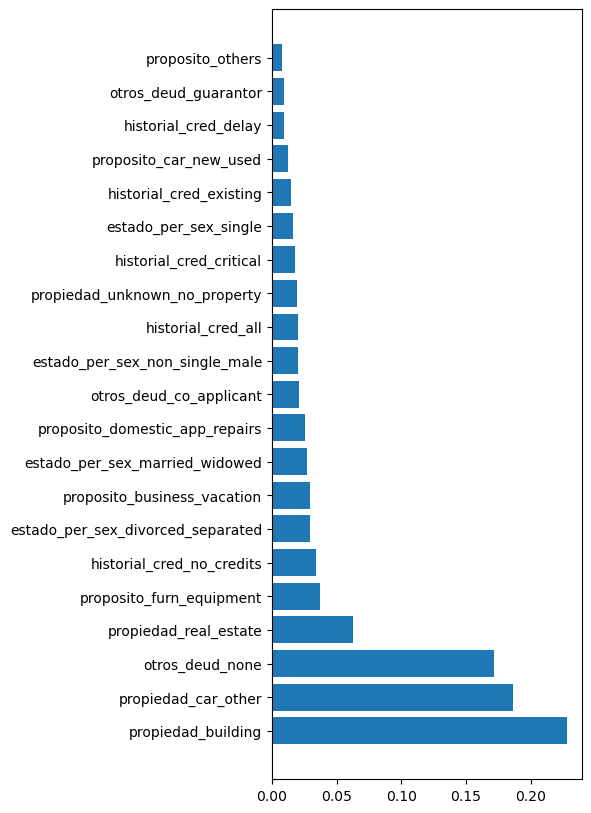

In [220]:
# Obtener los índices que ordenan las importancias en orden descendente
importance = mejor_modelo_GBC.feature_importances_
sorted_indices = np.argsort(importance)[::-1]

# Obtener las variables ordenadas por importancia
sorted_features = X.columns[sorted_indices]
sorted_importance = importance[sorted_indices]

mask = sorted_importance > 0
sorted_features_positive = sorted_features[mask]
sorted_importance_positive = sorted_importance[mask]

plt.figure(figsize=(4, 10))
# Graficar las variables ordenadas por importancia horizontalmente
plt.barh(sorted_features_positive, sorted_importance_positive)
plt.show()

### Comparacion de modelos

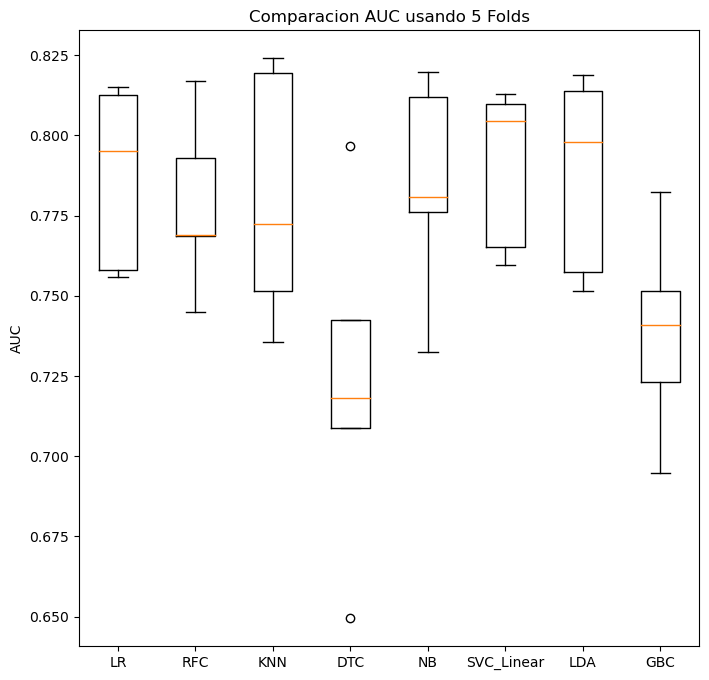

In [221]:
models = []
results = []
predicts = []
names = []

df_metricasFinal = pd.DataFrame()

models.append(('LR', mejor_modelo_LR))
models.append(('RFC', mejor_modelo_RFC))
models.append(('KNN', mejor_modelo_KNN))
models.append(('DTC', mejor_modelo_DTC))
models.append(('NB', mejor_modelo_GaussianNB))
models.append(('SVC_Linear', mejor_modelo_SVC))
models.append(('LDA', mejor_modelo_LDA))
models.append(('GBC', mejor_modelo_GBC))


for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ]) 
 
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold) 
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    predicts.append((name,y_pred))
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

In [222]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
LR                   0.73         0.27           0.70          0.75     0.74   
RFC                  0.72         0.28           0.71          0.73     0.73   
KNN                  0.72         0.28           0.75          0.69     0.72   
DTC                  0.66         0.34           0.74          0.58     0.64   
NB                   0.72         0.28           0.70          0.74     0.74   
SVC_Linear           0.73         0.27           0.73          0.73     0.74   
LDA                  0.73         0.27           0.73          0.73     0.74   
GBC                  0.68         0.32           0.66          0.71     0.70   

            f1_bad  precision_good  precision_bad  
LR            0.71            0.74           0.71  
RFC           0.71            0.74           0.70  
KNN           0.71            0.75           0.68  
DTC           0.67            0.71           0.61  
NB            0.70            0.73           0.71  
SVC_Linear    0.72            0.75           0.71  
LDA           0.72            0.75           0.71  
GBC           0.66            0.70           0.67

### Curva ROC

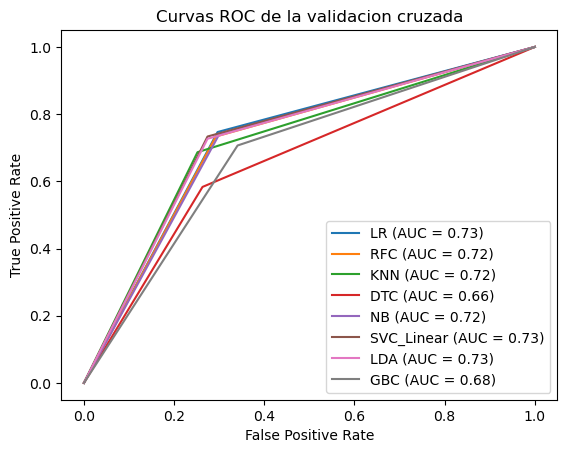

In [223]:
curva_ROC_cv(predicts,y)

## REDES

In [224]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import (
    BatchNormalization,  Dropout, Dense
)


from scikeras.wrappers import KerasClassifier

import kerastuner as kt

### Tuneado de redes

In [254]:
def build_model(hp):
    model = keras.Sequential()
  
    for i in range(hp.Int('num_layers', 1, 3)):
        # Sample different number of layers with hp.Int
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=16,
                                            max_value=128,
                                            step=8),
                               activation='relu'))
    model.add(layers.Dropout(hp.Float('dp_'+ str(i), min_value=0.0,
                  max_value=0.35, default=0.0, step=0.05)))
  
    model.add(layers.Dense(1, activation=hp.Choice('output_activation', ['sigmoid'])))

    model.compile(
        optimizer=keras.optimizers.SGD(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=[tf.keras.metrics.AUC()])
    return model

In [255]:
tuner = kt.Hyperband(build_model,
                     objective=kt.Objective("auc", direction="max"),
                     overwrite=True,
                     max_epochs=50,
                     factor=2,
                     hyperband_iterations=1,
                     directory='my_dir',
                     project_name='intro_to_kt')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='auc', patience=5)

In [256]:
tuner.search(X[var_seleccionadas], y_num, epochs=50, validation_split=0.1, batch_size=8,callbacks=[stop_early],verbose=0)

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hps.get_config())

INFO:tensorflow:Oracle triggered exit
{'space': [{'class_name': 'Int', 'config': {'name': 'num_layers', 'default': None, 'conditions': [], 'min_value': 1, 'max_value': 3, 'step': 1, 'sampling': 'linear'}}, {'class_name': 'Int', 'config': {'name': 'units_0', 'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 8, 'sampling': 'linear'}}, {'class_name': 'Float', 'config': {'name': 'dp_0', 'default': 0.0, 'conditions': [], 'min_value': 0.0, 'max_value': 0.35, 'step': 0.05, 'sampling': 'linear'}}, {'class_name': 'Choice', 'config': {'name': 'output_activation', 'default': 'sigmoid', 'conditions': [], 'values': ['sigmoid'], 'ordered': False}}, {'class_name': 'Choice', 'config': {'name': 'learning_rate', 'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}}, {'class_name': 'Int', 'config': {'name': 'units_1', 'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 8, 'sampling': 'linear'}}, {'class_name': 'Int', 'c

In [257]:
print(f"Best learning rate: {best_hps.get('learning_rate')}")
print(f"Best output activation function: {best_hps.get('output_activation')}")
print(f"Best number of hidden layers: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Number of units of hidden layer {i+1}: {best_hps.get('units_' + str(i))}")
    print(f"Dropout rate of hidden layer {i+1}: {best_hps.get('dp_' + str(i))}")

Best learning rate: 0.01
Best output activation function: sigmoid
Best number of hidden layers: 3
Number of units of hidden layer 1: 112
Dropout rate of hidden layer 1: 0.05
Number of units of hidden layer 2: 56
Dropout rate of hidden layer 2: 0.1
Number of units of hidden layer 3: 56
Dropout rate of hidden layer 3: 0.05


### Mejor Red

In [267]:
def RedClasificacionBinaria():
    model = tf.keras.models.Sequential()
    # Primera hidden layer
    model.add(layers.Dense(120, activation='sigmoid', input_dim=NumeroOptimoVariables))
    model.add(Dropout(0.05))
    # Segunda hidden layer
    model.add(layers.Dense(128, activation='sigmoid'))
    model.add(Dropout(0.15))
    # Tercera hidden layer
    model.add(layers.Dense(16, activation='sigmoid'))
    model.add(Dropout(0.0))
    # output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss= "binary_crossentropy",
    metrics=[tf.keras.metrics.AUC()])
        
    return model


In [268]:
modelo_RedNuronal = KerasClassifier(RedClasificacionBinaria, epochs=100, batch_size=32, verbose=0,random_state=seed)

### Comparacion General de modelos

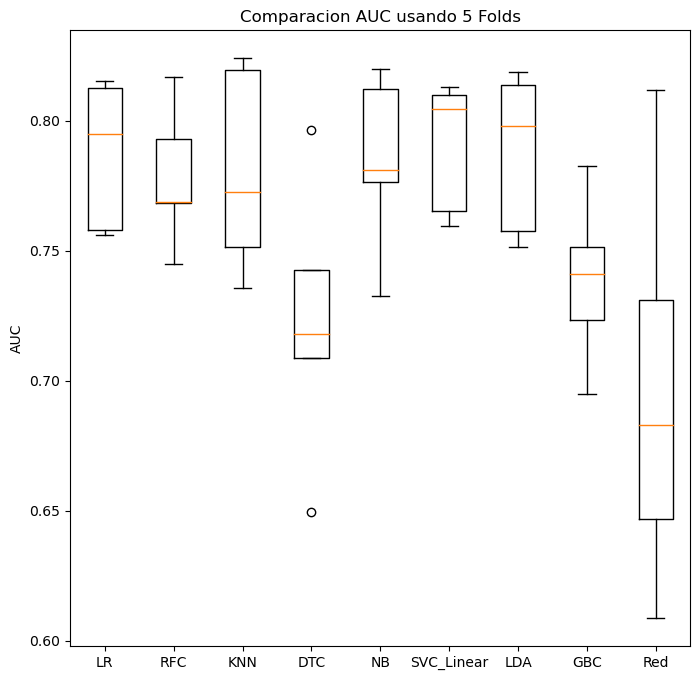

In [269]:
models = []
results = []
predicts = []
names = []

df_metricasFinal = pd.DataFrame()

models.append(('LR', mejor_modelo_LR))
models.append(('RFC', mejor_modelo_RFC))
models.append(('KNN', mejor_modelo_KNN))
models.append(('DTC', mejor_modelo_DTC))
models.append(('NB', mejor_modelo_GaussianNB))
models.append(('SVC_Linear', mejor_modelo_SVC))
models.append(('LDA', mejor_modelo_LDA))
models.append(('GBC', mejor_modelo_GBC))
models.append(('Red', modelo_RedNuronal))


for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ]) 
 
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold) 
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    predicts.append((name,y_pred))
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

In [270]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
LR                   0.73         0.27           0.70          0.75     0.74   
RFC                  0.72         0.28           0.71          0.73     0.73   
KNN                  0.72         0.28           0.75          0.69     0.72   
DTC                  0.66         0.34           0.74          0.58     0.64   
NB                   0.72         0.28           0.70          0.74     0.74   
SVC_Linear           0.73         0.27           0.73          0.73     0.74   
LDA                  0.73         0.27           0.73          0.73     0.74   
GBC                  0.68         0.32           0.66          0.71     0.70   
Red                  0.64         0.36           0.66          0.62     0.64   

            f1_bad  precision_good  precision_bad  
LR            0.71            0.74           0.71  
RFC           0.71            0.74           0.70  
KNN           0.71            0.75           0.68  
DTC           0.67            0.71           0.61  
NB            0.70            0.73           0.71  
SVC_Linear    0.72            0.75           0.71  
LDA           0.72            0.75           0.71  
GBC           0.66            0.70           0.67  
Red           0.63            0.67           0.61

### Curva ROC

In [271]:
curva_ROC_cv(predicts,y)

____________________________________________________________________

## Ensamblado

In [272]:
from sklearn.ensemble import VotingClassifier

In [273]:
ModeloEnsamblado = VotingClassifier(estimators = [('RFC',mejor_modelo_RFC),('LDA',mejor_modelo_LDA)],voting='soft')

### Comparacion general de modelos

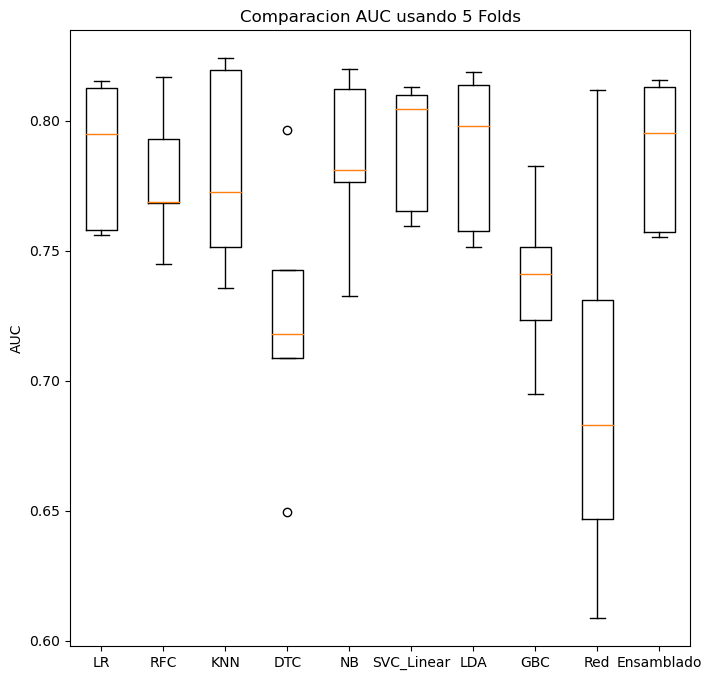

In [274]:
models = []
results = []
predicts = []
names = []

df_metricasFinal = pd.DataFrame()

models.append(('LR', mejor_modelo_LR))
models.append(('RFC', mejor_modelo_RFC))
models.append(('KNN', mejor_modelo_KNN))
models.append(('DTC', mejor_modelo_DTC))
models.append(('NB', mejor_modelo_GaussianNB))
models.append(('SVC_Linear', mejor_modelo_SVC))
models.append(('LDA', mejor_modelo_LDA))
models.append(('GBC', mejor_modelo_GBC))
models.append(('Red', modelo_RedNuronal))
models.append(('Ensamblado', ModeloEnsamblado))


for name, model in models:
    pipeline = Pipeline(steps=[        
        (name, model)
    ]) 
 
    cv_results = cross_val_score(pipeline, X[var_seleccionadas], y, cv=skfold, scoring='roc_auc')
    y_pred = cross_val_predict(pipeline, X[var_seleccionadas], y, cv=skfold) 
    df_metricas = tabla_metricas(y,y_pred,name)
    df_metricasFinal = pd.concat([df_metricasFinal,df_metricas])
    predicts.append((name,y_pred))
    results.append(cv_results)
    names.append(name)

boxplots_algorithms(results, names)

In [275]:
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
LR                   0.73         0.27           0.70          0.75     0.74   
RFC                  0.72         0.28           0.71          0.73     0.73   
KNN                  0.72         0.28           0.75          0.69     0.72   
DTC                  0.66         0.34           0.74          0.58     0.64   
NB                   0.72         0.28           0.70          0.74     0.74   
SVC_Linear           0.73         0.27           0.73          0.73     0.74   
LDA                  0.73         0.27           0.73          0.73     0.74   
GBC                  0.68         0.32           0.66          0.71     0.70   
Red                  0.64         0.36           0.66          0.62     0.64   
Ensamblado           0.73         0.27           0.72          0.73     0.74   

            f1_bad  precision_good  precision_bad  
LR            0.71            0.74           0.71  
RFC           0.71            0.74           0.70  
KNN           0.71            0.75           0.68  
DTC           0.67            0.71           0.61  
NB            0.70            0.73           0.71  
SVC_Linear    0.72            0.75           0.71  
LDA           0.72            0.75           0.71  
GBC           0.66            0.70           0.67  
Red           0.63            0.67           0.61  
Ensamblado    0.71            0.74           0.71

### Curva ROC

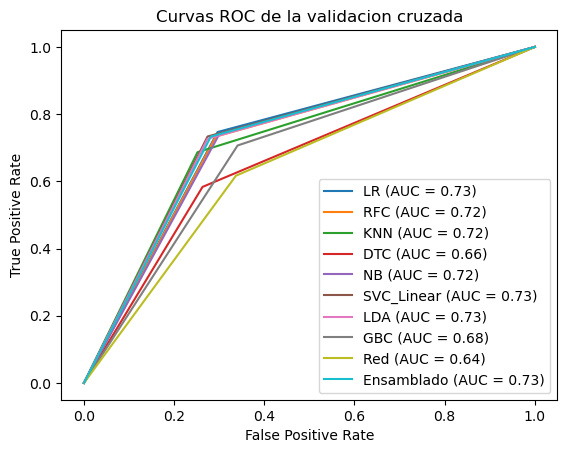

In [276]:
curva_ROC_cv(predicts,y)

____________________________________________________________________

# Evaluacion

### Analisis de resultados

Se utiliza Cross-Validation con la funcion cross_val_score para calcular el AUC cada una de las cinco iteraciónes de la validación cruzada. El grafico siguiente grafico de boxplot permite entender la distribución de las puntuaciones de evaluación en diferentes pliegues de la validación cruzada para todos los algoritmos.

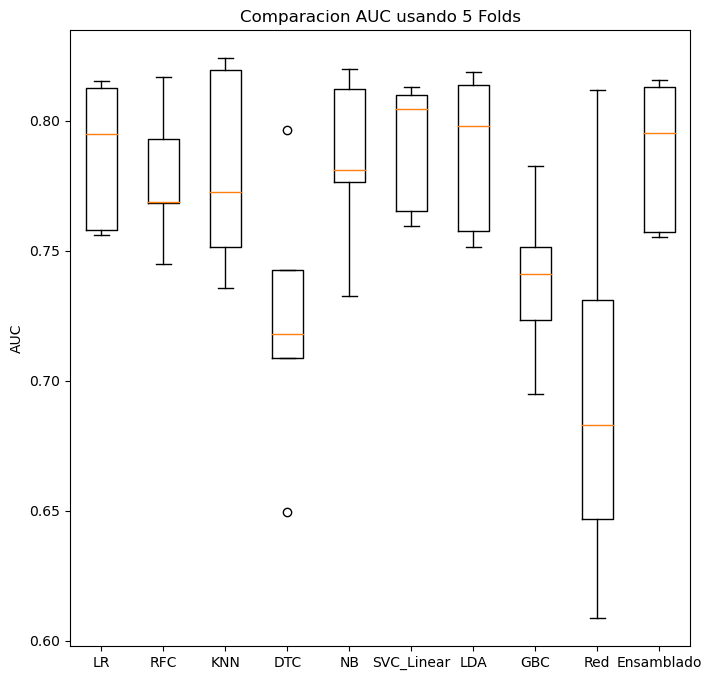

In [277]:
boxplots_algorithms(results, names)

En total se probaron 10 algoritmos.


En el gráfico de la izquierda se observa que ningún algoritmo tiene una distribución simétrica exacta, todos tienen una asimetría positiva o negativa.
En la mayoría hay una dispersión aproximada de 5 puntos porcentuales.
Se descartan los que tienen alguna corrida atípica en este caso DTC.
GBC y Redes se descartan porque el 50% de sus valores está por debajo de los demás algoritmos.
KNN tienen los resultados muy dispersos lo que lo hace inestable.
RFC tienen la menor dispersión pero el 50% de sus valores no supera el 80% en AUC

Los cinco candidatos son los siguientes cinco:
SVC_Linear, LDA, NB, LR, y Ensamblado


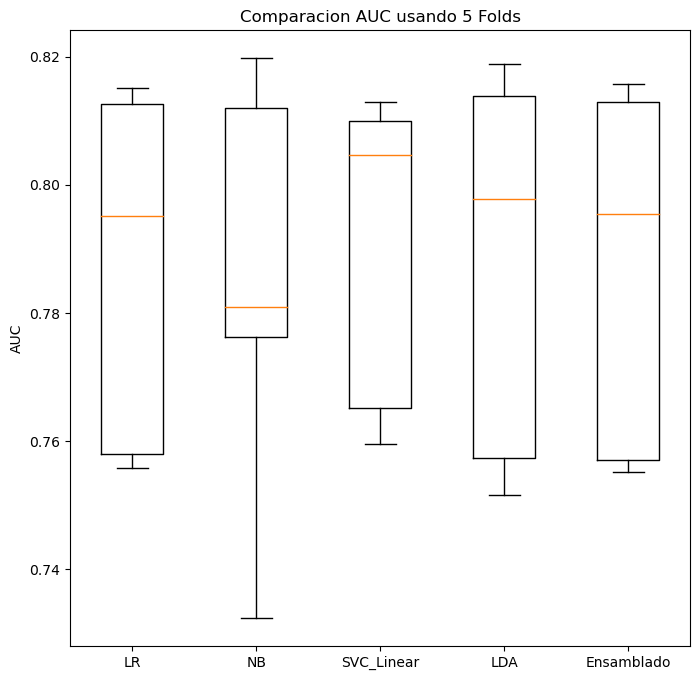

In [278]:
indices = [names.index('LR'), names.index('NB'), names.index('SVC_Linear'), names.index('LDA'), names.index('Ensamblado')]
algoritmos_candidatos = [results[i] for i in indices]
names_candidatos = [names[i] for i in indices]
boxplots_algorithms(algoritmos_candidatos, names_candidatos)

NB auqnue no muestra atipicos si muestra bastante dispercion y un bigote inferior muy bajo lo que significa que hay al menos un valor de AUC que dio menos de 74%, por eso se descarta.

LDA, Ensamblado y LR, tienen una mayor dispersión que SVC_Linear. Lo que significa que son modelos mas dispersos y menos robustos.

### Metricas basadas en validacion cruzada
A los cinco algoritmos seleccionados anteriormente se van a evaluar las metricas.
Para lo cual las metricas se ordenan por importancia segun el objetivo a alcanzar. 

La metrica mas importante recordemos es la especificidad, es decir la proporcion de acierto de la clase minoritaria en este caso el "bad". Esto es debido al supuesto que para el banco aleman es mas caro darle un credito a personas que no van a cumplir sus obligaciones posteriormente.

El orden de importancia de las metricas bajo esta condicion es: especificidad, f1_bad,precision_bad

In [279]:
PrioridadMetricas = ['especificidad', 'f1_bad','precision_bad']
Mejores_algoritmos_AUC_Prom = ['SVC_Linear', 'LDA','NB', 'LR', 'Ensamblado']

TablaMetricas = df_metricasFinal.copy()
TablaMetricas = TablaMetricas.reset_index() 
TablaMetricas_Filt = TablaMetricas[TablaMetricas['index'].isin(Mejores_algoritmos_AUC_Prom)]

TablaMetricas_Filt_Ord = TablaMetricas_Filt.sort_values(by=PrioridadMetricas, ascending=False)

TablaMetricas_Filt_Ord

index  Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  \
5  SVC_Linear           0.73         0.27           0.73          0.73   
6         LDA           0.73         0.27           0.73          0.73   
9  Ensamblado           0.73         0.27           0.72          0.73   
0          LR           0.73         0.27           0.70          0.75   
4          NB           0.72         0.28           0.70          0.74   

   f1_good  f1_bad  precision_good  precision_bad  
5     0.74    0.72            0.75           0.71  
6     0.74    0.72            0.75           0.71  
9     0.74    0.71            0.74           0.71  
0     0.74    0.71            0.74           0.71  
4     0.74    0.70            0.73           0.71

Aqui podemos observar que GaussianNB y LR(Regresion logistica) esta tres puntos porcentuales en especificidad por debajo del resto, por lo que podemos descartarlos.
El ensablado esta un punto porcentual por debajo de los dos mejores y es mas complejo y se pirde interpretabilidad por lo que tambien se descarta.

### Curva ROC

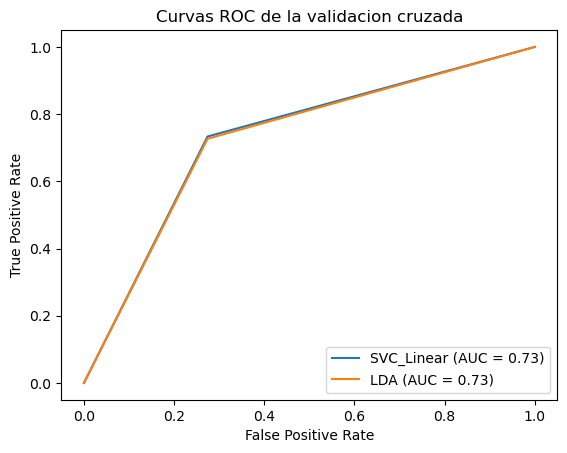

In [280]:
filtered_predicts = [precdicciones for precdicciones in predicts if precdicciones[0] in ['SVC_Linear', 'LDA']]
curva_ROC_cv(filtered_predicts,y)

Basado en lo anterior se reduce a una decisión de dos algoritmos que son: SVC_Linear y LDA de los cuales podemos observar en el gráfico de la izquierda la curva ROC y el área bajo la curva calculada a partir de las predicciones basadas en validación cruzada.
Ambos también dando el mismo AUC.


### Decision mejor modelo

El enfoque para decidir cual fue el mejor modelo, se basa en obtener el modelo que mejore prediga la categoria de "bad".
Esto es porque para el banco aleman es mas riesgoso y caro prestarle a un cliente que no vaya a pagar despues.

Por esta razon y en funcion de los datos y metricas mostrados en las etapas anteriores el mejor modelo para este caso es:  Support Vector Classifier con kernel Linear **SVC Linear** con un AUC de 73%. Una especificidad del 73%. Un acurracy(tasa de aciertos) del 73%. 
La decision entre SVC_Linear y LDA(LinearDiscriminantAnalysis) es por la variabilidad del rendimiento mostrado en los graficos de caja, en donde se observa una mayor robustes o lo que es lo mismo una menor dispercion en el modelo SVC linear.

In [281]:
MetricasGanadoras = df_metricasFinal.reset_index() 
MetricasGanadoras[MetricasGanadoras["index"] == "SVC_Linear"]

index  Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  \
5  SVC_Linear           0.73         0.27           0.73          0.73   

   f1_good  f1_bad  precision_good  precision_bad  
5     0.74    0.72            0.75           0.71

### Recordemos la distribucion de Y
Distribucion con el submuestreo de la clase mayoritaria

In [282]:
y.value_counts()

riesgo_crediticio
good                 300
bad                  270
dtype: int64

### Matriz de confusión

In [384]:
y_pred = mejor_modelo_SVC.predict(X[var_seleccionadas])
#En caso que quiera ver las probabilidades de cada clase. Por ahora tiene el corte default 0.5
y_pred_prob = mejor_modelo_SVC.predict_proba(X[var_seleccionadas])[:,1]

In [385]:
confusion_matrix(y, y_pred)

array([[197,  73],
       [ 76, 224]], dtype=int64)

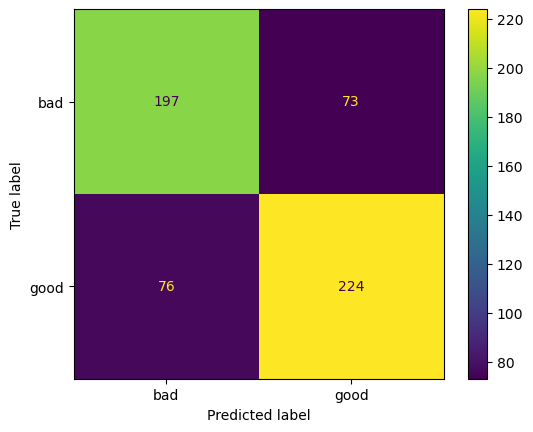

In [386]:
cm = confusion_matrix(y, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['bad', 'good'])
cm_display.plot()
plt.show()

### Métricas

In [286]:
df_metricasFinal = tabla_metricas(y,y_pred,"SVC Linear")
df_metricasFinal

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
SVC Linear           0.74         0.26           0.73          0.75     0.75   

            f1_bad  precision_good  precision_bad  
SVC Linear    0.73            0.75           0.72

### Curva ROC
Se calcula desde el estimador mismo

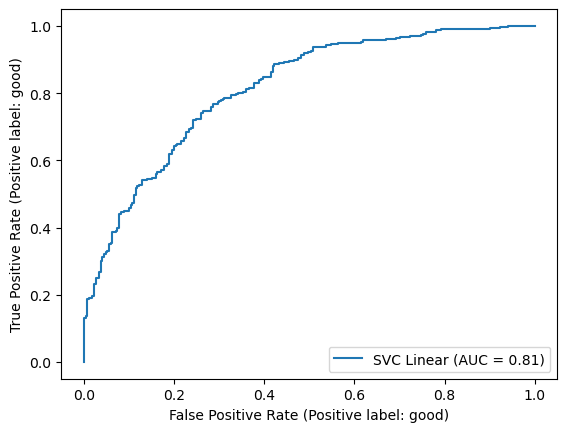

In [287]:
RocCurveDisplay.from_estimator(mejor_modelo_SVC, X[var_seleccionadas], y,name='SVC Linear');

### Nuevos Datos

Los nuevos datos se evaluan mas adelante debido a que hay que aplicarles todo el pipeline lo cual veremos en la etapa siguiente de implementacion y prueba.

# Implementación de mejor modelo

### Librerias

In [288]:
import pickle
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn import set_config
set_config(display="diagram")

### Encapsular preprocesamiento y transformaciones

Las siguientes son las funciones consolidadas que permiten realizar la transformación del conjunto de datos para prepararlos para el modelado.

In [289]:
class TraducirVariables(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        new_X = X.copy()
        new_X.columns = ["estado", "duracion", "historial_crediticio", "proposito", "monto", "ahorros", "duracion_empleo",
                 "tasa_cuota", "estado_personal_sexual", "otros_deudores", "residencia_actual", "propiedad", "edad",
                 "otros_planes_de_cuotas", "vivienda", "numero_creditos", "trabajo", "personas_responsables",
                 "telefono", "trabajador_extranjero"]
        return new_X

In [290]:
class RecodificarVariables(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):              
        #Definir niveles
        lvestado = {1:"no checking account", 2:"less than 0 DM", 3:"0 to 200 DM", 4:"200 DM or more"}

        lvhistorial_crediticio = {0 : "delay in paying off in the past",       
         1 : "critical account/other credits elsewhere",   
         2 : "no credits taken/all credits paid back duly",
         3 : "existing credits paid back duly till now",
         4 : "all credits at this bank paid back duly"}

        lvproposito = {0 : "others", 1 : "car (new)", 2 : "car (used)",3 : "furniture/equipment", 4 : "radio/television", 
                   5 : "domestic appliances", 6 : "repairs", 7 : "education", 8 : "vacation", 9 : "retraining", 10 : "business"}

        lvahorros = {1:"unknown/no savings account", 2 :"less than 100 DM", 3:"100 to 500 DM", 4 :"500 to 1000 DM", 5:"1000 DM or more"}
        lvduracion_empleo = {1 : "unemployed",2 : "less than 1 year", 3 : "1 to 4 yrs", 4 : "4 to 7 yrs", 5 : "7 yrs or more"}
        lvtasa_cuota = {1 : "35 or more", 2 : "25 to 35", 3 : "20 to 25", 4 : "less than 20"}
        lvestado_personal_sexual = {1 : "male : divorced/separated", 2 : "female : non-single or male : single", 3 : "male : married/widowed", 4 : "female : single"}

        lvotros_deudores = {1 : "none", 2 : "co-applicant", 3 : "guarantor"}
        lvresidencia_actual = {1 : "less than 1 year", 2 : "1 to 4 yrs", 3 : "4 to 7 yrs", 4 : "7 yrs or more"}
        lvpropiedad = {1 : "unknown/no property", 2 : "car or other",3 : "building soc. savings agr./life insurance", 4 : "real estate"}
        lvotros_planes_de_cuotas = {1 : "bank",2 : "stores",3 : "none"}
        lvvivienda = {1:"for free", 2:"rent", 3:"own"} 
        lvnumero_creditos = {1 : "1",2 : "2-3", 3 : "4-5",4 : "6 or more"}
        lvtrabajo = {1 : "unemployed/unskilled - non-resident",2 : "unskilled-resident",3 : "skilled employee/official",4 : "manager/self-employed/highly qualified employee"}

        lvpersonas_responsables = {1 : "3 or more", 2 : "0 to 2"}
        lvtelefono = {1 : "no",2 : "yes (under customer name)"}
        lvtrabajador_extranjero = {1 : "yes", 2 : "no"}
        
        #Mapear los niveles
        X["estado"] = X["estado"].map(lvestado)
        X["historial_crediticio"] = X["historial_crediticio"].map(lvhistorial_crediticio)
        X["proposito"] = X["proposito"].map(lvproposito)
        X["ahorros"] = X["ahorros"].map(lvahorros)
        X["duracion_empleo"] = X["duracion_empleo"].map(lvduracion_empleo)
        X["tasa_cuota"] = X["tasa_cuota"].map(lvtasa_cuota)
        X["estado_personal_sexual"] = X["estado_personal_sexual"].map(lvestado_personal_sexual)
        X["otros_deudores"] = X["otros_deudores"].map(lvotros_deudores)
        X["residencia_actual"] = X["residencia_actual"].map(lvresidencia_actual)
        X["propiedad"] = X["propiedad"].map(lvpropiedad)
        X["otros_planes_de_cuotas"] = X["otros_planes_de_cuotas"].map(lvotros_planes_de_cuotas)
        X["vivienda"] = X["vivienda"].map(lvvivienda)
        X["numero_creditos"] = X["numero_creditos"].map(lvnumero_creditos)
        X["trabajo"] = X["trabajo"].map(lvtrabajo)
        X["personas_responsables"] = X["personas_responsables"].map(lvpersonas_responsables)
        X["telefono"] = X["telefono"].map(lvtelefono)
        X["trabajador_extranjero"] = X["trabajador_extranjero"].map(lvtrabajador_extranjero)
        
        return X

In [291]:
class ImputacionVariables(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        #ORDINALES
        X["numero_creditos"] = X["numero_creditos"].replace(["4-5", "6 or more"], "4 or more")
        X["ahorros"] = X["ahorros"].replace(["100 to 500 DM", "500 to 1000 DM"], "100 to 1000 DM")
       
        #NOMINALES
        X["trabajo"] = X["trabajo"].replace(["unskilled-resident", "unemployed/unskilled - non-resident"], "unskilled-resident or unemployed/unskilled non-resident")
        X["proposito"] = X["proposito"].replace(["domestic appliances", "radio/television","repairs"], "domestic appliances or radio/television or repairs")
        X["proposito"] = X["proposito"].replace(["retraining","business", "vacation"], "business or vacation or retraining")
        X["proposito"] = X["proposito"].replace(["car (new)", "car (used)"], "car (new) or car (used)")
        
        return X

In [292]:
class TratarVariablesCatOrdinales(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        estado_OrEncoder = OrdinalEncoder(categories=[("no checking account", "less than 0 DM", "0 to 200 DM", "200 DM or more")])
        ahorros_OrEncoder = OrdinalEncoder(categories=[("unknown/no savings account", "less than 100 DM", "100 to 1000 DM", "1000 DM or more")])
        dur_empleo_OrEncoder = OrdinalEncoder(categories=[("unemployed", "less than 1 year", "1 to 4 yrs", "4 to 7 yrs", "7 yrs or more")])
        tasa_OrEncoder = OrdinalEncoder(categories=[("35 or more", "25 to 35", "20 to 25", "less than 20")])
        residencia_OrEncoder = OrdinalEncoder(categories=[("less than 1 year", "1 to 4 yrs", "4 to 7 yrs", "7 yrs or more")])
        #Se cambia el orden cosiderando que al tener mas creditos es mayor el riesgo de que no pueda pagar.
        num_creditos_OrEncoder = OrdinalEncoder(categories=[("4 or more","2-3","1")])
        #Se cambia el orden cosiderando que mientras menos personas dependan de el es mejor
        per_responsables_OrEncoder = OrdinalEncoder(categories=[("3 or more", "0 to 2")])
        
        col_transformer = ColumnTransformer(
        transformers=[
            ('estado_OrEncoder', estado_OrEncoder, ['estado']),
            ('ahorros_OrEncoder', ahorros_OrEncoder, ['ahorros']),
            ('dur_empleo_OrEncoder', dur_empleo_OrEncoder, ['duracion_empleo']),
            ('tasa_OrEncoder', tasa_OrEncoder, ['tasa_cuota']),
            ('residencia_OrEncoder', residencia_OrEncoder, ['residencia_actual']),
            ('num_creditos_OrEncoder', num_creditos_OrEncoder, ['numero_creditos']),
            ('per_responsables_OrEncoder', per_responsables_OrEncoder, ['personas_responsables']),

            ],remainder='passthrough')
        
        Datatransformed = col_transformer.fit_transform(X)
            
        NombreColumnas = ['estado','ahorros','duracion_empleo', 'tasa_cuota','residencia_actual','numero_creditos','personas_responsables',
                  'duracion', 'historial_crediticio', 'proposito', 'monto',
                  'estado_personal_sexual', 'otros_deudores',  'propiedad', 'edad',
                  'otros_planes_de_cuotas', 'vivienda',  'trabajo',
                  'telefono', 'trabajador_extranjero']
            
        X =pd.DataFrame(Datatransformed,columns = NombreColumnas)
        X['estado'] = X['estado'].astype(int)
        X['ahorros'] = X['ahorros'].astype(int)
        X['duracion_empleo'] = X['duracion_empleo'].astype(int)
        X['tasa_cuota'] = X['tasa_cuota'].astype(int)
        X['residencia_actual'] = X['residencia_actual'].astype(int)
        X['numero_creditos'] = X['numero_creditos'].astype(int)
        X['personas_responsables'] = X['personas_responsables'].astype(int)

        X['duracion'] = X['duracion'].astype(float)
        X['monto'] = X['monto'].astype(float)
        X['edad'] = X['edad'].astype(float)
        
        return X

In [293]:
class EscalarVariables(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        numericas_pt = PowerTransformer(method='box-cox')
        col_num = ['duracion', 'monto', 'edad']
        col_transformer2 = ColumnTransformer(
        transformers=[
            ('Outliers', numericas_pt, col_num)
            ],remainder='passthrough')
        
        Datatransformed = X
        
        if (X.shape[0] != 1):
             Datatransformed = col_transformer2.fit_transform(X)
       
        
        
        NombreColumnas = ['duracion', 'monto', 'edad',
                  'estado','ahorros','duracion_empleo', 'tasa_cuota','residencia_actual','numero_creditos','personas_responsables',
                  'historial_crediticio', 'proposito', 
                  'estado_personal_sexual', 'otros_deudores',  'propiedad', 
                  'otros_planes_de_cuotas', 'vivienda',  'trabajo',
                  'telefono', 'trabajador_extranjero']
        
        X =pd.DataFrame(Datatransformed,columns = NombreColumnas)
        X['estado'] = X['estado'].astype(int)
        X['ahorros'] = X['ahorros'].astype(int)
        X['duracion_empleo'] = X['duracion_empleo'].astype(int)
        X['tasa_cuota'] = X['tasa_cuota'].astype(int)
        X['residencia_actual'] = X['residencia_actual'].astype(int)
        X['numero_creditos'] = X['numero_creditos'].astype(int)
        X['personas_responsables'] = X['personas_responsables'].astype(int)

        X['duracion'] = X['duracion'].astype(float)
        X['monto'] = X['monto'].astype(float)
        X['edad'] = X['edad'].astype(float)
        
        return X

In [294]:
class DummyVariables(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        
        col_cat = X.select_dtypes(include="object").columns
        
        dummy_oh = OneHotEncoder(drop='if_binary', sparse=False)
        dummy_oh = dummy_oh.fit(X[col_cat])
        column_dummynames = dummy_oh.get_feature_names_out(col_cat)
        
        col_transformer3 = ColumnTransformer(
        transformers=[
            ('Dummies', dummy_oh, col_cat)
            ],remainder='passthrough')
        
        Datatransformed = col_transformer3.fit_transform(X)
        
        NombreColumnas = column_dummynames.tolist() + [
                  'duracion', 'monto', 'edad',
                  'estado','ahorros','duracion_empleo', 'tasa_cuota','residencia_actual','numero_creditos',
                  'personas_responsables']
        
        X =pd.DataFrame(Datatransformed,columns = NombreColumnas)
        X[column_dummynames.tolist()] = X[column_dummynames.tolist()].astype(int)      
        X['estado'] = X['estado'].astype(int)
        X['ahorros'] = X['ahorros'].astype(int)
        X['duracion_empleo'] = X['duracion_empleo'].astype(int)
        X['tasa_cuota'] = X['tasa_cuota'].astype(int)
        X['residencia_actual'] = X['residencia_actual'].astype(int)
        X['numero_creditos'] = X['numero_creditos'].astype(int)
        X['personas_responsables'] = X['personas_responsables'].astype(int)

        X['duracion'] = X['duracion'].astype(float)
        X['monto'] = X['monto'].astype(float)
        X['edad'] = X['edad'].astype(float)
        
        
        #Cambiar los nombres de la dummys
        nuevos_nombres = {
            'historial_crediticio_all credits at this bank paid back duly': 'historial_cred_all',
            'historial_crediticio_critical account/other credits elsewhere': 'historial_cred_critical',
            'historial_crediticio_delay in paying off in the past': 'historial_cred_delay',
            'historial_crediticio_existing credits paid back duly till now': 'historial_cred_existing',
            'historial_crediticio_no credits taken/all credits paid back duly': 'historial_cred_no_credits',
            'proposito_business or vacation or retraining': 'proposito_business_vacation',
            'proposito_car (new) or car (used)': 'proposito_car_new_used',
            'proposito_domestic appliances or radio/television or repairs': 'proposito_domestic_app_repairs',
            'proposito_furniture/equipment': 'proposito_furn_equipment',
            'proposito_others': 'proposito_others',
            'estado_personal_sexual_female : non-single or male : single': 'estado_per_sex_non_single_male',
            'estado_personal_sexual_female : single': 'estado_per_sex_single',
            'estado_personal_sexual_male : divorced/separated': 'estado_per_sex_divorced_separated',
            'estado_personal_sexual_male : married/widowed': 'estado_per_sex_married_widowed',
            'otros_deudores_co-applicant': 'otros_deud_co_applicant',
            'otros_deudores_guarantor': 'otros_deud_guarantor',
            'otros_deudores_none': 'otros_deud_none',
            'propiedad_building soc. savings agr./life insurance': 'propiedad_building',
            'propiedad_car or other': 'propiedad_car_other',
            'propiedad_real estate': 'propiedad_real_estate',
            'propiedad_unknown/no property': 'propiedad_unknown_no_property',
            'otros_planes_de_cuotas_bank': 'otros_planes_bank',
            'otros_planes_de_cuotas_none': 'otros_planes_none',
            'otros_planes_de_cuotas_stores': 'otros_planes_stores',
            'vivienda_for free': 'vivienda_free',
            'vivienda_own': 'vivienda_own',
            'vivienda_rent': 'vivienda_rent',
            'trabajo_manager/self-employed/highly qualified employee': 'trabajo_manager',
            'trabajo_skilled employee/official': 'trabajo_skilled_employee',
            'trabajo_unskilled-resident or unemployed/unskilled non-resident': 'trabajo_unski_resident_unemploy_non_resident',
            'telefono_yes (under customer name)': 'telefono_yes',
            'trabajador_extranjero_yes': 'trabajador_extranjero_yes' 


        }

        # Utilizar el método rename para cambiar los nombres de las columnas
        X.rename(columns=nuevos_nombres, inplace=True)        
        
        
        return X  

In [295]:
class SeleccionVariables(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        #Cada vez que se reentrenen el modelo hay que actualizar estas variables seleccionadas en caso que cambien.
        mejoresVariables= ['historial_cred_all',
                             'historial_cred_critical',
                             'historial_cred_delay',
                             'proposito_business_vacation',
                             'proposito_car_new_used',
                             'proposito_domestic_app_repairs',
                             'proposito_furn_equipment',
                             'proposito_others',
                             'estado_per_sex_married_widowed',
                             'otros_deud_co_applicant',
                             'otros_deud_guarantor',
                             'propiedad_real_estate',
                             'propiedad_unknown_no_property',
                             'otros_planes_none',
                             'telefono_yes',
                             'trabajador_extranjero_yes',
                             'duracion',
                             'edad',
                             'estado',
                             'ahorros',
                             'personas_responsables']
        
        #En caso de que alguna columna no existan se agregan con 0
        for columna in mejoresVariables:
            if columna not in X.columns:
                X[columna] = 0
                
        X = X[mejoresVariables]
        
        return X

### Crear el Pipeline

In [296]:
traducirVar = TraducirVariables()
recodificarVar = RecodificarVariables()
imputarVar = ImputacionVariables()
tratrCatOrdinales = TratarVariablesCatOrdinales()
#Solo a las numericas
escalarVar = EscalarVariables()
#Solo a las Categoricas
dummyVar = DummyVariables()
mejoresVar = SeleccionVariables()


In [297]:
pipe = Pipeline(steps=[
    ('TraducirVariables', traducirVar),   
    ('RecodificarVariables', recodificarVar),    
    ('ImputacionVariables', imputarVar),
    ('TratarVariablesCatOrdinales', tratrCatOrdinales),
    ('EscalarVariables', escalarVar),
    ('DummyVariables', dummyVar),
    ('SeleccionVariables', mejoresVar)    
    
])


### Visulizar pipeline

In [298]:
pipe

Pipeline(steps=[('TraducirVariables', TraducirVariables()),
                ('RecodificarVariables', RecodificarVariables()),
                ('ImputacionVariables', ImputacionVariables()),
                ('TratarVariablesCatOrdinales', TratarVariablesCatOrdinales()),
                ('EscalarVariables', EscalarVariables()),
                ('DummyVariables', DummyVariables()),
                ('SeleccionVariables', SeleccionVariables())])

### Probar pipeline de preprocesamiento y transformación
Se procede a leer los datos originales y crudos(sin ningun procesamiento previo)

In [299]:
DatosOriginalesCrudos = pd.read_csv("german_credit_data.csv", sep=",", header=0)
DatosCrudos, DatosValidacionCrudos = train_test_split(DatosOriginalesCrudos, test_size=0.1, random_state=42, stratify=DatosOriginalesCrudos[["kredit"]])
X_Crudos = DatosCrudos.reset_index(drop=True).drop(columns="kredit")
y_Crudos = DatosCrudos[["kredit"]].replace({0: 'bad', 1: 'good'})
X_Validacion = DatosValidacionCrudos.reset_index(drop=True).drop(columns="kredit")
y_validacion = DatosValidacionCrudos[["kredit"]].replace({0: 'bad', 1: 'good'})


In [300]:
ConjuntoPreporcesado = pipe.fit_transform(X_Crudos)
ConjuntoPreporcesado

historial_cred_all  historial_cred_critical  historial_cred_delay  \
0                     0                        0                     0   
1                     1                        0                     0   
2                     0                        0                     0   
3                     1                        0                     0   
4                     0                        0                     0   
..                  ...                      ...                   ...   
895                   0                        0                     0   
896                   0                        0                     0   
897                   0                        0                     0   
898                   1                        0                     0   
899                   0                        0                     0   

     proposito_business_vacation  proposito_car_new_used  \
0                              0                       0   
1                              0                       0   
2                              0                       1   
3                              0                       0   
4                              0                       0   
..                           ...                     ...   
895                            0                       1   
896                            0                       1   
897                            0                       1   
898                            0                       0   
899                            0                       0   

     proposito_domestic_app_repairs  proposito_furn_equipment  \
0                                 0                         1   
1                                 0                         0   
2                                 0                         0   
3                                 0                         1   
4                                 0                         0   
..                              ...                       ...   
895                               0                         0   
896                               0                         0   
897                               0                         0   
898                               0                         1   
899                               0                         0   

     proposito_others  estado_per_sex_married_widowed  \
0                   0                               0   
1                   1                               0   
2                   0                               1   
3                   0                               1   
4                   1                               0   
..                ...                             ...   
895                 0                               0   
896                 0                               0   
897                 0                               0   
898                 0                               1   
899                 1                               1   

     otros_deud_co_applicant  ...  propiedad_real_estate  \
0                          0  ...                      0   
1                          0  ...                      0   
2                          0  ...                      0   
3                          0  ...                      1   
4                          0  ...                      0   
..                       ...  ...                    ...   
895                        0  ...                      0   
896                        0  ...                      0   
897                        0  ...                      0   
898                        0  ...                      0   
899                        0  ...                      0   

     propiedad_unknown_no_property  otros_planes_none  telefono_yes  \
0                                1                  1             1   
1                                0                  1             

In [301]:
ConjuntoPreporcesado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   historial_cred_all              900 non-null    int32  
 1   historial_cred_critical         900 non-null    int32  
 2   historial_cred_delay            900 non-null    int32  
 3   proposito_business_vacation     900 non-null    int32  
 4   proposito_car_new_used          900 non-null    int32  
 5   proposito_domestic_app_repairs  900 non-null    int32  
 6   proposito_furn_equipment        900 non-null    int32  
 7   proposito_others                900 non-null    int32  
 8   estado_per_sex_married_widowed  900 non-null    int32  
 9   otros_deud_co_applicant         900 non-null    int32  
 10  otros_deud_guarantor            900 non-null    int32  
 11  propiedad_real_estate           900 non-null    int32  
 12  propiedad_unknown_no_property   900 

Preprocesado y transformaciones se ve estupendo.

### Agregar al pipeline el mejor modelo

In [302]:
pipe = Pipeline(steps=[
    ('TraducirVariables', traducirVar),   
    ('RecodificarVariables', recodificarVar),    
    ('ImputacionVariables', imputarVar),
    ('TratarVariablesCatOrdinales', tratrCatOrdinales),
    ('EscalarVariables', escalarVar),
    ('DummyVariables', dummyVar),
    ('SeleccionVariables', mejoresVar),
    #El modelo ganador pre entrenado
    ('Modelo', mejor_modelo_SVC)     
    
])


In [303]:
pipe

Pipeline(steps=[('TraducirVariables', TraducirVariables()),
                ('RecodificarVariables', RecodificarVariables()),
                ('ImputacionVariables', ImputacionVariables()),
                ('TratarVariablesCatOrdinales', TratarVariablesCatOrdinales()),
                ('EscalarVariables', EscalarVariables()),
                ('DummyVariables', DummyVariables()),
                ('SeleccionVariables', SeleccionVariables()),
                ('Modelo',
                 SVC(C=0.3, kernel='linear', probability=True,
                     random_state=7))])

### Probar Pipeline completo con datos crudos
**Importante:** Considerar que los datos originales tiene un desbalanceo de clases y para probar este pipeline no se realiza un submuestreo porque la prueba son con datos originales

In [304]:
y_Prediccion = pipe.predict(X_Crudos)
#En caso que quiera ver las probabilidades de cada clase. Por ahora tiene el corte default 0.5
y_Prediccion_prob = mejor_modelo_SVC.predict_proba(X[var_seleccionadas])[:,1]

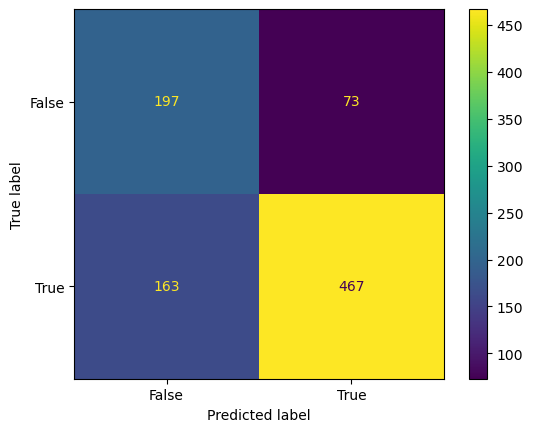

In [305]:
cm = confusion_matrix(y_Crudos, y_Prediccion)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [306]:
df_metricas= tabla_metricas(y_Crudos,y_Prediccion,"SVC Linear")
df_metricas

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
SVC Linear           0.74         0.26           0.73          0.74      0.8   

            f1_bad  precision_good  precision_bad  
SVC Linear    0.63            0.86           0.55

In [307]:
RocCurveDisplay.from_estimator(pipe, X_Crudos, y_Crudos,name='SVC Linear')

Se puede observar que es un modelo muy estable a pesar del desbalance de las clases de los datos originales para esta prueba.

### Empaquetar Todo

In [308]:
with open('ClasificadorRiesgoCreditoAleman.pkl', 'wb') as archivo:
    pickle.dump(pipe, archivo)

### Validacion productiva con nuevos datos crudos

Recordemos que separamos del conjunto original un 10% de forma estratificada.
Este 10% son nuevos datos nuevos. para validar en esta etapa.
Aqui se observa una limitacion. Es que para que el modelo funcione no pueden faltar categorias en las variables categoricas, debe haber al menos un valor de cada uno.

In [309]:
with open('ClasificadorRiesgoCreditoAleman.pkl', 'rb') as archivo:
    Clasificador = pickle.load(archivo)

In [310]:
y_validacion.value_counts()

kredit
good      70
bad       30
dtype: int64

In [387]:
y_Prediccion = Clasificador.predict(X_Validacion)
#Para ver las probabilidades de cada clase. Por ahora tiene el corte default 0.5
y_Prediccion_prob = Clasificador.predict_proba(X_Validacion)[:,1]

### Predicicones y probabilidades

In [313]:
df_probabilidades = {'Clase':y_Prediccion,'Probabilidad':y_Prediccion_prob}
df_probabilidades = pd.DataFrame(df_probabilidades)
df_probabilidades

Clase  Probabilidad
0   good      0.838454
1   good      0.759750
2   good      0.676956
3   good      0.892890
4    bad      0.401974
..   ...           ...
95  good      0.824561
96  good      0.522840
97   bad      0.331279
98   bad      0.413443
99   bad      0.335975

[100 rows x 2 columns]

Es muy importante que para intepretar esta probabilidad se hace basado en la probablidad de que la clase sea good.
Lo que significa que con punto de corte de 50, menos de eso indica que es pertenece a la categoria bad. Mientras mas se aleje del 0.50 y se acerque a 0 la probablidad de bad es mayor.

In [325]:
df_probabilidades.describe()

Probabilidad
count    100.000000
mean       0.564879
std        0.237468
min        0.123541
25%        0.347701
50%        0.587819
75%        0.787258
max        0.963489

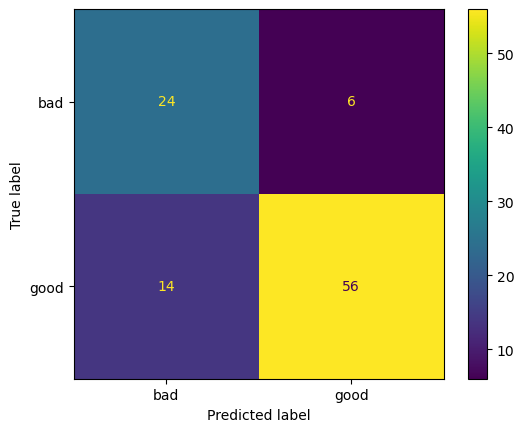

In [388]:
cm = confusion_matrix(y_validacion, y_Prediccion)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['bad', 'good'])
cm_display.plot()
plt.show()

In [315]:
df_metricas= tabla_metricas(y_validacion,y_Prediccion,"SVC Linear")
df_metricas

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
SVC Linear            0.8          0.2            0.8           0.8     0.85   

            f1_bad  precision_good  precision_bad  
SVC Linear    0.71             0.9           0.63

In [316]:
RocCurveDisplay.from_estimator(Clasificador, X_Validacion, y_validacion,name='SVC Linear')

### ¿como hubiera predecido estos datos nuevos si hubieramos elegido otro modelo?

Por ejemplo vamos probar en GaussianNB, que inicialmente estaba en el top 5 pero fue el primero en descartarse.

In [317]:
pipe = Pipeline(steps=[
    ('TraducirVariables', traducirVar),   
    ('RecodificarVariables', recodificarVar),    
    ('ImputacionVariables', imputarVar),
    ('TratarVariablesCatOrdinales', tratrCatOrdinales),
    ('EscalarVariables', escalarVar),
    ('DummyVariables', dummyVar),
    ('SeleccionVariables', mejoresVar),
    #OTRO MODELO que no es el ganador<<<<<<<<<
    ('Modelo',  mejor_modelo_GaussianNB)     
    
])

In [318]:
y_Prediccion = pipe.predict(X_Validacion)

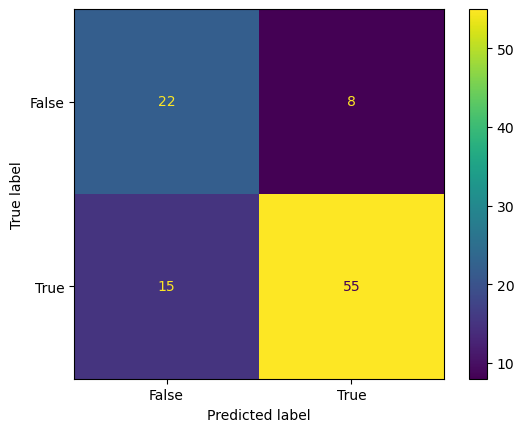

In [319]:
cm = confusion_matrix(y_validacion, y_Prediccion)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

In [320]:
df_metricas= tabla_metricas(y_validacion,y_Prediccion,"GaussianNB")
df_metricas

Tasa_aciertos  Tasa_fallos  especificidad  sensibilidad  f1_good  \
GaussianNB           0.77         0.23           0.73          0.79     0.83   

            f1_bad  precision_good  precision_bad  
GaussianNB    0.66            0.87           0.59

In [321]:
RocCurveDisplay.from_estimator(pipe, X_Validacion, y_validacion,name='GaussianNB')

Se puede observar y comparar que efectivamente el mejor modelo seleccionado predice mejor.

El top cinco de los mejores modelos tienen metricas muy similares.
Tienen diferencias de un punto porcentual entre ellos en diferentes metricas.

Me parece que los cinco podrian funcionar bien, pero solo uno de ellos es mejor.
El mejor modelo se eligio basado en esas metricas, dandole prioridad a la especificidad es decir aumentar las predicciones del bad en primer lugar, en segundo lugar la metrica f1_bad y en ultimo lugar para desempate la precision_bad.

# Conclusiones generales

Para las empresas que toman decisiones basadas en datos, es decir las que no se guían por la intuición o la experiencia de una persona, el valor estratégico de los datos juega un papel fundamental. Cuando hablamos de datos hay muchos elementos alrededor como la recopilación, el almacenamiento, la capacidad de utilización efectiva de datos para impulsar las operaciones, para analítica que genere información para la toma de decisiones y la presentación de los datos; todo esto sin dejar de lado el gobierno de los datos que abarca entre muchos temas la calidad, seguridad y la manera en que se comparten los datos y la información con toda la organización.

El machine learning no debe verse como un campo o proceso aislado a estos elementos, si no que debe formar parte de una arquitectura integral que permita a las empresas aprovechar el máximo potencial de sus datos, aumentar la eficiencia operativa, decisiones informadas, mejorar los productos actuales, ofrecer productos y servicios personalizados, lo que finalmente se traduce en clientes satisfechos y leales y una posición más sólida en el mercado con la capacidad de prosperar en un entorno empresarial competitivo y cada vez más orientado por los datos.

En este trabajo se logró generar un modelo estable y robusto en cuanto a las predicciones, se logró implementar en un ambiente productivo para que pueda ser aprovechado y utilizado de una manera sencilla e intuitiva por cualquier colaborador de una empresa, en este caso el banco. Se realizó una analítica de los datos y evaluaciones comparativas de varios algoritmos de manera responsable hasta la elección del mejor modelo. Pero, aun así, hay varias mejoras futuras que se pueden realizar para mejorar aún más los resultados. Entre las mejoras que realizaría serían más pruebas con otras variables y grupos de variables, esto es incluir otras técnicas de selección automática de características como chi2, pero también haría más pruebas con selección manual. También queda la experiencia de algunos algoritmos funcionan mejor que otros para problemas de clasificación binaria por lo que se pueden descartar los peores e incluir otros algoritmos nuevos que se sería muy interesante evaluar, ajustar hiperparametros adicionales que pudieron no tomarse en cuenta y finalmente pero en un ambiente real seria mejorar la calidad de la recolección de los datos ya que en este conjunto habían variables mezcladas que si se tratan de forma individual pueden mejorar mucho un modelo.

Los siguientes pasos aplicarían para un ambiente real empresarial, donde ya se tomen en cuenta varias mejoras, empezando por mejoras en la recolección de los datos del solicitante de crédito en los sistemas donde se ingresan, el almacenamiento de la información en un lago de datos para poder ir generando  un volumen mayor de datos que permita habilitar otros tipos de analítica y aprovechar otras tecnologías de BigData como spark y computación en la nube para el procesamiento distribuido de grandes volúmenes de datos. También la utilización de herramientas de visualización como tableau o power BI para habilitar el autoconsumo de la información para toma decisiones y el storytelling.

Finalmente, sobre todo, este trabajo así como en el master en general ha sido una experiencia enriquecedora y desafiante que me ha permitido aprender y mejorara mis habilidades de machine learning para apoyar donde quiera que vaya para un futuro mejor con base en datos.  


**FIN**
Mayron Rodríguez Sibaja
113250371